In [ ]:
# # Ï∞®Ìä∏Ïóê ÌïúÍ∏ÄÏù¥ ÎÇòÏò§Í≤åÎÅî ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ïπò
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math, copy, time
import matplotlib.pyplot as plt

# plt.style.use('dark_background')

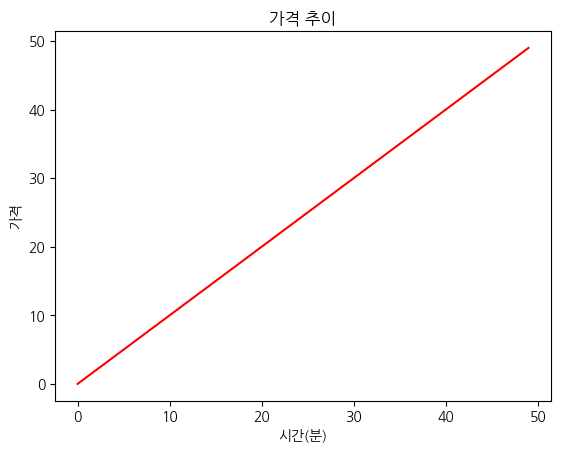

In [ ]:
from matplotlib import font_manager, rc

# Í∑∏ÎûòÌîÑÏóê ÌïúÍ∏Ä ÎÇòÏò§ÎäîÏßÄ ÌôïÏù∏
font_fname = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'     # A font of your choice
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

plt.plot(range(50), range(50), 'r')
plt.title('Í∞ÄÍ≤© Ï∂îÏù¥')
plt.ylabel('Í∞ÄÍ≤©')
plt.xlabel('ÏãúÍ∞Ñ(Î∂Ñ)')
plt.show()

# ÏßÑÏßúÎ°ú(?) Ï£ºÏÑù Îã¨Î¶∞ Ìä∏ÎûúÏä§Ìè¨Î®∏ Really annotated transformers

- https://metamath1.github.io/2021/11/11/transformer.html
- https://colab.research.google.com/github/metamath1/ml-simple-works/blob/master/transformer/annotated_transformer.ipynb

Î≥∏ Í∏ÄÏùò ÏõêÎ¨∏ÏùÄ "The Annotated Transfomer"[[1](https://nlp.seas.harvard.edu/2018/04/03/attention.html)]Î°ú Ïù∏ÌÑ∞ÎÑ∑ÏóêÏÑú Ï∞∏Í≥†Ìï† Ïàò ÏûàÎäî Ìä∏ÎûúÏä§Ìè¨Î®∏Ïóê ÎåÄÌïú Í∞ÄÏû• Ï¢ãÏùÄ Î¨∏ÏÑúÏ§ë ÌïòÎÇòÏûÖÎãàÎã§. Îã§Î•∏ ÌïòÎÇòÎäî "The Illustrated Transformer"[[2](https://jalammar.github.io/illustrated-transformer/)], [Î≤àÏó≠Î¨∏[3](https://nlpinkorean.github.io/illustrated-transformer/)] Ïù∏Îç∞ Ïù¥ Î¨∏ÏÑúÎßå ÏùΩÏñ¥Î¥êÎèÑ Ìä∏ÎûúÏä§Ìè¨Î®∏Ïóê ÎåÄÌï¥ÏÑú ÏùºÎ∂ÄÎ∂Ñ Ïù¥Ìï¥Ìï† Ïàò ÏûàÏñ¥ Íº≠ ÏùΩÏñ¥Î≥¥Î©¥ Ï¢ãÏùÄ Í∏ÄÏûÖÎãàÎã§. Ïù¥ Í∏ÄÏùÄ [1]Ïóê ÎåÄÌï¥ÏÑú Îçî ÌíçÎ∂ÄÌïòÍ≤å Ï£ºÏÑùÏùÑ Îã¨Í≥† [1]ÏóêÏÑú Ïñ∏Í∏âÎêòÏßÄ ÏïäÏùÄ Î∂ÄÎ∂ÑÏùÑ Ï°∞Í∏à Îçî ÏÉÅÏÑ∏Ìûà ÌíÄÏñ¥ Ï†ÅÏùÄ Í∏ÄÏûÖÎãàÎã§.

[[1](https://nlp.seas.harvard.edu/2018/04/03/attention.html)]ÏùÄ ÎÖºÎ¨∏ÏùÑ Í∑∏ÎåÄÎ°ú ÏΩîÎìúÎ°ú ÏòÆÍ∏∞Í≥† ÎÖºÎ¨∏ ÌÖçÏä§Ìä∏ÏôÄ ÏΩîÎìúÎ•º Ìï®Íªò Ï†úÏãúÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Í≥µÏã†Î†• Î©¥ÏóêÏÑú ÏµúÍ≥†ÏßÄÎßå ÏïûÏÑú Î∞ùÌòîÎìØÏù¥ ÏÑ§Î™ÖÏù¥ Î∂ÄÏ°±ÌïòÍ≥† Ìï®Íªò ÏßÑÌñâÌïòÎäî ÏΩîÎìúÍ∞Ä top-down Î∞©ÏãùÏúºÎ°ú Í∏∞Ïà†ÎêòÏñ¥ ÏûàÏñ¥ÏÑú Í∏ÄÏùÑ ÏùΩÍ∏∞Í∞Ä ÌûòÎì§Îã§Îäî Îã®Ï†êÏù¥ ÏûàÏäµÎãàÎã§. Ï†ÄÏûêÎì§Ïù¥ Ïù¥Î†áÍ≤å Í∏ÄÏùÑ Ïì¥ Ïù¥Ïú†Îäî Ìä∏ÎûúÏä§Ìè¨Î®∏Î•º Î∞úÌëúÌïú ÎÖºÎ¨∏ "Attention is all you need"[[4](https://arxiv.org/abs/1706.03762)]ÏóêÏÑú Í∏∞Ïà†ÌïòÎäî ÏàúÏÑúÎ•º Í∑∏ÎåÄÎ°ú ÏßÄÏº∞Í∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§. ÏΩîÎìúÎ•º Ïù¥Ìï¥ÏãúÌÇ¨ ÌïÑÏöîÏóÜÏù¥ Ï†ÑÏ≤¥Ï†ÅÏù∏ Îß•ÎùΩÏùÑ ÏÑ§Î™ÖÌïòÎäîÎç∞Îäî Ïù¥Îü∞ top-downÎ∞©ÏãùÏù¥ Îçî Ïú†Î¶¨ÌïòÍ≤†ÏßÄÎßå Í∏ÄÍ≥º ÏΩîÎìúÎ•º Ìï®Íªò Î≥¥Îäî Í≤ΩÏö∞Îäî Ï¢Ä Îã§Î•º Ïàò ÏûàÏäµÎãàÎã§. ÏôúÎÉêÌïòÎ©¥ top-down Î∞©ÏãùÏúºÎ°ú Ï†úÏãúÎêú ÏΩîÎìú Ï°∞Í∞ÅÏóêÎäî ÌïÑÏó∞Ï†ÅÏúºÎ°ú ÏïÑÎûòÏ™ΩÏóêÏÑú ÏÑ§Î™ÖÎê† ÏòàÏ†ïÏù∏ ÏùòÎØ∏Î•º Ïûò Ïïå Ïàò ÏóÜÎäî Ïù∏ÏûêarguementÎì§Ïù¥ ÎÅäÏûÑÏóÜÏù¥ Îì±Ïû•ÌïòÍ≤å ÎêòÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§.

Ïù¥Îü∞ Ïù¥Ïú†ÎïåÎ¨∏Ïóê ÏΩîÎìúÏôÄ Ìï®Íªò Í∏∞Ïà†Îêú Í∏ÄÏù¥ÎùºÎ©¥ bottom-up Î∞©ÏãùÏúºÎ°ú ÏûëÏùÄ Î∂ÄÎ∂ÑÎ∂ÄÌÑ∞ Ïù¥Ìï¥ÌïòÎ©¥ÏÑú Ï†êÏßÑÏ†ÅÏúºÎ°ú ÌÅ∞ Î∂ÄÎ∂ÑÏúºÎ°ú ÎÇòÍ∞ÄÎäîÍ≤ÉÏù¥ ÎßûÎã§Í≥† ÏÉùÍ∞ÅÌï©ÎãàÎã§. Ïù¥ Í∏ÄÏùÄ [[1](https://nlp.seas.harvard.edu/2018/04/03/attention.html)]Ïùò ÏΩîÎìúÎ•º bottom-up Î∞©ÏãùÏúºÎ°ú Ïû¨Íµ¨ÏÑ±ÌïòÏó¨ ÏùΩÎäî Ïù¥Í∞Ä Î¨∏ÏÑúÎ•º Ï≤òÏùåÎ∂ÄÌÑ∞ ÏàúÏÑúÎåÄÎ°ú ÏùΩÍ∏∞ÎßåÌï¥ÎèÑ Ìä∏ÎûúÏä§Ìè¨Î®∏Ïóê ÎåÄÌï¥ Ìé∏ÏïàÌïòÍ≤å Ïù¥Ìï¥Ìï† Ïàò ÏûàÎèÑÎ°ù ÌïòÎäî Í≤ÉÏùÑ Î™©Ï†ÅÏúºÎ°ú ÌïòÍ≥† ÏûàÏäµÎãàÎã§.

## Ìä∏ÎûúÏä§Ìè¨Î®∏Î•º Í≥µÎ∂ÄÌïòÎäî Ïù¥Ïú†

Ìä∏ÎûúÏä§Ìè¨Î®∏Îäî ÏµúÍ∑º Í∞ÄÏû• ÏÑ±Í≥µÏ†ÅÏù∏ Î™®Îç∏ÏûÑÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥† CNN, RNNÏóê ÎåÄÌïú ÏÇ¨Ï†Ñ ÏßÄÏãùÏù¥ Ï†ÑÌòÄ ÌïÑÏöîÏóÜÏù¥ Ïù¥Ìï¥Ìï† Ïàò ÏûàÎã§Îäî Ï†êÏóêÏÑú ÏûÖÎ¨∏ÏûêÎ∂ÑÎì§Ïù¥ Íº≠ Í≥µÎ∂ÄÌïòÎ©¥ Ï¢ãÏùÑ Î™®Îç∏Ïù¥ÎùºÍ≥† Ìï† Ïàò ÏûàÏäµÎãàÎã§. Ìä∏ÎûúÏä§Ìè¨Î®∏Î•º Ïù¥Ìï¥ÌïòÍ∏∞ ÏúÑÌïú ÏÇ¨Ï†Ñ ÏßÄÏãùÏùÄ Îã§Ïùå Ï†ïÎèÑÎ°ú Ï†ïÎ¶¨Ìï† Ïàò ÏûàÏäµÎãàÎã§. 

- Ïã†Í≤ΩÎßùÏóêÏÑú ÏôÑÏ†Ñ Ïó∞Í≤∞Ï∏µ 
- ÏÜåÌîÑÌä∏Îß•Ïä§ Ìï®Ïàò
- $\sin$, $\cos$ Ìï®Ïàò Í∏∞Ï¥à
- Îç∞Ïù¥ÌÑ∞Î•º Ïù∏ÏΩîÎî©Ìï¥ÏÑú Îã§Ïãú ÎîîÏΩîÎî©ÌïòÎäî Í∞úÎÖê
- Î∞∞Ïπò Ï†ïÍ∑úÌôîÏôÄ Î†àÏù¥Ïñ¥ Ï†ïÍ∑úÌôîÏùò Ï∞®Ïù¥
- ÏûÑÎ≤†Îî© Í∞úÎÖê
- Ïñ¥ÌÖêÏÖò Í∞úÎÖê

Ïïû ÎÑ§ Í∞ú Ìï≠Î™©ÏùÄ Ïù∏Í≥µÏßÄÎä•Ïóê Îßâ ÏûÖÎ¨∏Ìïú ÌïôÏäµÏûêÎùºÎèÑ Ïñ¥ÎäêÏ†ïÎèÑ ÏïåÍ≥† ÏûàÎäî ÎÇ¥Ïö©Ïù¥ÎØÄÎ°ú Ïã§Ï†úÎ°ú ÏûÖÎ¨∏ÏûêÍ∞Ä ÎäêÎÅºÎäî Ï∂îÍ∞Ä ÌïôÏäµ Î∂ÄÎã¥ÏùÄ Ï†ïÍ∑úÌôîÏôÄ ÏûÑÎ≤†Îî© Í∞úÎÖê Í∑∏Î¶¨Í≥† Í∞ÄÏû• ÌïµÏã¨Ïù∏ Ïñ¥ÌÖêÏÖòÏù¥ÎùºÍ≥† Ìï† Ïàò ÏûàÏäµÎãàÎã§. ÏûÑÎ≤†Îî©Ïóê ÎåÄÌï¥ÏÑúÎäî ÏûÖÎ†•ÏùÑ  ÌäπÏ†ï Í∏∏Ïù¥Î•º Í∞ÄÏßÄÎäî Î≤°ÌÑ∞Î°ú Î∞îÍæºÎã§Îäî Ï†ïÎèÑÎßå ÏïåÏïÑÎèÑ Ï†ÑÏ≤¥ ÎÇ¥Ïö©ÏùÑ Ïù¥Ìï¥ÌïòÎäîÎç∞ ÏßÄÏû•Ïù¥ ÏóÜÏäµÎãàÎã§. Ïñ¥ÌÖêÏÖòÏóê ÎåÄÌï¥ÏÑúÎäî Ïù¥Ï†Ñ Î™®Îç∏Ïù∏ seq2seqÏôÄ Í∑∏Ïóê ÎåÄÌïú Ïñ¥ÌÖêÏÖò Îß§Ïª§ÎãàÏ¶òÏùÑ ÏïåÍ≥† ÏûàÎã§Î©¥ ÎèÑÏõÄÏù¥ ÎêòÏßÄÎßå Î™∞ÎùºÎèÑ ÏÉÅÍ¥ÄÏóÜÏäµÎãàÎã§. 

Ïù¥Î†áÍ≤å Ìä∏ÎûúÏä§Ìè¨Î®∏Îäî ÏôÑÏ†Ñ Ïó∞Í≤∞Ï∏µÏóê ÎåÄÌïú Í∏∞Î≥∏Ï†ÅÏù∏ ÏßÄÏãùÎßå Í∞ÄÏßÄÍ≥† Î∞îÎ°ú ÌïôÏäµÌï† Ïàò ÏûàÎã§Îäî Ïû•Ï†êÏóê ÎçîÎ∂àÏñ¥ ÏµúÏã† Î™®Îç∏Îì§Ïùò Í∑ºÍ∞ÑÏùÑ Ïù¥Î£®Îäî Í∏∞Î≥∏ Î™®Îç∏ÏùÑ Í≥µÎ∂ÄÌï† Ïàò ÏûàÎã§Îäî Ï∂îÍ∞Ä Ïû•Ï†êÎèÑ Í∞ÄÏßÄÍ≥† ÏûàÏäµÎãàÎã§. 

## Embedding

ÏûÑÎ≤†Îî© Ï∏µÏùÄ Îã®Ïñ¥Î•º ÏûÖÎ†•Î∞õÏïÑ Ï†ÅÏ†àÌïú Ïà´Ïûê Î≤°ÌÑ∞Î°ú Î≥ÄÌôòÌïòÎäî Ï∏µÏúºÎ°ú Î≥ÄÌôòÎêòÏñ¥ Ï∂úÎ†•ÎêòÎäî Î≤°ÌÑ∞Ïùò Í∏∏Ïù¥Î•º ÏΩîÎìúÏóêÏÑú `d_model`Î°ú ÌëúÏãúÌï©ÎãàÎã§.

ÏûÑÎ≤†Îî©Ï∏µÏù¥ ÌïòÎäî ÏùºÏùÄ ÏõêÌï´Ïù∏ÏΩîÎî©Îêú ÏûÖÎ†•Î≤°ÌÑ∞Î•º Ï†ÅÏ†àÌïú Î∞ÄÏßëÎ≤°ÌÑ∞Î°ú Î∞îÍøîÏ£ºÎäî Í≤ÉÏúºÎ°ú Îã§ÏùåÏ≤òÎüº ÏûëÎèôÌï©ÎãàÎã§.

$$
\mathbf{x}_{\text{emb}}=\mathbf{x}W_{\text{emb}}
$$

Ïó¨Í∏∞ÏÑú ÏûÑÎ≤†Îî© Ï∏µÏù¥ Í∞ÄÏßÄÎäî Í∞ÄÏ§ëÏπò ÌñâÎ†¨ $W_{\text{emb}}$Ïùò ÌÅ¨Í∏∞Îäî $(\text{vocab}, d_{\text{model}})$Ïù¥ ÎêòÍ≥† ÏûÖÎ†• Î≤°ÌÑ∞ $\mathbf{x}$Îäî Í∏∏Ïù¥Í∞Ä $(1, \text{vocab})$Ïù∏ ÏõêÌï´Ïù∏ÏΩîÎî©Îêú Î≤°ÌÑ∞ÏûÖÎãàÎã§. Îî∞ÎùºÏÑú ÏûÑÎ≤†Îî© Ï∏µÏùò Í∞ÄÏ§ëÏπò ÌñâÎ†¨ÏùÄ ÌäπÏ†ï Îã®Ïñ¥Ïóê Ìï¥ÎãπÌïòÎäî $d_{\text{model}}$Ï∞®ÏõêÏùò Î≤°ÌÑ∞Î•º ÌñâÏúºÎ°ú Í∞ÄÏßÄÍ≥† ÏûàÎäî Î£©ÏóÖ ÌÖåÏù¥Î∏îÏù¥ÎùºÍ≥† Ìï† Ïàò ÏûàÏäµÎãàÎã§.

In [ ]:
class Embeddings(nn.Module):
    def __init__(self, d_model, vocab):
        super(Embeddings, self).__init__()
        self.lut = nn.Embedding(vocab, d_model)
        self.d_model = d_model

    def forward(self, x):
        # ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Ïóê sqrt(d_model)ÏùÑ Í≥±Ìï¥ÏÑú ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Ïùò ÏöîÏÜåÎì§ Í∞íÏùÑ 
        # Ï¶ùÍ∞Ä ÏãúÌÇ¥.
        # d_modelÏùÄ 512Ï†ïÎèÑ ÎêòÎäî ÌÅ∞ Í∞íÏù¥Ïù¥ÎØÄÎ°ú 22Ï†ïÎèÑ ÎêòÎäî Í∞íÏù¥ 
        # ÏûÑÎ≤†Îî© Î≤°ÌÑ∞ ÏöîÏÜåÏóê Í≥±Ìï¥Ïßê. 
        # Í≥±ÌïòÎäî Ïù¥Ïú†Îäî Îí§Ïóê Ìè¨ÏßÄÏÖò Î≤°ÌÑ∞Î•º ÎçîÌï†ÌÖêÎç∞ Ïù¥ Îïå Ìè¨ÏßÄÏÖò Î≤°ÌÑ∞Ïóê
        # ÏùòÌï¥ ÏûÑÎ≤†Îî© Í≤∞Í≥ºÍ∞Ä Ìù¨ÏÑùÎêòÎäî Í≤ÉÏùÑ ÎßâÍ∏∞ ÏúÑÌï®
        # ref.: https://stackoverflow.com/questions/56930821/why-does-embedding-vector-multiplied-by-a-constant-in-transformer-model
        return self.lut(x) * math.sqrt(self.d_model)

ÏΩîÎìúÎäî ÌååÏù¥ÌÜ†Ïπò `nn.Embedding`ÏùÑ Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©Ìï©ÎãàÎã§. Îã® ÏúÑ ÏΩîÎìúÏóêÏÑú ÏûÑÎ≤†Îî© Ï∏µÏùÑ Ìè¨ÏõåÎìú ÏãúÌÇ® Í≤∞Í≥ºÏóê $\sqrt{d_{\text{model}}}$ÏùÑ Í≥±ÌïòÍ≥† ÏûàÎäî Ï†êÏù¥ Ï¢Ä ÌäπÏù¥Ìï©ÎãàÎã§. Ïù¥Î†áÍ≤å ÏÉÅÏàòÎ•º Í≥±ÌïòÎäî Ïù¥Ïú†Îäî Îí§Ïóê ÏÑ§Î™ÖÌï† Ìè¨ÏßÄÏÖò Î≤°ÌÑ∞Í∞Ä ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Ïóê ÎçîÌï¥ÏßÄÎäîÎç∞ Ïù¥ Îïå Ìè¨ÏßÄÏÖò Î≤°ÌÑ∞Í∞Ä ÎçîÌï¥ÏßÄÎ©¥ÏÑú ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Ïùò Í∞íÏù¥ Ìù¨ÏÑùÎêòÎäî Í≤ÉÏùÑ ÎßâÍ∏∞ ÏúÑÌï¥ ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Ïùò ÏöîÏÜå ÌÅ¨Í∏∞Î•º ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÌÅ¨Í≤å ÌïòÍ∏∞ ÏúÑÌï®Ïùº Í≤ÉÏúºÎ°ú ÏÉùÍ∞ÅÎê©ÎãàÎã§.[[5](https://stackoverflow.com/questions/56930821/why-does-embedding-vector-multiplied-by-a-constant-in-transformer-model)] Ïù¥Îü∞ Ìï¥ÏÑùÏùÄ ÎÖºÎ¨∏ÏóêÏÑú Í≥µÏãùÏ†ÅÏúºÎ°ú Î∞ùÌûàÍ≥† ÏûàÎäî Í≤ÉÏùÄ ÏïÑÎãôÎãàÎã§. ÎÖºÎ¨∏ÏóêÏÑúÎäî Í∑∏ÎÉ• $\sqrt{d_{\text{model}}}$Î•º Í≥±ÌïúÎã§Í≥†Îßå ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.

Ïù¥ Í≥ºÏ†ïÏùÑ Í±∞Ï≥êÏÑú Í∏∏Ïù¥ $n_{\text{seq}}$Ïù∏ ÏûÖÎ†• Î¨∏Ïû•Ïùò Í∞Å Îã®Ïñ¥Î•º ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Î°ú Î™®Îëê Î≥ÄÌôòÌïòÍ≤å ÎêòÎ©¥ $(n_{\text{seq}}, d_{\text{model}})$Ïù∏ ÌñâÎ†¨Î°ú Î≥ÄÌôòÎêòÍ≤å Îê©ÎãàÎã§.

## Positional Encoding

Ìä∏ÎûúÏä§Ìè¨Î®∏Îäî RNNÍ∞ôÏùÄ ÏàúÏ∞®Ï†Å Íµ¨Ï°∞Î•º ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÍ≥† Î¨∏Ïû• Ï†ÑÏ≤¥Î•º ÌïúÍ∫ºÎ≤àÏóê ÏûÖÎ†•ÌïòÏó¨ Î¨∏Ïû•Ïóê ÏûàÎäî Îã®Ïñ¥Í∞Ñ Í¥ÄÍ≥ÑÎ•º ÌäπÏßïÌôîÌïòÎäî Î™®Îç∏ÏûÖÎãàÎã§. RNNÏùÄ ÌÜ†ÌÅ∞Ïù¥ ÏàúÏ∞®Ï†ÅÏúºÎ°ú ÏûÖÎ†•ÎêòÎØÄÎ°ú ÌÜ†ÌÅ∞ ÏàúÏÑú Ï†ïÎ≥¥Í∞Ä ÏûêÏó∞Ïä§ÎüΩÍ≤å ÏÉùÍ≤®ÎÇòÎäî Î∞òÎ©¥ Ìä∏ÎûúÏä§Ìè¨Î®∏Îäî ÌÜ†ÌÅ∞Ïùò ÏàúÏÑú Ï†ïÎ≥¥Î•º Ïù∏ÏúÑÏ†ÅÏúºÎ°ú ÎßåÎì§Ïñ¥ ÎÑ£Ïñ¥Ï§Ñ ÌïÑÏöîÍ∞Ä ÏûàÏäµÎãàÎã§. ÏàúÏÑú Ï†ïÎ≥¥Î•º Ïù∏ÏúÑÏ†ÅÏúºÎ°ú ÎßåÎì§Í∏∞ÏúÑÌï¥ ÎÖºÎ¨∏ Ï†ÄÏûêÎì§ÏùÄ ÏúÑÏπò Ïù∏ÏΩîÎî©Ïù¥ÎùºÎäî Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§. 

$$
PE_{(pos,2i)}=\sin \left( \frac{pos}{10000^{2i/d_{\text{model}}}} \right)
$$

$$
PE_{(pos,2i+1)}=\cos \left( \frac{pos}{10000^{2i/d_{\text{model}}}} \right)
$$

ÏúÑ ÏãùÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏûÖÎ†• Î¨∏Ïû•Ïùò ÏúÑÏπò Ï†ïÎ≥¥Î•º $(n_{\text{seq}}, d_{\text{model}})$Ïù∏ ÌñâÎ†¨Î°ú Ïù∏ÏΩîÎî© Ìï©ÎãàÎã§. ÏãùÏùÑ Î≥¥Î©¥ ÌñâÏùÄ Îã®Ïñ¥Ïùò ÏúÑÏπòÎ•º ÎÇòÌÉÄÎÇ¥ÎäîÎç∞ Îã®Ïñ¥ ÏúÑÏπòÎ≥Ñ Í∞íÏùÄ $pos$ Î≥ÄÏàòÏóê ÏùòÌï¥ Îã¨ÎùºÏßëÎãàÎã§. Ïó¥Ïóê ÎåÄÌï¥ÏÑúÎäî ÌôÄÏàò Ïó¥ÏùÄ $\cos$Ìï®ÏàòÎ°ú ÏßùÏàò Ïó¥ÏùÄ $\sin$Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ÏÑú Í∞íÏùÑ Îã§Î•¥Í≤å Í≥ÑÏÇ∞ÌïòÎäîÎç∞ Ïó¥ Ïù∏Îç±Ïä§ $i$Ïóê ÎåÄÌï¥ÏÑú Í∞ÅÍ∞Å Îã§Î•∏ Ï£ºÍ∏∞(Ï≤´ Îëê Ïó¥Î∂ÄÌÑ∞ $2 \pi$ Ï£ºÍ∏∞ÏóêÏÑú ÏãúÏûëÌï¥ÏÑú ÎßàÏßÄÎßâ Îëê Ïó¥ÏóêÏÑúÎäî Í±∞Ïùò $10000 \times 2 \pi$ Ï£ºÍ∏∞Î•º Í∞ÄÏßê) Ïùò ÏÇºÍ∞ÅÌï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Î™®Îì† Ïó¥Ïóê ÎåÄÌï¥ÏÑú Îã§Î•∏ Í∞íÏùÑ Í≥ÑÏÇ∞ÌïòÍ≤å Îê©ÎãàÎã§.

Î¨∏Ïû• Í∏∏Ïù¥ 120Ïóê `d_model=512`Ïù∏ Í≤ΩÏö∞ ÏúÑÏπò Ïù∏ÏΩîÎî©ÏùÑ ÏßÅÏ†ë Ìï¥Î≥¥Î©¥ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.

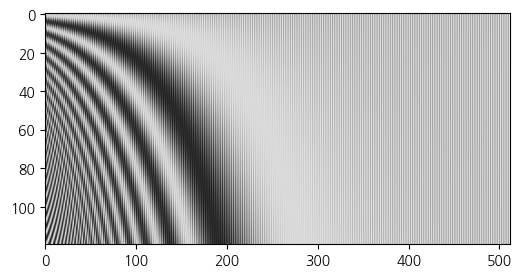

In [ ]:
seq_length = 120
d_model = 512

PE = np.zeros((seq_length, d_model))

for pos in range(seq_length):
    for i in range(d_model//2):
        PE[pos, 2*i]   = np.sin( pos / (10000**(2*i/d_model)) )
        PE[pos, 2*i+1] = np.cos( pos / (10000**(2*i/d_model)) )

plt.figure(figsize=(6,3))
plt.imshow(PE, aspect='auto', cmap='gray', interpolation='gaussian')
plt.show()

Í∑∏Î¶ºÏúºÎ°ú ÌëúÏãúÎêú ÌñâÎ†¨Ïùò Í∞Å ÌñâÏùÄ Îã®Ïñ¥Ïùò ÏúÑÏπòÎ≥ÑÎ°ú Îã§Î•¥Í≤å Í≥ÑÏÇ∞Îêú Ïà´Ïûê 512Í∞úÎ°ú Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÍ≥† Ïù¥ Ìñâ Î≤°ÌÑ∞Í∞Ä Îã®Ïñ¥Ïùò ÏúÑÏπò Ï†ïÎ≥¥Î•º ÎÇòÌÉÄÎÇ¥Îäî Í≥†Ïú†Ìïú Í∞íÏù¥ ÎêòÎäî Í≤ÉÏûÖÎãàÎã§.

ÎÖºÎ¨∏ÏóêÏÑúÎäî ÏúÑÏπò Ïù∏ÏΩîÎî©ÏùÑ Ïñ¥Îñ§ Î∞©Î≤ïÏúºÎ°ú Ìï¥ÎèÑ ÏÉÅÍ¥ÄÏóÜÎã§Í≥† Ïù¥ÏïºÍ∏∞Ìï©ÎãàÎã§. ÌÜ†ÌÅ∞ ÏúÑÏπòÏóê Îî∞Îùº Ïú†ÏùºÌïòÍ≤å Îã§Î•∏ Í∞íÎì§ÏùÑ Í≥ÑÏÇ∞Ìï¥Ï£ºÎäî Ìï®ÏàòÎùºÎ©¥ Î≠êÎì† Í∞ÄÎä•ÌïòÎã® Ïù¥ÏïºÍ∏∞ÏûÖÎãàÎã§. sin, cosÍ∞ôÏùÄ Ï£ºÍ∏∞ Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÎ©¥ ÏúÑÏπòÏóê Îî∞Îùº ÏÑúÎ°ú Îã§Î•∏ Í∞íÏùÑ Í≥ÑÏÇ∞Ìï† Ïàò ÏûàÎäî Í≤É Ïù¥Ïô∏ÏóêÎèÑ ÏÉÅÎåÄÏúÑÏπòÏùò ÏÑ†ÌòïÏÑ±ÏùÑ ÌôïÎ≥¥Ìï† Ïàò ÏûàÎã§Îäî Ïû•Ï†êÎèÑ ÏûàÏäµÎãàÎã§. ÏÉÅÎåÄÏúÑÏπòÏùò ÏÑ†ÌòïÏÑ±ÏùÑ ÏûêÏÑ∏Ìûà ÏÑ§Î™ÖÌïú Í∏ÄÏùÄ Ïù¥ Î∏îÎ°úÍ∑∏[[6](https://kazemnejad.com/blog/transformer_architecture_positional_encoding/)]Î•º Ï∞∏Í≥†ÌïòÏãúÎ©¥ Ï¢ãÍ≤†ÏäµÎãàÎã§.

Ïó¨Í∏∞ÏÑúÎäî Í∞ÑÎã®Ìïú Ïã§ÌóòÏúºÎ°ú ÏÉÅÎåÄÏúÑÏπòÏùò ÏÑ†ÌòïÏÑ±ÏùÑ ÏßÅÍ¥ÄÏ†ÅÏúºÎ°ú ÏïåÏïÑÎ≥¥Í≤†ÏäµÎãàÎã§.

In [ ]:
def pe_test(pos, i, d_model=512):
    PE = []
    PE.append( np.sin( pos / (10000**(2*i/d_model)) ) )
    PE.append( np.cos( pos / (10000**(2*i/d_model)) ) )

    return np.array(PE)

In [ ]:
k = 10
d_model = 512
i = 1

pos1 = 100
pos1k = pos1 + k

pos2 = 172
pos2k = pos2 + k

M_k = np.array([[np.cos(k/(10000**(2*i/d_model))), np.sin(k/(10000**(2*i/d_model)))], 
                [-np.sin(k/(10000**(2*i/d_model))), np.cos(k/(10000**(2*i/d_model)))]])

pe_pos1 = pe_test(pos1, i)
pe_pos1k = pe_test(pos1k, i)
pe_pos2 = pe_test(pos2, i)
pe_pos2k = pe_test(pos2k, i)

print(f'pe at {pos1}:', pe_pos1)
print(f'pe at {pos1k}:', pe_pos1k)
print(f'linear transformation of pe at {pos1} by M:', np.dot(M_k, pe_pos1))

print(f'pe at {pos2}:', pe_pos2)
print(f'pe at {pos2k}:', pe_pos2k)
print(f'linear transformation of pe at {pos2} by M:', np.dot(M_k, pe_pos2))

pe at 100: [ 0.79754236 -0.60326294]
pe at 110: [-0.64526647  0.76395758]
linear transformation of pe at 100 by M: [-0.64526647  0.76395758]
pe at 172: [ 0.55020692 -0.83502835]
pe at 182: [-0.3529983   0.93562396]
linear transformation of pe at 172 by M: [-0.3529983   0.93562396]


ÏúÑ ÏÜåÏä§Î•º Î≥¥Î©¥ ÏúÑÏπò 100ÏóêÏÑú ÏúÑÏπòÏù∏ÏΩîÎî©ÏùÑ Ìïú Í∞íÍ≥º `k=10`ÎßåÌÅº Îñ®Ïñ¥ÏßÑ ÏúÑÏπò 110ÏóêÏÑú ÏúÑÏπòÏù∏ÏΩîÎî© Í∞íÏùÑ Ï∂úÎ†•Ìï©ÎãàÎã§. Í∑∏Î¶¨Í≥† ÏúÑÏπò 100ÏóêÏÑú ÏúÑÏπò Ïù∏ÏΩîÎî© Í∞íÏóêÏÑú Î≥ÄÌôòÌòïÎ†¨ `M_k`ÏùÑ Í≥±Ìïú Í∞íÎèÑ Ìï®Íªò Ï∂úÎ†•Ìï©ÎãàÎã§. Í∞íÏùÑ ÎπÑÍµêÌï¥Î≥¥Î©¥ 100ÏóêÏÑú 10ÎßåÌÅº Îñ®Ïñ¥ÏßÑ ÏúÑÏπò 110ÏóêÏÑú Ïù∏ÏΩîÎî© Í∞íÏù¥ 100ÏóêÏÑú ÏúÑÏπò Ïù∏ÏΩîÎî© Í∞íÏùÑ MÏùÑ ÏÇ¨Ïö©Ìï¥ ÏÑ†ÌòïÎ≥ÄÌôòÌïú Í∞íÍ≥º ÎòëÍ∞ôÏùÄ Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§. ÎèôÏùºÌïú Ïã§ÌóòÏùÑ Í∏∞Ï§Ä ÏúÑÏπò 172ÏóêÏÑú Ìï¥ÎèÑ 172ÏóêÏÑú ÏúÑÏπò Ïù∏ÏΩîÎî© Í∞íÏóê `M_k`ÏùÑ Í≥±Ìïú Í∞ëÍ≥º 172+10ÏóêÏÑú ÏúÑÏπò Ïù∏ÏΩîÎî© Í∞íÏù¥ ÎèôÏùºÌïú Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§. Ï¶â Ïñ¥Îñ§ ÏúÑÏπòÎ•º Í∏∞Ï§ÄÏúºÎ°ú Ïû°Îì† `k`(offset)ÎßåÌÅº Îñ®Ïñ¥ÏßÑ ÏúÑÏπòÏóêÏÑú Ïù∏ÏΩîÎî© Í∞íÏùÄ

$$
PE_{\text{pos}+k} = M(k) \times PE_{\text{pos}}
$$

ÎùºÎäî ÏÑ†ÌòïÍ¥ÄÍ≥ÑÏóê ÏûàÍ≤å ÎêòÎäî Í≤ÉÏûÖÎãàÎã§.

ÏúÑ ÏΩîÎìúÏÖÄÏóêÏÑúÎäî ÎÖºÎ¨∏Ïóê ÎÇòÏò® ÏàòÏãùÏùÑ Í∑∏ÎåÄÎ°ú Íµ¨ÌòÑÌïòÏòÄÍ≥† ÏïÑÎûò ÏΩîÎìúÏóêÏÑúÎäî ÏàòÏπò Í≥ÑÏÇ∞ÏóêÏÑú ÏïàÏ†ïÏÑ±ÏùÑ ÏúÑÌï¥ ÎÖºÎ¨∏Ïóê ÏãùÏùÑ Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÍ≥† ÏïÑÎûòÏ≤òÎüº Î≥ÄÌôòÌï¥ÏÑú Íµ¨ÌòÑÌï©ÎãàÎã§.

$$
\begin{aligned}
\frac{pos}{10000^{2i/d_{\text{model}}}} 
&= pos \times \left[ \exp\left\{{\log\left(  \frac{1}{10000^{2i/d_{\text{model}}}}\right)} \right\} \right] \\
&= pos \times \left[ \exp \left\{ \log \left( \left( 10000^{2i/d_{\text{model}}} \right)^{-1}  \right) \right\} \right]\\
&= pos \times \left[ \exp\left\{\log \left( 10000^{-2i/d_{\text{model}}} \right)\right\} \right] \\
&= pos \times \left[ \exp\left\{ -\frac{2i}{d_{\text{model}}} \log(10000) \right\} \right]
\end{aligned}
$$

In [ ]:
class PositionalEncoding(nn.Module):
    "Implement the PE function."
    def __init__(self, d_model, dropout, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)
        
        # Compute the positional encodings once in log space.
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) *
                             -(math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)
        
    def forward(self, x):
        pe_val = self.pe[:, :x.size(1)]
        pe_val.requires_grad = False
        
        x = x + pe_val
        # x = x + Variable(self.pe[:, :x.size(1)], requires_grad=False)

        # page 7
        # In addition, we apply dropout to the sums of the embeddings and the
        # positional encodings in both the encoder and decoder stacks.
        # For the base model, we use a rate of Pdrop=0.1.
        return self.dropout(x)

Í∑∏Î¶¨Í≥† ÎßàÏßÄÎßâ Ï∂úÎ†•ÏùÑ `nn.Dropout`ÏùÑ ÌÜµÍ≥ºÏãúÏºú Í∑úÏ†úregularization Ìö®Í≥ºÎ•º Ï£ºÍ≥† ÏûàÏäµÎãàÎã§.

ÏßÄÍ∏àÍπåÏßÄ ÏÑ§Î™ÖÌïú ÏûÑÎ≤†Îî©Í≥º ÏúÑÏπò Ïù∏ÏΩîÎî©Ïù¥ Ïñ¥ÎñªÍ≤å ÏûëÎèôÌïòÎäîÏßÄ Ïã§Ï†ú Í∞ÑÎã®Ìïú ÏòàÎ°ú ÏïåÏïÑÎ≥¥Í≤†ÏäµÎãàÎã§. Îã§Ïùå ÏΩîÎìúÎäî Ïó¥ÌïúÍ∞ú Îã®Ïñ¥Î•º ÏÇ¨Ïö©ÌïòÏó¨ Î¨∏Ïû•ÏùÑ ÎßåÎì§ Îïå Í∞Å Îã®Ïñ¥Î•º Í∏∏Ïù¥ 10Ïù∏ Î≤°ÌÑ∞Î°ú ÏûÑÎ≤†Îî©ÌïòÎäî ÏûÑÎ≤†Îî© Ï∏µÍ≥º Ïù¥Ïóê ÎåÄÌïú ÏúÑÏπò Ïù∏ÏΩîÎî©Ï∏µÏùÑ Ïã§ÌóòÌïú ÏΩîÎìúÏûÖÎãàÎã§. ÏΩîÎìúÏóê ÏûêÏÑ∏Ìïú Ï£ºÏÑùÏùÑ Îã¨ÏïòÍ≥† Ï£ºÏÑùÏùÑ Î≥¥Î©¥ Ïïå Ïàò ÏûàÏßÄÎßå Ïã§Ï†ú Îã®Ïñ¥Î°ú Íµ¨ÏÑ±Îêú Î¨∏Ïû•Ïù¥ ÏïÑÎãå Ïà´ÏûêÍ∞Ä Îã®Ïñ¥ÎùºÍ≥† Í∞ÄÏ†ïÌïú ÏòàÏ†úÏûÖÎãàÎã§.

integer tokens: tensor([[8, 4, 6, 8, 1]])


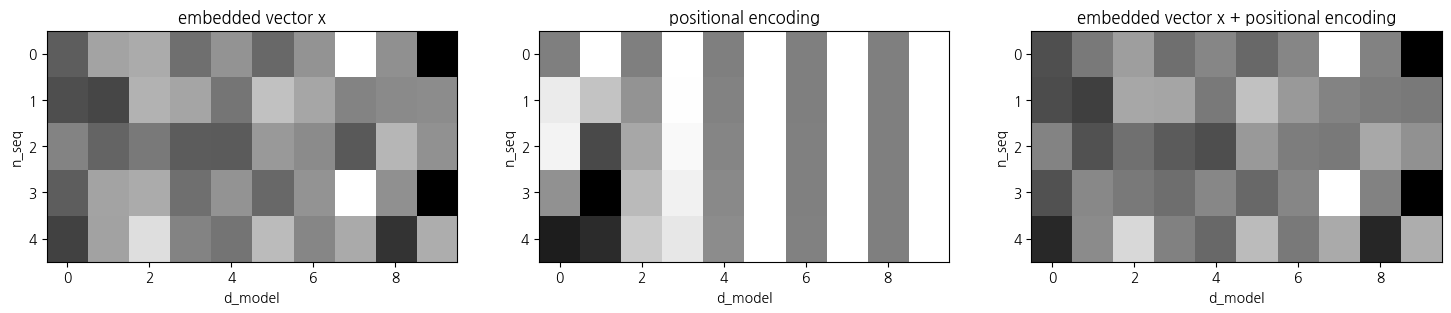

In [ ]:
torch.random.manual_seed(15)

# Îã®Ïñ¥Ïû• ÌÅ¨Í∏∞ 11, ÏûÑÎ≤†Îî© Î≤°ÌÑ∞ Í∏∏Ïù¥ 10Ïù∏ ÏûÑÎ≤†Îî© Ï∏µ ÏÑ†Ïñ∏
V = 11
d_model = 10
emb = Embeddings(d_model, V)
# Í∏∏Ïù¥ 10Ïù∏ Î¨∏Ïû•Ïùò ÏúÑÏπòÎ•º Ïù∏ÏΩîÎî©ÌïòÎäî ÏúÑÏπò Ïù∏ÏΩîÎî© Ï∏µ ÏÑ†Ïñ∏
pe  = PositionalEncoding(d_model, 0.1)
# Í∑∏Î¶º Í∑∏Î¶¨Í∏∞ ÏúÑÌï¥ positional encodingÏùÑ Î≥µÏÇ¨Ìï¥Îë†
pe_ = pe.pe.clone()

# Î¨∏Ïû• Í∏∏Ïù¥Îäî 5Ïù¥Í≥†
n_seq = 5
# 0~10ÍπåÏßÄ Ïà´Ïûê 5Í∞úÎ•º Î¨¥ÏûëÏúÑÎ°ú ÎΩëÏïÑÏÑú Î¨∏Ïû•ÏùÑ Íµ¨ÏÑ±
# Ïù¥ ÏòàÏóêÏÑú Î¨∏Ïû•ÏùÄ Ïã§Ï†ú Îã®Ïñ¥Î°ú Íµ¨ÏÑ±Îêú Í≤ÉÏùÄ ÏïÑÎãàÍ≥† 0, 1, 2, 3, ..., 10Ïù∏ 
# Ïà´ÏûêÎ•º Îã®Ïñ¥Î°ú Í∞ÑÏ£ºÌï®
x = torch.randint(0, V-1, (1, n_seq,), requires_grad=False)
print("integer tokens:", x)

# Feed forward Embeddings-PositionalEncoding
# Ïà´Ïûê(Îã®Ïñ¥) Îã§ÏÑØÍ∞úÎ°ú Íµ¨ÏÑ±Îêú ÏûÖÎ†•ÏùÑ ÏûÑÎ≤†Îî©Ï∏µÏùÑ ÌÜµÌï¥ (n_seq, d_model)Î°ú Î≥ÄÌôò
embedded = emb(x)

# ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Ïóê ÎåÄÌïú ÏúÑÏπò Ïù∏ÏΩîÎî© Ï†ïÎ≥¥Î•º Íµ¨Ìï¥ÏÑú ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Ïóê ÎçîÌï®
embedded_pe = pe(embedded)

# ÏûÑÎ≤†Îî© Î≤°ÌÑ∞ÏôÄ ÏúÑÏπò Ïù∏ÏΩîÎî©Ïù¥ ÎçîÌï¥ÏßÑ ÏûÖÎ†• Î≤°ÌÑ∞Î•º Í∑∏Î¶º 
fig, axs = plt.subplots(figsize=(18,3), nrows=1, ncols=3)
axs[0].imshow(embedded.detach().numpy()[0], aspect='auto', cmap='gray')
axs[0].set_xlabel('d_model')
axs[0].set_ylabel('n_seq')
axs[0].set_title(f"embedded vector x")

axs[1].imshow(pe_.numpy()[0][:x.shape[1]], aspect='auto', cmap='gray')
axs[1].set_xlabel('d_model')
axs[1].set_ylabel('n_seq')
axs[1].set_title(f"positional encoding")

axs[2].imshow(embedded_pe.detach().numpy()[0], aspect='auto', cmap='gray')
axs[2].set_xlabel('d_model')
axs[2].set_ylabel('n_seq')
axs[2].set_title(f"embedded vector x + positional encoding")

plt.show()

Ïò§Î•∏Ï™Ω Í∑∏Î¶ºÏùÑ Î≥¥Î©¥ ÏúÑÏπò Ï†ïÎ≥¥Í∞Ä ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Ïóê ÎåÄÌï¥Ï†∏ÏÑú ÏõêÎûò ÏûÑÎ≤†Îî© Î≤°ÌÑ∞ÏôÄÎäî ÏÉâÏù¥ Ï°∞Í∏àÏî© Îã¨ÎùºÏßÑ Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§. 

## Encoder

Ïù¥Ï†ú Ïù∏ÏΩîÎçîÎ°ú Îç∞Ïù¥ÌÑ∞Î•º ÏûÖÎ†•ÌïòÍ∏∞ ÏúÑÌïú Ï§ÄÎπÑÎ•º ÎßàÏ≥§ÏúºÎãà Ïù∏ÏΩîÎçî Íµ¨Ï°∞Î•º ÏïåÏïÑÎ¥ÖÏãúÎã§.

ÏûÑÎ≤†Îî©Í≥º Ìè¨ÏßÄÏÖò Ïù∏ÏΩîÎî©Ïù¥ ÎÅùÎÇú ÏûÖÎ†•Ïù¥ Q, K, VÎùºÎäî ÏÑ∏ ÏûÖÎ†•ÏúºÎ°ú Ïù∏ÏΩîÎçîÎ°ú Îì§Ïñ¥Í∞ëÎãàÎã§. ÏùºÎ∞òÏ†ÅÏúºÎ°ú Q(ÏøºÎ¶¨), K(ÌÇ§), V(Î≤®Î•ò)Îäî Îã§Î•∏ Í∞íÏù¥ ÎêòÏñ¥Ïïº ÌïòÏßÄÎßå Ïó¨Í∏∞ÏÑ† ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖòÏùÑ ÏàòÌñâÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Í∞ôÏùÄ Í∞íÏúºÎ°ú ÏûÖÎ†•Îê©ÎãàÎã§. Ïñ¥ÌÖêÏÖòÏùÄ Ìä∏ÎûúÏä§Ìè¨Î®∏ Ïù¥Ï†ÑÍπåÏßÄ Ïù∏ÏΩîÎçîÏôÄ ÎîîÏΩîÎçî Í∞ÑÏóê ÏùºÏñ¥ÎÇòÎäî Ïó∞ÏÇ∞ÏúºÎ°ú Í∞úÎ∞úÎêòÏóàÏúºÎ©∞ ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖòÏóê ÎåÄÏùëÎêòÎäî Ïö©Ïñ¥Î°ú ÌÅ¨Î°úÏä§ Ïñ¥ÌÖêÏÖòÏù¥ÎùºÍ≥† Î∂ÄÎ•¥Í∏∞ÎèÑ Ìï©ÎãàÎã§.

### Attention

Ïñ¥ÌÖêÏÖòÏùò Í∏∞Î≥∏Ï†ÅÏù∏ ÎèôÏûë Î∞©ÏãùÏùÄ ÏøºÎ¶¨Î•º Í∞ÄÏßÄÍ≥† ÌÇ§Î°ú ÏßàÏùòÎ•º Ìï¥ÏÑú ÏñªÏùÄ Ïñ¥ÌÖêÏÖò Í∞ÄÏ§ëÏπòÎ•º Î≤®Î•òÏóê Ï†ÅÏö©ÌïòÎäî Í≤ÉÏûÖÎãàÎã§. Î≥¥ÌÜµ Ïñ¥ÌÖêÏÖòÏóêÏÑú ÌÇ§ÎûÄ Ïù∏ÏΩîÎçîÏóêÏÑú ÏÉùÏÑ±Ìïú Ï†ïÎ≥¥Î°ú Ïù¥ Ï†ïÎ≥¥Î•º ÎîîÏΩîÎçîÏóêÍ≤å Ìö®Ïú®Ï†ÅÏúºÎ°ú Ï†ÑÎã¨ÌïòÎäî Í≤ÉÏù¥ Ïñ¥ÌÖêÏÖòÏùò Ï£º Î™©Ï†ÅÏûÖÎãàÎã§. ÏôúÎÉêÌïòÎ©¥ ÎîîÏΩîÎçîÎäî Ï¢ãÏùÄ Í≤∞Í≥ºÎ•º ÏÉùÏÑ±ÌïòÍ∏∞ ÏúÑÌï¥ Ïù∏ÏΩîÎçîÏùò Ï†ïÎ≥¥Î•º Í∞ÄÎä•Ìïú ÎßéÏù¥ ÌôúÏö©ÌïòÎäî Ìé∏Ïù¥ ÎèÑÏõÄÏù¥ ÎêòÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§. Ïù¥Ï†Ñ seq2seqÎäî Ïù∏ÏΩîÎçîÍ∞Ä Ïù∏ÏΩîÎî©Ìïú ÎßàÏßÄÎßâ Í≤∞Í≥ºÎßå ÎîîÏΩîÎçîÎ°ú Ï†ÑÎã¨ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê ÎîîÏΩîÎçî ÏûÖÏû•ÏóêÏÑúÎäî Ï¢ãÏùÄ Í≤∞Í≥ºÎ•º ÏÉùÏÑ±ÌïòÍ∏∞ ÌûòÎì† Í≤ÉÏù¥Ï£†. Ï†ÑÏ≤¥Ï†ÅÏù∏ Í≥ºÏ†ïÏùÄ ÎåÄÎûµ Îã§ÏùåÏ≤òÎüº ÏßÑÌñâÎê©ÎãàÎã§.

1. Ïù∏ÏΩîÎçîÎäî Ïù∏ÏΩîÎî© Ï§ëÏóê ÏÉùÏÑ±Îêú Ï†ïÎ≥¥ Îã§ÏãúÎßêÌï¥ ÌÇ§Î•º Î™®Îëê Í∞ÄÏßÄÍ≥† ÏûàÏäµÎãàÎã§.
2. ÎîîÏΩîÎçîÍ∞Ä Ï†ïÎ≥¥Î•º ÏÉùÏÑ±Ìï† Îïå ÎîîÏΩîÎçîÍ∞Ä ÎßåÎì† Ï§ëÍ∞Ñ Í≤∞Í≥º Ï¶â ÏøºÎ¶¨Î•º Í∞ÄÏßÄÍ≥† Ïù¥ ÏøºÎ¶¨ÏôÄ Í∞ÄÏû• Í¥ÄÍ≥ÑÍ∞Ä ÎÜíÏùÄ Ï†ïÎ≥¥Í∞Ä Ïñ¥Îñ§ Í≤ÉÏù∏ÏßÄ Ïù∏ÏΩîÎçî Ï™ΩÏóê Î¨ºÏñ¥ Î¥ÖÎãàÎã§. 
3. Ïù∏ÏΩîÎçîÎäî ÏûêÍ∏∞Í∞Ä Ïù∏ÏΩîÎî©ÌïòÎ©¥ÏÑú ÏÉùÏÑ±Ìïú Ï†ïÎ≥¥(ÌÇ§)Îì§ Ï§ëÏóê ÏöîÏ≤≠Î∞õÏùÄ ÏøºÎ¶¨ÏôÄ Ïñ¥Îñ§ ÌÇ§Í∞Ä ÏñºÎßàÎÇò Ï†ÅÌï©ÌïúÏßÄ Í∞ÄÏ§ëÏπò Í≥ÑÏÇ∞ÏùÑ Ìï©ÎãàÎã§.
4. Ïù∏ÏΩîÎçîÎäî Ïù¥Î†áÍ≤å Í≥ÑÏÇ∞Îêú Í∞ÄÏ§ëÏπòÎ•º ÎîîÏΩîÎçîÎ°ú Ï†ÑÎã¨Ìï† Î≤®Î•òÎùºÎäî Í∞íÏóê Í∞ÄÏ§ëÌï©ÌïòÏó¨ ÎîîÏΩîÎçîÎ°ú Ï†ÑÎã¨Ìï©ÎãàÎã§.
5. ÎîîÏΩîÎçîÎäî 4ÏóêÏÑú Ï†ÑÎã¨Î∞õÏùÄ Ï†ïÎ≥¥ÏôÄ ÌòÑÏû¨ ÎîîÏΩîÎçîÍ∞Ä ÎîîÏΩîÎî©Ìïú Ï†ïÎ≥¥Î•º Ìï©ÌïòÏó¨ ÏµúÏ¢Ö Í≤∞Í≥ºÎ•º ÎßåÎì§Ïñ¥ ÎÉÖÎãàÎã§.

Ïù¥Î†áÍ≤å ÌÅ¨Î°úÏä§ Ïñ¥ÌÖêÏÖòÏù∏ Í≤ΩÏö∞ ÎåÄÏ∂© ÏïÑÏù¥ÎîîÏñ¥Îßå Îì§Ïñ¥ÎèÑ Ï∂©Î∂ÑÌûà ÏÑ±Îä• Ìñ•ÏÉÅÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÍ≤†Îã§Îäî ÏÉùÍ∞ÅÏù¥ Îì≠ÎãàÎã§. ÌïòÏßÄÎßå Ìä∏ÎûúÏä§Ìè¨Î®∏Îäî Ïù¥ Ïñ¥ÌÖêÏÖò ÏïÑÏù¥ÎîîÏñ¥Î•º Ïù∏ÏΩîÎçî ÎòêÎäî ÎîîÏΩîÎçîÏóêÎßå Ï†ÅÏö©ÌïòÎäî ÏãùÏúºÎ°ú Ï†ÅÏö©Î≤îÏúÑÎ•º ÎÑìÌòîÏäµÎãàÎã§. Ïù∏ÏΩîÎçîÎäî ÏûÖÎ†• Ï†ïÎ≥¥ÎÅºÎ¶¨ Ïñ¥ÌÖêÏÖòÏùÑ Í≥ÑÏÇ∞Ìï¥ÏÑú ÎîîÏΩîÎçîÍ∞Ä ÎîîÏΩîÎî©ÌïòÍ∏∞ Ï¢ãÏùÄ Ïù∏ÏΩîÎî© Ï†ïÎ≥¥Î•º ÎßåÎì§Ïñ¥ ÎÇº Ïàò ÏûàÍ≥† ÎîîÏΩîÎçîÎèÑ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú ÎîîÏΩîÎî©ÎêòÎäî Ï†ïÎ≥¥ ÎÅºÎ¶¨ Ïñ¥ÌÖêÏÖòÏùÑ Ìï¥ÏÑú Îçî Ï¢ãÏùÄ Í≤∞Í≥ºÎ•º ÎßåÎì§Ïñ¥ ÎÇºÏàò ÏûàÍ≤å ÎêòÎäî Í≤ÉÏûÖÎãàÎã§. Ïù¥Îü∞ Ïñ¥ÌÖêÏÖòÏùÑ ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖòÏù¥Îùº Ìï©ÎãàÎã§.

ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖòÏùÄ ÎÖºÎ¨∏ÏóêÏÑú Ï†úÏãúÌïòÎäî Îã§Ïùå ÏàòÏãùÏúºÎ°ú ÏàòÌñâÎê©ÎãàÎã§.

$$
\text{Attention}(Q, K, V) = \text{softmax} \left( \frac{QK^T}{\sqrt{d_k}} \right)V
$$

Ïö∞ÏÑ† $W^Q_i$, $W^K_i$, $W^V_i$Î•º Í∞ÅÍ∞Å Í≥±ÌïòÏó¨ $Q$, $K$, $V$Î•º ÎßåÎì≠ÎãàÎã§. Ïù¥ÌõÑ $\text{softmax} \left( \frac{QK^T}{\sqrt{d_k}} \right)$Í∞Ä Ïã§ÌñâÎêòÎ©¥ $(n_{\text{seq}}, n_{\text{seq}})$Ïù∏ `p_attn` ÌñâÎ†¨Ïù¥ ÎßåÎì§Ïñ¥ÏßÄÎäîÎç∞ Ïù¥ ÌñâÎ†¨ÏùÄ Í∞Å ÌÜ†ÌÅ∞Îì§Í∞ÑÏùò Í¥ÄÍ≥ÑÍ∞Ä Í≥ÑÏÇ∞ÎêòÎèÑÎ°ù  $W^Q_i$, $W^K_i$Í∞Ä ÌïôÏäµÎêòÍ∏∏ Î∞îÎùºÎäî Í≤ÉÏûÖÎãàÎã§.  $W^Q_i$, $W^K_i$Í∞Ä Ïûò ÌïôÏäµÎêòÏñ¥ i love you so muchÎùºÎäî Î¨∏Ïû•ÏóêÏÑú Í∞Å ÌÜ†ÌÅ∞Í∞ÑÏùò Í¥ÄÍ≥ÑÍ∞Ä Ïûò ÎßåÎì§Ïñ¥Ï°åÎã§Í≥† Í∞ÄÏ†ïÌïòÍ≤†ÏäµÎãàÎã§. Í∑∏Îü¨Î©¥ loveÎùºÎäî ÌÜ†ÌÅ∞ÏùÄ Ìïú Î¨∏Ïû•ÏïàÏóêÏÑú love, you ÎùºÎäî ÌÜ†ÌÅ∞ÌïòÍ≥† Í¥ÄÍ≥ÑÍ∞Ä ÎÜíÍ≤å ÌëúÌòÑÎê† Ïàò ÏûàÏäµÎãàÎã§. Ïù¥Î†áÍ≤å Ïù∏ÏΩîÎî©Îêú Ïñ¥ÌÖêÏÖò ÌñâÎ†¨Í≥º $V$Î•º Í≥±ÌïòÍ≤å Îê©ÎãàÎã§. ÌñâÎ†¨Í≥±ÏùÄ ÏïûÏóêÏÑú Í≥±ÌïòÎäî ÌñâÎ†¨Ïùò ÌñâÏúºÎ°ú Îí§ÏóêÏÑú Í≥±ÌïòÎäî ÌñâÎ†¨Ïùò ÌñâÏùÑ ÏÑ†ÌòïÏ°∞Ìï©ÌïòÎäî Í≤ÉÍ≥º Í∞ôÏäµÎãàÎã§. ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú Í≥ÑÏÇ∞Îêú `head_i`ÏóêÏÑú loveÏóê Ìï¥ÎãπÌïòÎäî ÌñâÏùÄ $V$ ÌñâÎ†¨Ïùò Ìñâ Îã§ÏÑØ Í∞úÍ∞Ä ÏÑ†ÌòïÏ°∞Ìï©Îêú Í≤ÉÏù∏Îç∞ Ïù¥Îïå $V$ÏóêÏÑú loveÏôÄ youÏóê Ìï¥ÎãπÌïòÎäî ÌñâÏóê ÎÜíÏùÄ Í∞ÄÏ§ëÏπòÍ∞Ä Î∂ÄÏó¨ÎêòÏñ¥ Ï°∞Ìï©Îêú Î≤°ÌÑ∞Í∞Ä Îê©ÎãàÎã§. 

Ïù¥Î†áÍ≤å ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖòÎêòÏñ¥ Ï∂úÎ†•ÎêòÎäî Í≤∞Í≥ºÎäî Í∞Å ÌÜ†ÌÅ∞Ïù¥ `d_model`ÏÇ¨Ïù¥Ï¶àÎ°ú Î≥ÄÌôòÎêú Î≤°ÌÑ∞Î•º Í∞ÄÏßÄÎäîÎç∞ Í∑∏ÏπòÏßÄ ÏïäÍ≥† Í∞Å Î≤°ÌÑ∞Îì§Ïù¥ ÏÑúÎ°ú Í¥ÄÍ≥ÑÍ∞Ä ÎÜíÏùÄ ÌÜ†ÌÅ∞Îì§ÎÅºÎ¶¨ Ïûò Ï°∞Ìï©ÎêòÏñ¥ ÎßåÎì§Ïñ¥ÏßÑ Î≤°ÌÑ∞Í∞Ä ÎêòÍ≤å Îê©ÎãàÎã§.

ÏïÑÎûò ÏΩîÎìúÎäî Ïñ¥ÌÖêÏÖòÏùÑ Íµ¨ÌòÑÌïú Í≤ÉÏûÖÎãàÎã§. ÏøºÎ¶¨, ÌÇ§, Î≤®Î•òÎ°ú Î¨¥ÏóáÏùÑ ÏûÖÎ†•ÎäîÍ∞ÄÏóê Îî∞Îùº ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖòÍ≥º ÌÅ¨Î°úÏä§ Ïñ¥ÌÖêÏÖòÏúºÎ°ú ÎÇòÎàå Ïàò ÏûàÏúºÎØÄÎ°ú Íµ¨ÌòÑ ÏΩîÎìúÎäî Îëê Í≤ΩÏö∞ Î™®Îëê ÎèôÏùºÌï©ÎãàÎã§.

In [ ]:
def attention(query, key, value, mask=None, dropout=None):
    "Compute 'Scaled Dot Product Attention'"
    # ÏïÑÎûòÏÑú nbatchesÎäî ÎØ∏ÎãàÎ∞∞Ïπò ÌÅ¨Í∏∞, ÏΩîÎìúÏóêÏÑú nbatchesÎùºÎäî Î≥ÄÏàòÎ™ÖÏùÑ Ïì∞ÎØÄÎ°ú
    # ÌëúÍ∏∞Î•º ÌÜµÏùºÌïòÍ∏∞ ÏúÑÌï¥ nbatchesÎ°ú ÌëúÍ∏∞
    # query: (nbatches, h, n_seq, d_k)
    # key:   (nbatches, h, n_seq, d_k)
    # value: (nbatches, h, n_seq, d_v) Ïù∏Îç∞ d_k=d_vÎ°ú ÎëêÏóàÏùå
    # Ïù¥ Ìï®ÏàòÎäî ÏïÑÎûòÏ™Ω MultiHeadedAttention ÌÅ¥ÎûòÏä§Ïùò foward Ìï®ÏàòÏóêÏÑú Ìò∏Ï∂úÎê®

    d_k = query.size(-1)
    
    # ScaledÏóê ÎåÄÌïú Ïó¨Îü¨ Ï∞∏Í≥† ÎßÅÌÅ¨Îì§
    # https://stats.stackexchange.com/questions/318243/variance-and-expectation-of-dot-product
    # https://www.reddit.com/r/learnmath/comments/9gbk4q/mean_and_variance_of_dot_product_of_two_random/
    # https://stats.stackexchange.com/questions/52646/variance-of-product-of-multiple-random-variables
    scores = torch.matmul(query, key.transpose(-2, -1)) / math.sqrt(d_k)
    # scores: (nbatches, h, n_seq, n_seq)
    
    if mask is not None:
        scores = scores.masked_fill(mask == 0, -1e9)

    p_attn = F.softmax(scores, dim = -1)

    if dropout is not None:
        p_attn = dropout(p_attn)

    # torch.matmul(p_attn, value): (nbatches, h, n_seq, n_seq)*(nbatches, h, n_seq, d_v)
    # = (nbatches, h, n_seq, d_v),      p_attn: (nbatches, h, n_seq, nseq)
    return torch.matmul(p_attn, value), p_attn

ÏúÑ Í≥ºÏ†ïÏùÑ Scaled-dot product attentionÏù¥ÎùºÍ≥† ÌïòÎäîÎç∞ $\sqrt{d_k}$Î°ú ÎÇòÎàÑÎäî Î∂ÄÎ∂Ñ ÎïåÎ¨∏Ïóê scaledÎùºÎäî Ïù¥Î¶ÑÏù¥ Î∂ôÏóàÏäµÎãàÎã§. $\sqrt{d_k}$Î°ú ÎÇòÎàÑÎäî Ïù¥Ïú†Îäî softmaxÎ•º Ï∑®Ìïú ÌõÑ Í∞íÎì§Ïù¥ Í∑πÎã®Ï†ÅÏúºÎ°ú 0Í≥º 1Ïù¥ Î™∞Î¶¨Í≤å ÎêòÎäî Í≤ÉÏùÑ ÎßâÍ∏∞ ÏúÑÌï®ÏûÖÎãàÎã§. ÎßåÏïΩ Ïù¥Îü∞ ÌòÑÏÉÅÏù¥ ÏùºÏñ¥ÎÇúÎã§Î©¥ softmaxÎ•º ÎØ∏Î∂ÑÌñàÏùÑ Îïå ÎØ∏Î∂Ñ Í≥ÑÏàòÍ∞Ä Í±∞Ïùò 0Ïù¥ ÎêòÏñ¥ Í∑∏ÎûòÎîîÏñ∏Ìä∏Î•º Íµ¨ÌïòÍ∏∞ ÌûòÎì§Ïñ¥ÏßÄÎäî Î¨∏Ï†úÍ∞Ä ÏÉùÍπÅÎãàÎã§. Ï¢Ä Îçî ÏûêÏÑ∏Ìïú ÏÑ§Î™ÖÏùÄ ÏïÑÎûò Í∏∞Ïà†ÌïòÏòÄÏäµÎãàÎã§. 

Ïù∏ÏΩîÎçîÎäî NÍ∞úÍ∞Ä ÎàÑÏ†ÅÎêòÎ©¥ÏÑú Ïù∏ÏΩîÎçîÏùò Ï∂úÎ†•Ïù¥ Îã§Ïãú Ïù∏ÏΩîÎçîÏùò ÏûÖÎ†•ÏúºÎ°ú Îì§Ïñ¥Í∞ÄÎäî Íµ¨Ï°∞Î°ú ÎêòÏñ¥ ÏûàÏäµÎãàÎã§. Í∑∏Î¶ºÏùÑ Î≥¥Î©¥ Ïù∏ÏΩîÎçîÍ∞Ä Ïù∏ÏΩîÎî©ÏùÑ Ï∂úÎ†•ÌïòÍ∏∞ Ï†ÑÏóê Î†àÏù¥Ïñ¥ Ï†ïÍ∑úÌôîÏ∏µÏùÑ Í±∞ÏπòÍ≤å Îê©ÎãàÎã§. Ï¶â ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖòÏùÑ ÏúÑÌï¥ ÏûÖÎ†•ÎêòÎäî $Q$, $K$Îäî Î†àÏù¥Ïñ¥ Ï†ïÍ∑úÌôîÎ•º Í±∞ÏπòÍ≤å ÎêòÎØÄÎ°ú $Q$, $K$Ïùò ÌñâÎ≤°ÌÑ∞ $\mathbf{q}$ÏôÄ $\mathbf{k}$Ïùò ÏöîÏÜåÎì§ÏùÄ ÎåÄÎûµÏ†ÅÏúºÎ°ú ÌèâÍ∑† 0, Î∂ÑÏÇ∞ 1ÏùÑ Îî∞Î•∏Îã§Í≥† Í∞ÄÏ†ïÌï† Ïàò ÏûàÏäµÎãàÎã§.

$$
q_i , k_i \sim p(0, 1)
$$

ÌñâÎ†¨Í≥± $Q K^T$ÏóêÏÑú $Q$Ïùò Í∏∏Ïù¥ $d_k$Ïù∏ ÌñâÎ≤°ÌÑ∞ $\mathbf{q}$ÏôÄ $K$Ïùò Ïó¥Î≤°ÌÑ∞ $\mathbf{k}$Í∞Ä ÎÇ¥Ï†ÅÎêòÎäîÎç∞ Ïù¥ Îïå Î≤°ÌÑ∞Ïùò ÏöîÏÜåÍ∞Ä ÏÑúÎ°ú ÎèÖÎ¶ΩÏù¥Í≥† ÏúÑÏ≤òÎüº ÌèâÍ∑† 0, Î∂ÑÏÇ∞ 1ÏùÑ Îî∞Î•∏Îã§Í≥† Í∞ÄÏ†ïÌïòÎ©¥ $\mathbf{q} \cdot \mathbf{k}$Îäî ÌèâÍ∑† 0, Î∂ÑÏÇ∞ $d_k$Î•º Í∞ÄÏßÄÍ≤å Îê©ÎãàÎã§. Ïù¥Îäî Îã§ÏùåÏ≤òÎüº Î≥¥Ïùº Ïàò ÏûàÏäµÎãàÎã§.

$$
\begin{aligned}
\mathbb{E}\left[\mathbf{q} \cdot \mathbf{k}\right] 
&= \mathbb{E}\left[ \sum_{i=1}^{d_k} q_i k_i \right] \\
&= \sum_{i=1}^{d_k} \mathbb{E} \left[ q_i k_i \right]
\end{aligned} \tag{1}
$$

ÏúÑ Ïãù(1)ÏóêÏÑú Í∏∞ÎåìÍ∞íÏùò ÏÑ±Ïßà $\mathbb{E}[X+Y] = \mathbb{E}[X]+\mathbb{E}[Y]$Í∞Ä ÏÇ¨Ïö©ÎêòÏóàÏäµÎãàÎã§. Ïù¥Ï†ú ÏãúÍ∑∏Îßà ÏïàÏ™Ω $\mathbb{E} \left[ q_i k_i \right]$Î•º Ï†ÑÍ∞úÌï¥Î≥¥Î©¥

$$
\begin{aligned}
\mathbb{E}[q_i k_i] 
&= \sum_{q_i} \sum_{k_i} q_i  k_i \ p(q_i, k_i) \\
&= \sum_{q_i} \sum_{k_i} q_i  k_i \ p(q_i) p(k_i)  \quad \because q_i \text{ and } k_i \text{ are independent}  \\
&= \sum_{q_i} q_i \, p(q_i) \sum_{k_i} k_i \, p(k_i) \\
&= \mathbb{E}[q_i] \, \mathbb{E}[k_i] = 0 \quad \because \mathbb{E}[q_i] = \mathbb{E}[k_i] = 0
\end{aligned} \tag{2}
$$

Ïãù(2)Ïùò Í≤∞Í≥ºÎ•º Ïãù(1)Ïóê ÎåÄÏûÖÌïòÎ©¥ 

$$
\begin{aligned}
\mathbb{E}\left[\mathbf{q} \cdot \mathbf{k}\right] 
&= \mathbb{E}\left[ \sum_{i=1}^{d_k} q_i k_i \right] \\
&= \sum_{i=1}^{d_k} \mathbb{E} \left[ q_i k_i \right] \\
&= \sum_{i=1}^{d_k} 0 = 0
\end{aligned}
$$

Ïù¥ ÎêòÍ≤å Îê©ÎãàÎã§.

Î∂ÑÏÇ∞ÎèÑ ÏúÑÏôÄ ÎπÑÏä∑Ìïú Í≥ºÏ†ïÏúºÎ°ú $d_k$Í∞Ä Îê®ÏùÑ Î≥¥Ïùº Ïàò ÏûàÏäµÎãàÎã§.

$$
\begin{aligned}
\text{Var}\left[\mathbf{q} \cdot \mathbf{k}\right] 
&= \text{Var}\left[\sum_{i=1}^{d_k} q_i k_i \right]  \\
&= \sum_{i=1}^{d_k} \text{Var} \left[ q_i k_i \right]
\end{aligned} \tag{3}
$$

Ïãù(3)ÏóêÏÑú ÎèÖÎ¶ΩÏù∏ ÌôïÎ•†Î≥ÄÏàòÏóê ÎåÄÌïú Î∂ÑÏÇ∞Ïùò ÏÑ±Ïßà $\text{Var}[X+Y] = \text{Var}[X] + \text{Var}[Y]$Í∞Ä ÏÇ¨Ïö©ÎêòÏóàÏäµÎãàÎã§. 

Ïù¥Ï†ú Í∏∞ÎåìÍ∞íÏ≤òÎüº ÏãúÍ∑∏Îßà ÏïàÏ™ΩÏùÑ Ï†ÑÍ∞úÌïòÎ©¥

$$
\begin{aligned}
\text{Var}\left[ q_i k_i\right] 
&= \mathbb{E}[q_i^2 k_i^2]-\left(\mathbb{E}[q_i k_i ]\right)^2 \\[5pt]
&= \mathbb{E}\left[q_i^2\right] \mathbb{E}\left[ k_i^2 \right] - \mathbb{E}\left[q_i\right]^2 \mathbb{E} [k_i]^2 \\[5pt]
&=\left( \text{Var}[q_i]+\mathbb{E}[q_i]^2 \right) \left( \text{Var}[k_i]+\mathbb{E}[k_i]^2 \right) - \mathbb{E}\left[q_i\right]^2 \mathbb{E} [k_i]^2 \\[5pt]
&= \text{Var}[q_i] \text{Var}[k_i] + \text{Var}[q_i] \mathbb{E} [k_i]^2 + \mathbb{E} [q_i]^2 \text{Var}[k_i] + \mathbb{E}\left[q_i\right]^2 \mathbb{E} [k_i]^2 - \mathbb{E}\left[q_i\right]^2 \mathbb{E} [k_i]^2 \\[5pt]
&= \text{Var}[q_i] \text{Var}[k_i] + \text{Var}[q_i] \mathbb{E} [k_i]^2 + \mathbb{E} [q_i]^2 \text{Var}[k_i]
\end{aligned}
$$

Ïó¨Í∏∞ÏÑú Í∞Å ÏöîÏÜåÎì§ÏùÄ $ \mathbb{E} [q_i] = \mathbb{E} [k_i] = 0 $ , $\text{Var}[q_i] = \text{Var}[k_i] = 1$Ïù¥ÎØÄÎ°ú

$$
\text{Var}\left[ q_i k_i\right] = \text{Var}[q_i] \text{Var}[k_i] = 1 \tag{4}
$$

Ïù¥ ÎêòÍ≥† Ïãù(4)Î•º Ïúó ÏãùÏóê ÎåÄÏûÖÌïòÎ©¥

$$
\begin{aligned}
\text{Var}\left[\mathbf{q} \cdot \mathbf{k}\right] 
&= \text{Var}\left[\sum_{i=1}^{d_k} q_i k_i \right]  \\
&= \sum_{i=1}^{d_k} \text{Var} \left[ q_i k_i \right] \\
&= \sum_{i=1}^{d_k}  \text{Var}[q_i] \text{Var}[k_i] \\
&= \sum_{i=1}^{d_k} 1 = d_k
\end{aligned}
$$

Ïù¥ Îê®ÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.


Îëê ÌñâÎ†¨ÏùÑ Í≥±Ìïú ÌñâÎ†¨Ïùò ÏöîÏÜå $\left(Q K^T \right)_{ij}$Îäî $\mathbf{q}_i \cdot \mathbf{k}_j$Î°ú Í≥ÑÏÇ∞ÎêòÎäîÎç∞ ÏïûÏÑ† Í≥ÑÏÇ∞ÏóêÏÑú Î≥∏Í≤É Ï≤òÎüº Î∂ÑÏÇ∞Ïù¥ $d_k$Í∞Ä ÎêòÎØÄÎ°ú $d_k$Í∞Ä Ïª§Ïßà ÏàòÎ°ù $\left(Q K^T \right)_{ij}$Ïùò Í∞íÎì§Ïùò Ï∞®Ïù¥ÎèÑ Ïª§ÏßÄÍ≤å Îê©ÎãàÎã§. $\left(Q K^T \right)_{ij}$Îì§Ïùò Î∂ÑÏÇ∞Ïù¥ Ïª§ÏßÄÎ©¥ $ Q K^T  $Í∞Ä ÏÜåÌîÑÌä∏Îß•Ïä§ Ìï®ÏàòÎ•º Í±∞Ïπú ÌõÑ ÏöîÏÜåÏùò Í∞íÏùÄ 1Ïóê ÏïÑÏ£º Í∞ÄÍπùÍ±∞ÎÇò 0Ïóê ÏïÑÏ£º Í∞ÄÍπåÏö¥ Í∞íÎì§Î°ú Íµ¨ÏÑ±ÎêòÍ≤å Îê† Í≤ÉÏûÖÎãàÎã§. ÌïúÌé∏ ÏÜåÌîÑÌä∏Îß•Ïä§ $\mathbf{s}(\mathbf{z})$Ïùò ÎØ∏Î∂ÑÏùÄ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.

$$
\frac{\partial}{\partial z_j} s_i(\mathbf{z})=\begin{cases}
s_j(\mathbf{z}) (1-s_j(\mathbf{z})), & \text{if } i = j \\
-s_i(\mathbf{z})s_j(\mathbf{z}), & \text{if } i \neq j
\end{cases}
$$

ÏúÑ ÏãùÏùÑ Î≥¥Î©¥ ÏÜåÌîÑÌä∏Îß•Ïä§ Ìï®ÏàòÏùò ÎØ∏Î∂ÑÍ≥ÑÏàòÎäî Í≤∞Íµ≠ ÏÜåÌîÑÌä∏Îß•Ïä§ Ìï®ÏàòÏùò ÏöîÏÜåÎì§ ÎÅºÎ¶¨ Í≥±ÏúºÎ°ú Í≤∞Ï†ïÎêòÎäîÎç∞ Ïù¥ ÏöîÏÜåÎì§Ïù¥ 0Ïóê ÏïÑÏ£º Í∞ÄÍπùÍ±∞ÎÇò 1Ïóê ÏïÑÏ£º Í∞ÄÍπùÍ≤å ÎêòÎ©¥ ÎØ∏Î∂ÑÍ≥ÑÏàòÍ∞Ä Îß§Ïö∞ ÏûëÏïÑÏßÄÎäî Î¨∏Ï†úÍ∞Ä ÏÉùÍ∏∞Í≤å Îê©ÎãàÎã§. Í≤∞Í≥ºÏ†ÅÏúºÎ°ú ÏÜåÌîÑÌä∏Îß•Ïä§ Ìï®ÏàòÎ•º Î∞±ÏõåÎìú Ìå®Ïä§Ìï† Îïå ÎØ∏Î∂ÑÍ≥ÑÏàòÍ∞Ä Îß§Ïö∞ ÏûëÏïÑÏ†∏ÏÑú ÌïôÏäµÏóê Î¨∏Ï†úÍ∞Ä ÏÉùÍ∏∞Í≤å ÎêòÍ≤†Ï£†. Í∑∏ÎûòÏÑú ÏïûÏÑú Íµ¨Ìïú $\left(Q K^T \right)_{ij}$Ïùò ÌëúÏ§ÄÌé∏Ï∞®Ïù∏ $\sqrt{d_{\text{k}}}$Î°ú ÎÇòÎà†ÏÑú ÌèâÍ∑†Í≥º Î∂ÑÏÇ∞ÏùÑ 0, 1Ïóê Í∞ÄÍπùÍ≤å ÎßåÎì§Î†§ÌïòÎäî Í≤ÉÏûÖÎãàÎã§. 

#### Multi-Head Attention

Ïïû Ï†àÏóêÏÑú Ïù¥ÏïºÍ∏∞Ìïú Ïñ¥ÌÖêÏÖòÏùÑ ÌïúÎ≤àÎßå ÌïòÎäî Í≤ÉÏù¥ ÏïÑÎãàÎùº $h$Î≤àÌïòÍ≥† Í∑∏ Í≤∞Í≥ºÎ°ú ÎÇòÏò® $(n_{seq}, d_{v})$Ïù∏ Í≤∞Í≥º $h$Í∞úÎ•º $d_v$ Î∞©Ìñ•ÏúºÎ°ú `concat`ÏãúÏºú ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú $(n_{seq}, hd_{v})$ ÎßåÎì§Í≤å Îê©ÎãàÎã§. ÏúÑ Ïù∏ÏΩîÎçî Í∑∏Î¶ºÏóêÏÑú Ïù¥Î•º ÌëúÌòÑÌïòÍ≥† ÏûàÏäµÎãàÎã§. 

Í∑∏Î¶¨Í≥† Ïù¥ $(n_{seq}, hd_{v})$Î•º $(hd_{v}, d_{model})$Ïù∏ $W^o$ÏôÄ Í≥±ÌïòÏó¨ Í≤∞Í≥ºÎ•º $(n_{seq}, d_{model})$Î°ú ÎßåÎì§Í≤å Îê©ÎãàÎã§. ÏïÑÎûò Í∑∏ ÏΩîÎìúÍ∞Ä ÏûàÎäîÎç∞ Îß§Ïö∞ ÍµêÎ¨òÌïòÍ≤å ÏΩîÎî©ÎêòÏñ¥ ÏûàÏñ¥ Ï£ºÏùòÍπäÍ≤å Î≥º ÌïÑÏöîÍ∞Ä ÏûàÏäµÎãàÎã§. Ïö∞ÏÑ† ÏΩîÎìúÏóê Ï†ÅÌòÄÏûàÎäî Ï£ºÏÑùÏùÑ ÏùΩÍ≥† ÏΩîÎìúÎ•º Ïù¥Ìï¥Ìï¥Î¥ÖÏãúÎã§.

In [ ]:
def clones(module, N):
    "Produce N identical layers."
    return nn.ModuleList([copy.deepcopy(module) for _ in range(N)])

In [ ]:
class MultiHeadedAttention(nn.Module):
    def __init__(self, h, d_model, dropout=0.1):
        "Take in model size and number of heads."
        super(MultiHeadedAttention, self).__init__()
        assert d_model % h == 0
        # We assume d_v always equals d_k
        self.d_k = d_model // h  # Q, KÏùò Ï∞®Ïõê
        self.h = h
        
        # Wq, Wk, Wv and Wo
        # Wq, Wk, WvÎ•º Í∞ÅÍ∞Å hÍ∞ú ÎßåÎì§ÏßÄ ÏïäÍ≥† 
        # Wq, Wk, WvÎ•º d_modelÏùò 1/h ÌÅ¨Í∏∞Î°ú ÎßåÎì¨
        self.linears = clones(nn.Linear(d_model, d_model), 4) 
        
        self.attn = None
        self.dropout = nn.Dropout(p=dropout)
        
    def forward(self, query, key, value, mask=None):
        # query, key, value: (n_seq, d_model)
        "Implements Figure 2"
        if mask is not None:
            # EncoderLayerÏóêÏÑú Ìò∏Ï∂úÎê† Îïå
            # maskÎäî src_mask: (nbatches, 1, n_seq_src)
            # DecoderLayerÏóêÏÑú Ìò∏Ï∂úÎê† Îïå
            # self_attnÏúºÎ°ú Ìò∏Ï∂úÎêòÎ©¥ maskÎäî tgt_mask: (nbatches, n_seq_trg, n_seq_trg)
            # src_attn(cross_attn)ÏúºÎ°ú Ìò∏Ï∂úÎêòÎ©∞ maskÎäî src_mask: (nbatches, 1, n_seq_src)
            
            # Same mask applied to all h heads.
            mask = mask.unsqueeze(1)
        nbatches = query.size(0)
        
        # 1) Do all the linear projections in batch from d_model => h x d_k 
        # self.linearsÎäî ÏöîÏÜå ÎÑ§Í∞†Îç∞ (query, key, value)ÏôÄ ÏßùÏùÑ ÎßûÏ∂∞ÏÑú
        # Î£®ÌîÑÎäî Ï¥ù 3Î≤à ÎèåÏïÑÍ∞ê
        query, key, value = \
            [l(x).view(nbatches, -1, self.h, self.d_k).transpose(1, 2)
             for l, x in zip(self.linears, (query, key, value))]
        # Ïù¥ ÎùºÏù∏Ïù¥ Ïã§ÌñâÎêòÎ©¥ query, key, valueÎäî Í∞ÅÍ∞Å
        # (nbatches, h, n_seq, d_k) Í∞Ä Îê®
        
        # 2) Apply attention on all the projected vectors in batch. 
        x, self.attn = attention(query, key, value, mask=mask, 
                                 dropout=self.dropout)
        # x: (nbatches, h, n_seq, d_v),  self.attn: (nbatches, h, n_seq, n_seq)

        # 3) "Concat" using a view and apply a final linear. 
        x = x.transpose(1, 2).contiguous() \
             .view(nbatches, -1, self.h * self.d_k)
        # x: (nbatches, n_seq, h*d_k) Ïó¨Í∏∞ÏÑú h*d_k=d_model

        # 4) matmul x and Wo -> (nbatches, n_seq, d_model)
        return self.linears[-1](x)

### Normalization

ÏïûÏÑ† Îã®Í≥ÑÎ•º Í±∞Ï≥ê ÏñªÏùÄ Í≤∞Í≥ºÎäî Î™®ÏñëÏù¥ $(\text{nbatches}, n_{\text{seq}}, d_{\text{model}})$Ïù¥Í≥† Ïù∏ÏΩîÎçîÏùò ÏûÖÎ†•ÎèÑ Î™®ÏñëÏù¥ $(\text{nbatches}, n_{\text{seq}}, d_{\text{model}})$Ïù¥ÎØÄÎ°ú ÏÑúÎ°ú ÏöîÏÜåÎÅºÎ¶¨ ÎçîÌï† Ïàò ÏûàÏäµÎãàÎã§. Ïù¥Î†áÍ≤å ÎçîÌïòÎäî Í≥ºÏ†ïÏùÑ Ïä§ÌÇµÏª§ÎÑ•ÏÖòskip-connectionÏù¥ÎùºÍ≥† Ìï©ÎãàÎã§. Ïä§ÌÇµ Ïª§ÎÑ•ÏÖòÏùÄ ResNet[[6](https://arxiv.org/abs/1512.03385)]ÏóêÏÑú ÏÜåÍ∞úÎêú Í∏∞Î≤ïÏúºÎ°ú Ïù¥ ÌõÑ Î™®Îç∏ÏóêÏÑúÎäî Í±∞Ïùò ÌïÑÏàòÎ°ú ÏÇ¨Ïö©ÎêòÎäî Í∏∞Î≤ïÏûÖÎãàÎã§. Ïù¥Î†áÍ≤å Ïä§ÌÇµÏª§ÎÑ•ÏÖòÍπåÏßÄ Í±∞Ïπú ÌÖêÏÑúÎ•º Ï†ïÍ∑úÌôîÌïòÍ≤å ÎêòÎäîÎç∞ Ïó¨Í∏∞ÏÑúÎäî Î≥¥Ìé∏Ï†ÅÏúºÎ°ú ÏÇ¨Ïö©ÌïòÎäî Î∞∞ÏπòÏ†ïÍ∑úÌôîÎ•º Ïì∞ÏßÄ ÏïäÍ≥† Î†àÏù¥Ïñ¥ Ï†ïÍ∑úÌôîÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§. 

Î∞∞Ïπò Ï†ïÍ∑úÌôîÏôÄ Î†àÏù¥Ïñ¥ Ï†ïÍ∑úÌôîÏùò Ï∞®Ïù¥Î•º ÏïåÏïÑÎ≥¥Í∏∞ ÏúÑÌï¥ Íµ¨Ï≤¥Ï†ÅÏù∏ ÏòàÎ•º Îì§Ïñ¥ Î≥¥Í≤†ÏäµÎãàÎã§.

#### Batch Normalization

Î∞∞Ïπò Ï†ïÍ∑úÌôîÏóê ÎåÄÌïú ÏàòÏãùÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.

$$
y = \frac{x - \mathbb{E}[x]}{\sqrt{\text{Var}[x]+\epsilon}} * \gamma + \beta
$$

ÏãùÎßåÎ≥¥Î©¥ ÏûÖÎ†• Î∞∞Ïπò $x$Ïóê ÎåÄÌïú ÌèâÍ∑†Í≥º Î∂ÑÏÇ∞ÏùÑ Íµ¨Ìï¥ÏÑú ÏûÖÎ†•Îì§Ïóê ÎåÄÌï¥ÏÑú ÌëúÏ§ÄÌôî ÏûëÏóÖÏùÑ ÌïòÎäî Í≤ÉÏûÖÎãàÎã§. Í∑∏Îü∞Îç∞ PyTorch Íµ¨ÌòÑÏ≤¥Î•º Î≥¥Î©¥ ÏÉÅÌô©Ïù¥ Ï°∞Í∏à Îçî Î≥µÏû°Ìï©ÎãàÎã§.

Îç∞Ïù¥ÌÑ∞ ÌïòÎÇòÍ∞Ä ÏöîÏÜå 4Í∞úÏßúÎ¶¨ Î≤°ÌÑ∞Ïù¥Í≥† ÎØ∏ÎãàÎ∞∞Ïπò ÌÅ¨Í∏∞Í∞Ä 3Ïù∏ ÏÉÅÌô©ÏùÑ ÏÉùÍ∞ÅÌï©ÏãúÎã§. Ïù¥ Í≤ΩÏö∞ ÏûÖÎ†• ÌÖêÏÑúÎäî (3,4) ÎòêÎäî (3,1,4)ÏûÖÎãàÎã§. Ìä∏ÎûúÏä§Ìè¨Î®∏Î°ú ÏûÖÎ†•ÎêòÎäî ÏÉÅÌô©ÏùÑ Í≥†Î†§ÌïòÎ©¥ (3,1,4)Í∞Ä Ï†ÅÌï©ÌïúÎç∞ Í∞Å Ï∞®ÏõêÏùÄ (nbatches, n_seq, embedding)ÏúºÎ°ú ÏÉòÌîåÏùÄ ÏÑ∏ Í∞ú, Í∞Å ÏÉòÌîåÎãπ ÌÜ†ÌÅ∞ÏùÄ Ìïú Í∞ú, Í∞Å ÌÜ†ÌÅ∞ÏùÄ Ïà´Ïûê ÎÑ§ Í∞úÎ°ú ÏûÑÎ≤†Îî©ÎêòÏñ¥ ÏûàÎäî ÏÉÅÌô©ÏûÖÎãàÎã§. ÎÖ∏ÎûÄÏÉâ, Ï£ºÌô©ÏÉâ, Î≥¥ÎùºÏÉâ Îç∞Ïù¥ÌÑ∞Í∞Ä Í∞ÅÍ∞Å ÎÑ§Ìä∏ÏõåÌÅ¨Ïóê ÏûÖÎ†•ÎêòÍ≥† Í∏∏Ïù¥ Ïó¨ÏÑØÍ∞úÏßúÎ¶¨ Î≤°ÌÑ∞Î°ú Î≥ÄÌôòÎêòÎ©¥ Ï∂úÎ†•ÏùÄ (3,1,6)Ïù¥ Îê©ÎãàÎã§.   

Ïù¥ Ï∂úÎ†•Ïóê Î∞∞Ïπò Ï†ïÍ∑úÌôîÎ•º Ï†ÅÏö©ÌïòÎ©¥ `(N, C, L)`ÏóêÏÑú `C`Ïóê ÎåÄÌï¥ Îç∞Ïù¥ÌÑ∞Î•º Íµ¨Î∂ÑÌï¥ÏÑú `C`Î≥ÑÎ°ú ÌèâÍ∑†Í≥º Î∂ÑÏÇ∞ÏùÑ Íµ¨ÌïòÍ≤å Îê©ÎãàÎã§. Ïù¥Í≤ÉÏùÄ Ïù¥ÎØ∏ÏßÄÏóê ÎåÄÌï¥ÏÑú Î∞∞Ïπò Ï†ïÍ∑úÌôîÎ•º Ï†ÅÏö©ÌïòÎ©¥ Ïù¥ÎØ∏ÏßÄÏùò Ï±ÑÎÑêÎ≥ÑÎ°ú ÌèâÍ∑†Í≥º Î∂ÑÏÇ∞ÏùÑ Íµ¨ÌïòÎäî Í≤ÉÍ≥º ÎèôÏùºÌïú Î∞©ÏãùÏûÖÎãàÎã§.

Ïã§Ï†úÎ°ú Í∑∏Î†áÍ≤å ÏûëÎèôÌïòÎäîÏßÄ ÏïÑÎûò pytorch ÏΩîÎìúÏôÄ ÏßÅÏ†ë ÎßåÎì† Î∞∞Ïπò Ï†ïÍ∑úÌôî ÏΩîÎìúÏùò Í≤∞Í≥ºÎ•º ÎπÑÍµêÌïòÏòÄÏäµÎãàÎã§. 

In [ ]:
torch.manual_seed(0)

# Î∞∞ÏπòÏÇ¨Ïù¥Ï¶à 3, Îã®Ïñ¥ ÌïúÍ∞úÎ°ú Íµ¨ÏÑ±Îêú Î¨∏Ïû•, feature 4
x = torch.randn(3, 1, 4)
print('\nINPUT', x.shape)
print(x)

# 4Ï∞®Ïõê Î≤°ÌÑ∞Î•º 6Ï∞®Ïõê Î≤°ÌÑ∞Î°ú Î≥ÄÌôòÌïòÎäî ÏôÑÏ†ÑÏó∞Í≤∞ Ï∏µ
linear = nn.Linear(x.shape[-1], 6)
x = linear(x)
print('\nACTIVATION', x.shape)
print(x)

#===================
# batch norm.
# pytorch 
bnorm = nn.BatchNorm1d(x.shape[1], eps=0., momentum=0.)
print('\nPYTORCH BATCH NORM. 1D')
print(bnorm(x))

# ÏßÅÏ†ë ÎßåÎì§Í∏∞
mean = x.mean(axis=(0,2)).reshape(-1,1)
var = x.var(axis=(0,2), unbiased=False).reshape(-1,1)
gamma = torch.ones(x.shape)
beta = torch.zeros(x.shape)
print('\nMY BATCH NORM.')
print('mean shape:', mean.shape)
print('var shape:', var.shape)
print(((x - mean) / torch.sqrt(var))*gamma + beta)
#===================


INPUT torch.Size([3, 1, 4])
tensor([[[ 1.5410, -0.2934, -2.1788,  0.5684]],

        [[-1.0845, -1.3986,  0.4033,  0.8380]],

        [[-0.7193, -0.4033, -0.5966,  0.1820]]])

ACTIVATION torch.Size([3, 1, 6])
tensor([[[-1.6115,  0.2043,  0.3828, -0.4272, -0.1355, -0.9343]],

        [[-0.4144,  0.7838,  0.4598,  0.5056,  0.1713,  1.1928]],

        [[-0.5397,  0.4543,  0.7689,  0.4446,  0.1475,  0.2965]]],
       grad_fn=<ViewBackward0>)

PYTORCH BATCH NORM. 1D
tensor([[[-2.5974,  0.1627,  0.4341, -0.7971, -0.3537, -1.5679]],

        [[-0.7777,  1.0436,  0.5512,  0.6207,  0.1127,  1.6653]],

        [[-0.9681,  0.5429,  1.0210,  0.5281,  0.0764,  0.3030]]],
       grad_fn=<NativeBatchNormBackward0>)

MY BATCH NORM.
mean shape: torch.Size([1, 1])
var shape: torch.Size([1, 1])
tensor([[[-2.5974,  0.1627,  0.4341, -0.7971, -0.3537, -1.5679]],

        [[-0.7777,  1.0436,  0.5512,  0.6207,  0.1127,  1.6653]],

        [[-0.9681,  0.5429,  1.0210,  0.5281,  0.0764,  0.3030]]],
       grad

Îëê Í≤ΩÏö∞ Î™®Îëê Ï∂úÎ†•Ïù¥ ÎèôÏùºÌïòÍ≥† ÌèâÍ∑†Í≥º Î∂ÑÏÇ∞ÏùÄ Ïà´Ïûê ÌïòÎÇòÎùºÎäî ÏÇ¨Ïã§ÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§. (Ïù¥ ÏòàÏóêÏÑú C=1Ïù¥Í∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§.)

Ïù¥Î≤àÏóêÎäî Îç∞Ïù¥ÌÑ∞Í∞Ä (3, 2, 4)Ï≤òÎüº ÏûÖÎ†•ÎêúÎã§Í≥† ÏÉùÍ∞ÅÌï¥Î¥ÖÏãúÎã§. Ïù¥ ÏÉÅÌô©ÏùÄ ÏÉòÌîå 3Í∞úÍ∞Ä ÏûÖÎ†•ÎêòÎäîÎç∞ Ï†ÑÍ≥ºÎäî Îã§Î•¥Í≤å Í∞Å Îç∞Ïù¥ÌÑ∞Îäî ÌÜ†ÌÅ∞Ïù¥ 2Í∞úÎ°ú Íµ¨ÏÑ±Îêú Î¨∏Ïû•Ïù¥Í≥† ÌÜ†ÌÅ∞ ÌïòÎÇòÎäî Ïà´Ïûê 4Í∞úÏßúÎ¶¨ Î≤°ÌÑ∞Î°ú ÌëúÌòÑÎêú ÏÉÅÌô©ÏûÖÎãàÎã§. Ïù¥Î≤à ÏòàÏóêÏÑúÎäî C=2Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê Í∞Å ÏÉòÌîåÏùò Ï≤´Î≤àÏß∏ Îã®Ïñ¥ÎÅºÎ¶¨ ÌèâÍ∑†Í≥º Î∂ÑÏÇ∞ÏùÑ Íµ¨ÌïòÍ≥†, ÎëêÎ≤àÏß∏ Îã®Ïñ¥ÎÅºÎ¶¨ ÌèâÍ∑†Í≥º Î∂ÑÏÇ∞ÏùÑ Íµ¨Ìï¥ÏÑú Í∞Å Îã®Ïñ¥Ïóê ÎåÄÌï¥ ÌëúÏ§ÄÌôîÎ•º ÏàòÌñâÌï† Í≤ÉÏûÖÎãàÎã§.

ÏïÑÎûò ÏΩîÎìúÎ•º Î≥¥Î©¥ Í∑∏ ÏÇ¨Ïã§ÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

In [ ]:
# Î∞∞ÏπòÏÇ¨Ïù¥Ï¶à 3, Îã®Ïñ¥ Îëê Í∞úÎ°ú Íµ¨ÏÑ±Îêú Î¨∏Ïû•, feature 4
x = torch.randn(3, 2, 4)
print('\nINPUT', x.shape)
print(x)

# 4Ï∞®Ïõê Î≤°ÌÑ∞Î•º 6Ï∞®Ïõê Î≤°ÌÑ∞Î°ú Î≥ÄÌôòÌïòÎäî ÏôÑÏ†ÑÏó∞Í≤∞ Ï∏µ
linear = nn.Linear(x.shape[-1], 6)
x = linear(x)
print('\nACTIVATION', x.shape)
print(x)

#===================
# batch norm.
# pytorch 
bnorm = nn.BatchNorm1d(x.shape[1], eps=0., momentum=0.)
print('\nPYTORCH BATCH NORM. 1D')
print(bnorm(x))

# ÏßÅÏ†ë ÎßåÎì§Í∏∞
mean = x.mean(axis=(0,2)).reshape(-1,1)
var = x.var(axis=(0,2), unbiased=False).reshape(-1,1)
gamma = torch.ones(x.shape)
beta = torch.zeros(x.shape)
print('\nMY BATCH NORM.')
print('mean shape:', mean.shape)
print('var shape:', var.shape)
print(((x - mean) / torch.sqrt(var))*gamma + beta)
#===================


INPUT torch.Size([3, 2, 4])
tensor([[[ 5.4329e-01, -3.9516e-01,  2.0553e-01, -4.5033e-01],
         [-5.7308e-01, -5.5536e-01,  5.9432e-01,  1.5419e+00]],

        [[-1.0925e+00, -8.5194e-02, -9.3348e-02,  6.8705e-01],
         [-8.3832e-01,  8.9182e-04,  8.4189e-01, -4.0003e-01]],

        [[ 6.2114e-01,  6.3818e-01, -2.4600e-01,  2.3025e+00],
         [-1.8817e+00, -4.9727e-02, -1.0450e+00, -9.5650e-01]]])

ACTIVATION torch.Size([3, 2, 6])
tensor([[[-0.0636, -0.0346,  0.0337, -0.0617, -0.7393,  0.5536],
         [ 0.8464,  1.3011,  0.0941,  0.5593,  0.2273,  0.2352]],

        [[ 0.6898,  0.7568,  0.4834,  0.5283,  0.2946, -0.0747],
         [ 0.6558,  0.7065, -0.0185,  0.2920, -0.5097, -0.1648]],

        [[-0.2619,  0.3526,  0.0770, -0.2704,  0.9377,  0.2629],
         [ 0.6593,  0.0531,  1.1190,  0.7146,  0.0106, -0.2787]]],
       grad_fn=<ViewBackward0>)

PYTORCH BATCH NORM. 1D
tensor([[[-0.6198, -0.5497, -0.3845, -0.6153, -2.2559,  0.8745],
         [ 1.0204,  1.9767, -0.5619,

ÏßÅÏ†ë Íµ¨ÌòÑÌïú ÏΩîÎìúÎ•º Î≥¥Î©¥ ÌèâÍ∑†Í≥º Î∂ÑÏÇ∞Ïù¥ Ïà´Ïûê ÎëêÍ∞úÎ°ú Íµ¨ÏÑ±Îêú Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§. Ïù¥ Îëê Í≤ΩÏö∞ Î™®Îëê Íµ¨Ìï¥ÏßÑ ÌèâÍ∑†Í≥º Î∂ÑÏÇ∞ÏóêÏÑú ÎØ∏ÎãàÎ∞∞ÏπòÏùò Ï∞®ÏõêÏù∏ 3Ïù¥ ÏÇ¨ÎùºÏßÑ Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§. ÎØ∏ÎãàÎ∞∞Ïπò ÎÇ¥ ÏÉòÌîåÎì§ÎÅºÎ¶¨ ÌèâÍ∑†Í≥º Î∂ÑÏÇ∞ÏùÑ Íµ¨ÌñàÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§.

ÎßåÏïΩ Ï≤´Î≤àÏß∏ ÏòàÏôÄ Í∞ôÏùÄ ÏÉÅÌô©ÏóêÏÑú ÏûÖÎ†•ÏùÑ (3,4)Î°ú ÌñàÎã§Î©¥ ÌèâÍ∑†Í≥º Î∂ÑÏÇ∞ÏùÑ Íµ¨ÌïòÎäî Î∞©ÏãùÏù¥ Ï°∞Í∏à Îã¨ÎùºÏßÄÍ≤å Îê©ÎãàÎã§.

Í∏∏Ïù¥ 6ÏßúÎ¶¨ Î≤°ÌÑ∞Î•º ÎçîÌï¥ÏÑú ÌèâÍ∑†Î≤°ÌÑ∞ÏôÄ Î∂ÑÏÇ∞Î≤°ÌÑ∞Î•º Íµ¨ÌïòÎäî ÏÉÅÌô©ÏûÖÎãàÎã§. Ïù¥Îü∞ ÏãùÏúºÎ°ú ÎèôÏûëÌïòÍ∏∞ ÏúÑÌï¥ÏÑú `(N,L)`ÏóêÏÑú `L`ÏùÑ `BatchNorm1d()`Ïóê ÎÑòÍ∏∞Î©¥ Îê©ÎãàÎã§. ÏïÑÎûò Ïã§Ìóò ÏΩîÎìúÍ∞Ä ÏûàÏäµÎãàÎã§. Ïù¥Îü∞ Í≤ΩÏö∞Î•º pytorch Î¨∏ÏÑúÏóêÏÑúÎäî 'Temporal Batch Normalization'Ïù¥ÎùºÍ≥† Î∂ÄÎ¶ÖÎãàÎã§. ÎØ∏ÎãàÎ∞∞ÏπòÏóê ÏûàÎäî ÏÉòÌîåÎì§ÏùÑ ÎåÄÏÉÅÏúºÎ°ú `C`Ï∞®ÏõêÏóê ÎåÄÌï¥ÏÑú Í∞ÅÍ∞Å Íµ¨Î∂ÑÌï¥ÏÑú ÌèâÍ∑†Í≥º Î∂ÑÏÇ∞ÏùÑ Íµ¨Ìï¥Ïïº ÌïòÎäîÎç∞ ÏÉòÌîåÏóê `C`Ï∞®ÏõêÏù¥ ÏóÜÏñ¥ÏÑú Ïù¥Î†áÍ≤å Ïù¥Î¶Ñ Î∂ôÏù∏Í≤É Í∞ôÏäµÎãàÎã§.

In [ ]:
# Î∞∞ÏπòÏÇ¨Ïù¥Ï¶à 3, Îã®Ïñ¥ ÌïúÍ∞úÎ°ú Íµ¨ÏÑ±Îêú Î¨∏Ïû•, feature 4, Ïó¨Í∏∞ÏÑ† CÍ∞Ä ÏóÜÏùå
x = torch.randn(3, 4)
print('\nINPUT', x.shape)
print(x)

# 4Ï∞®Ïõê Î≤°ÌÑ∞Î•º 6Ï∞®Ïõê Î≤°ÌÑ∞Î°ú Î≥ÄÌôòÌïòÎäî ÏôÑÏ†ÑÏó∞Í≤∞ Ï∏µ
linear = nn.Linear(x.shape[-1], 6)
x = linear(x)
print('\nACTIVATION', x.shape)
print(x)


# pytorch 
bnorm = nn.BatchNorm1d(x.shape[1], eps=0., momentum=0.)
print('\nPYTORCH BATCH NORM. 1D')
print(bnorm(x))

# ÏßÅÏ†ë ÎßåÎì§Í∏∞
mean = x.mean(axis=0)
var = x.var(axis=0, unbiased=False)
gamma = torch.ones(x.shape)
beta = torch.zeros(x.shape)
print('\nMY BATCH NORM.')
print('mean shape:', mean.shape)
print('var shape:', var.shape)
print(((x - mean) / torch.sqrt(var))*gamma + beta)



INPUT torch.Size([3, 4])
tensor([[ 1.8929,  3.1110, -0.4584, -0.3360],
        [-1.5700,  1.2315,  1.3946,  1.1711],
        [ 0.4335, -1.7343, -1.3360,  0.8871]])

ACTIVATION torch.Size([3, 6])
tensor([[-0.8547,  0.8803, -0.9615,  0.1794, -0.1448, -1.3131],
        [-0.7770,  0.4903, -1.8076, -0.7847, -0.0231,  0.8162],
        [ 1.2591, -1.1274,  0.3239,  0.6613,  0.3677, -1.1282]],
       grad_fn=<AddmmBackward0>)

PYTORCH BATCH NORM. 1D
tensor([[-0.7464,  0.9195, -0.1671,  0.2673, -0.9670, -0.8009],
        [-0.6670,  0.4708, -1.1326, -1.3363, -0.4102,  1.4099],
        [ 1.4135, -1.3903,  1.2997,  1.0690,  1.3772, -0.6089]],
       grad_fn=<NativeBatchNormBackward0>)

MY BATCH NORM.
mean shape: torch.Size([6])
var shape: torch.Size([6])
tensor([[-0.7464,  0.9195, -0.1671,  0.2673, -0.9670, -0.8009],
        [-0.6670,  0.4708, -1.1326, -1.3363, -0.4102,  1.4099],
        [ 1.4135, -1.3903,  1.2997,  1.0690,  1.3772, -0.6089]],
       grad_fn=<AddBackward0>)


Ï∂úÎ†• ÏÉòÌîå ÌïòÎÇòÍ∞Ä Í∏∏Ïù¥ 6ÏßúÎ¶¨ Î≤°ÌÑ∞Ïù¥ÎØÄÎ°ú Ïù¥Îü∞ÏãùÏúºÎ°ú ÎèôÏûëÌïòÎäîÍ≤ÉÏù¥ Ï¢Ä Îçî ÏùºÎ∞òÏ†ÅÏù∏ Í≤ΩÏö∞Îùº Ìï† Ïàò ÏûàÏäµÎãàÎã§. Î≤ÑÌÅ¥Î¶¨ ÎåÄÌïôÍµê Ïù∏Í≥µÏßÄÎä• ÏàòÏóÖ [[cs182](https://cs182sp21.github.io/)]ÏóêÏÑúÎèÑ Î∞∞Ïπò Ï†ïÍ∑úÌôîÎ•º Ï†ïÌôïÌûà Ïù¥Î†áÍ≤å ÏÑ§Î™ÖÌïòÍ≥† ÏûàÏäµÎãàÎã§.

Ïù¥Ï†ú Î∞∞ÏπòÎÜàÏóê ÎåÄÌï¥ÏÑú ÏûêÏÑ∏Ìûà ÏïåÏïÑÎ¥§ÏúºÎãà Î†àÏù¥Ïñ¥ Ï†ïÍ∑úÌôîÏóê ÎåÄÌï¥ÏÑú ÏïåÏïÑÎ≥º Ï∞®Î°ÄÏûÖÎãàÎã§.

#### Layer Normalization

Î†àÏù¥Ïñ¥ Ï†ïÍ∑úÌôîÎäî Î∞∞Ïπò Ï†ïÍ∑úÌôîÎ≥¥Îã§ Í∞úÎÖêÏù¥ Í∞ÑÎã®Ìï©ÎãàÎã§. Í∑∏ÎÉ• Ï∂úÎ†•Ï∏µ Î™®ÏñëÏóê ÎßûÏ∂∞ÏÑú ÌèâÍ∑†Í≥º Î∂ÑÏÇ∞ÏùÑ Íµ¨ÌïòÎ©¥ Îê©ÎãàÎã§.

(3, 1, 4)Í∞Ä (3, 1, 6)Ïù¥ ÎêòÎ©¥ Ï∂úÎ†•Ï∏µÏù¥ Ïà´Ïûê 6Í∞úÏù∏ Î≤°ÌÑ∞Ïù¥ÎØÄÎ°ú Ï∂úÎ†•ÎèÑ 6Í∞úÏî© Î¨∂Ïñ¥ÏÑú ÌèâÍ∑†Í≥º Î∂ÑÏÇ∞ÏùÑ Íµ¨ÌïòÎ©¥ Îê©ÎãàÎã§. ÏïÑÎûò ÏΩîÎìúÏóê Ïã§ÌóòÍ≤∞Í≥ºÍ∞Ä ÏûàÏäµÎãàÎã§.

In [ ]:
torch.manual_seed(0)

# Î∞∞ÏπòÏÇ¨Ïù¥Ï¶à 3, Îã®Ïñ¥ ÌïúÍ∞úÎ°ú Íµ¨ÏÑ±Îêú Î¨∏Ïû•, feature 4
x = torch.randn(3, 1, 4)
print('\nINPUT', x.shape)
print(x)

# 4Ï∞®Ïõê Î≤°ÌÑ∞Î•º 6Ï∞®Ïõê Î≤°ÌÑ∞Î°ú Î≥ÄÌôòÌïòÎäî ÏôÑÏ†ÑÏó∞Í≤∞ Ï∏µ
linear = nn.Linear(x.shape[-1], 6)
x = linear(x)
print('\nACTIVATION', x.shape)
print(x)

#===================
# layer norm.
# pytorch 
# Ï†ïÍ∑úÌôîÌï† shapeÏùÑ Ï∂úÎ†•Î†àÏù¥Ïñ¥ Î™®ÏñëÏóê ÎßûÍ≤å ÏÑ§Ï†ïÌïúÎã§.
lnorm = nn.LayerNorm(x.shape[2], eps=0.)
print('\nPYTORCH LAYER NORM.')
print(lnorm(x))

# ÏßÅÏ†ë ÎßåÎì§Í∏∞
mean = x.mean(axis=-1).reshape(-1,1,1)
var = x.var(axis=-1, unbiased=False).reshape(-1,1,1)
gamma = torch.ones(x.shape)
beta = torch.zeros(x.shape)
print('\nMY LAYER NORM.')
print('mean shape:', mean.shape)
print('var shape:', var.shape)
print(((x - mean) / torch.sqrt(var))*gamma + beta)
#===================


INPUT torch.Size([3, 1, 4])
tensor([[[ 1.5410, -0.2934, -2.1788,  0.5684]],

        [[-1.0845, -1.3986,  0.4033,  0.8380]],

        [[-0.7193, -0.4033, -0.5966,  0.1820]]])

ACTIVATION torch.Size([3, 1, 6])
tensor([[[-1.6115,  0.2043,  0.3828, -0.4272, -0.1355, -0.9343]],

        [[-0.4144,  0.7838,  0.4598,  0.5056,  0.1713,  1.1928]],

        [[-0.5397,  0.4543,  0.7689,  0.4446,  0.1475,  0.2965]]],
       grad_fn=<ViewBackward0>)

PYTORCH LAYER NORM.
tensor([[[-1.7441,  0.9143,  1.1757, -0.0102,  0.4169, -0.7525]],

        [[-1.7336,  0.6699,  0.0201,  0.1118, -0.5586,  1.4903]],

        [[-1.9794,  0.4748,  1.2514,  0.4509, -0.2829,  0.0851]]],
       grad_fn=<NativeLayerNormBackward0>)

MY LAYER NORM.
mean shape: torch.Size([3, 1, 1])
var shape: torch.Size([3, 1, 1])
tensor([[[-1.7441,  0.9143,  1.1757, -0.0102,  0.4169, -0.7525]],

        [[-1.7336,  0.6699,  0.0201,  0.1118, -0.5586,  1.4903]],

        [[-1.9794,  0.4748,  1.2514,  0.4509, -0.2829,  0.0851]]],
       g

Í∑∏Î¶ºÏ≤òÎüº Ï∂úÎ†•ÏùÑ Ï∏µ Î™®ÏñëÏóê ÎßûÍ≤å Î¨∂Ïñ¥ÏÑú ÌèâÍ∑†Í≥º Î∂ÑÏÇ∞ÏùÑ Íµ¨ÌïòÎ©¥ Ïà´ÏûêÍ∞Ä ÏÑ∏ Í∞ú Íµ¨Ìï¥ÏßÄÍ≤å Îê©ÎãàÎã§. ÏúÑ ÏΩîÎìúÏùò Ï∂úÎ†•ÏóêÏÑú ÎßàÏßÄÎßâÏóê Íµ¨Ìïú `mean`, `var`Ïùò `shape`ÏùÑ ÌôïÏù∏Ìï¥Î≥¥Î©¥ Ïà´Ïûê ÏÑ∏ Í∞úÎ°ú Íµ¨ÏÑ±Îêú Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§. Ï†ÅÏ†àÌïú ÏûêÎ¶¨Ïóê ÎπºÍ≥†, ÎÇòÎàÑÍ≥† ÌïòÍ∏∞ ÏúÑÌï¥ `reshape`ÏùÑ Ï†ÅÎãπÌûà Ìï¥Ï£ºÎ©¥ pytorch Í≤∞Í≥ºÏôÄ ÎòëÍ∞ôÏùÄ Í≤∞Í≥ºÎ•º ÎßåÎì§ Ïàò ÏûàÏäµÎãàÎã§.

Î†àÏù¥Ïñ¥ Ï†ïÍ∑úÌôîÎ•º ÏûÖÎ†• (3, 2, 4), Ï∂úÎ†• (3, 2, 6)Ïù∏ ÏòàÏóê Ï†ÅÏö©Ìï¥Î≥¥Î©¥ Îã§ÏùåÏ≤òÎüº Í∞Å ÌÜ†ÌÅ∞Î≥ÑÎ°ú Í≥ÑÏÇ∞ÌïòÍ≤å Îê©ÎãàÎã§.

In [ ]:
# Î∞∞ÏπòÏÇ¨Ïù¥Ï¶à 3, Îã®Ïñ¥ Îëê Í∞úÎ°ú Íµ¨ÏÑ±Îêú Î¨∏Ïû•, feature 4
x = torch.randn(3, 2, 4)
print('\nINPUT', x.shape)
print(x)

# 4Ï∞®Ïõê Î≤°ÌÑ∞Î•º 6Ï∞®Ïõê Î≤°ÌÑ∞Î°ú Î≥ÄÌôòÌïòÎäî ÏôÑÏ†ÑÏó∞Í≤∞ Ï∏µ
linear = nn.Linear(x.shape[-1], 6)
x = linear(x)
print('\nACTIVATION', x.shape)
print(x)

# pytorch 
lnorm = nn.LayerNorm(x.shape[2], eps=0.)
print('\npytorch layer norm.')
print(lnorm(x))

# ÏßÅÏ†ë ÎßåÎì§Í∏∞
mean = x.mean(axis=-1).unsqueeze(-1)
var = x.var(axis=-1, unbiased=False).unsqueeze(-1)
gamma = torch.ones(x.shape)
beta = torch.zeros(x.shape)
print('\nmy layer norm.')
print('mean shape:', mean.shape)
print('var shape:', var.shape)
print(((x - mean) / torch.sqrt(var))*gamma + beta)


INPUT torch.Size([3, 2, 4])
tensor([[[ 5.4329e-01, -3.9516e-01,  2.0553e-01, -4.5033e-01],
         [-5.7308e-01, -5.5536e-01,  5.9432e-01,  1.5419e+00]],

        [[-1.0925e+00, -8.5194e-02, -9.3348e-02,  6.8705e-01],
         [-8.3832e-01,  8.9182e-04,  8.4189e-01, -4.0003e-01]],

        [[ 6.2114e-01,  6.3818e-01, -2.4600e-01,  2.3025e+00],
         [-1.8817e+00, -4.9727e-02, -1.0450e+00, -9.5650e-01]]])

ACTIVATION torch.Size([3, 2, 6])
tensor([[[-0.0636, -0.0346,  0.0337, -0.0617, -0.7393,  0.5536],
         [ 0.8464,  1.3011,  0.0941,  0.5593,  0.2273,  0.2352]],

        [[ 0.6898,  0.7568,  0.4834,  0.5283,  0.2946, -0.0747],
         [ 0.6558,  0.7065, -0.0185,  0.2920, -0.5097, -0.1648]],

        [[-0.2619,  0.3526,  0.0770, -0.2704,  0.9377,  0.2629],
         [ 0.6593,  0.0531,  1.1190,  0.7146,  0.0106, -0.2787]]],
       grad_fn=<ViewBackward0>)

pytorch layer norm.
tensor([[[-0.0308,  0.0462,  0.2279, -0.0258, -1.8293,  1.6118],
         [ 0.7188,  1.7990, -1.0687,  0

NLPÏóêÏÑúÎäî ÏãúÌÄÄÏä§Ïùò Í∏∏Ïù¥Í∞Ä ÏÉòÌîåÎßàÎã§ Î™®Îëê Îã¨ÎùºÏÑú Ìå®Îî©ÏùÑ ÌïòÍ≤å ÎêòÍ≥† Îòê ÏãúÌÄÄÏä§ Í∏∏Ïù¥Í∞Ä ÎåÄÏ≤¥Î°ú Í∏∏Ïñ¥ÏÑú ÎØ∏ÎãàÎ∞∞Ïπò ÏÇ¨Ïù¥Ï¶àÎ•º ÌÅ¨Í≤å Í∞ÄÏ†∏Í∞ÄÏßÄ Î™ªÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Î∞∞Ïπò Ï†ïÍ∑úÌôîÎ•º ÏÇ¨Ïö©ÌïòÍ∏∞ Î∂ÄÏ†ÅÌï©ÌïòÎã§Í≥† ÌåêÎã®ÌïòÍ≥† Î†àÏù¥Ïñ¥ Ï†ïÍ∑úÌôîÎ•º ÏÇ¨Ïö©ÌñàÏäµÎãàÎã§.

In [ ]:
class LayerNorm(nn.Module):
    "Construct a layernorm module (See citation for details)."
    def __init__(self, features, eps=1e-6):
        super(LayerNorm, self).__init__()
        self.a_2 = nn.Parameter(torch.ones(features))
        self.b_2 = nn.Parameter(torch.zeros(features))
        self.eps = eps

    def forward(self, x):
        mean = x.mean(-1, keepdim=True)

        # torch.nn.LayerNorm()Í≥º ÎßûÏ∂îÍ∏∞ ÏúÑÌï¥ unbiased=FalseÎ°ú ÏàòÏ†ï
        std = x.std(-1, unbiased=False, keepdim=True)
        # std = x.std(-1, keepdim=True)
        
        return self.a_2 * (x - mean) / (std + self.eps) + self.b_2

ÏúÑÏóêÏÑú ÎßåÎì† Î†àÏù¥Ïñ¥ Ï†ïÍ∑úÌôî Ï∏µÏùÑ ÌÖåÏä§Ìä∏ Ìï¥Î¥ÖÏãúÎã§.

In [ ]:
torch.manual_seed(0)

# Î∞∞ÏπòÏÇ¨Ïù¥Ï¶à 3, Îã®Ïñ¥ ÌïúÍ∞úÎ°ú Íµ¨ÏÑ±Îêú Î¨∏Ïû•, feature 4
x = torch.randn(3, 1, 4)
print('\nINPUT')
print(x)

# 4Ï∞®Ïõê Î≤°ÌÑ∞Î•º 6Ï∞®Ïõê Î≤°ÌÑ∞Î°ú Î≥ÄÌôòÌïòÎäî ÏôÑÏ†ÑÏó∞Í≤∞ Ï∏µ
linear = nn.Linear(x.shape[-1], 6)
x = linear(x)
print('\nACTIVATION')
print(x.shape)

#===================
# layer norm.
# pytorch 
lnorm2 = nn.LayerNorm(x.shape[-1], eps=0.)
print('\nPYTORCH LAYER NORM.')
print(lnorm2(x))

# ÏßÅÏ†ë ÎßåÎì§Í∏∞
mean = x.mean(axis=-1).reshape(-1,1,1)
var = x.var(axis=-1, unbiased=False).reshape(-1,1,1)
gamma = torch.ones(x.shape)
beta = torch.zeros(x.shape)
print('\nMY LAYER NORM.')
print('mean shape:', mean.shape)
print('var shape:', var.shape)
print(((x - mean) / torch.sqrt(var))*gamma + beta)

# Î†àÏù¥Ïñ¥ Ï∏µ
lnorm = LayerNorm(x.shape[-1], eps=0.)
print('\nclass LayerNorm')
print(lnorm(x))


#===================


INPUT
tensor([[[ 1.5410, -0.2934, -2.1788,  0.5684]],

        [[-1.0845, -1.3986,  0.4033,  0.8380]],

        [[-0.7193, -0.4033, -0.5966,  0.1820]]])

ACTIVATION
torch.Size([3, 1, 6])

PYTORCH LAYER NORM.
tensor([[[-1.7441,  0.9143,  1.1757, -0.0102,  0.4169, -0.7525]],

        [[-1.7336,  0.6699,  0.0201,  0.1118, -0.5586,  1.4903]],

        [[-1.9794,  0.4748,  1.2514,  0.4509, -0.2829,  0.0851]]],
       grad_fn=<NativeLayerNormBackward0>)

MY LAYER NORM.
mean shape: torch.Size([3, 1, 1])
var shape: torch.Size([3, 1, 1])
tensor([[[-1.7441,  0.9143,  1.1757, -0.0102,  0.4169, -0.7525]],

        [[-1.7336,  0.6699,  0.0201,  0.1118, -0.5586,  1.4903]],

        [[-1.9794,  0.4748,  1.2514,  0.4509, -0.2829,  0.0851]]],
       grad_fn=<AddBackward0>)

class LayerNorm
tensor([[[-1.7441,  0.9143,  1.1757, -0.0102,  0.4169, -0.7525]],

        [[-1.7336,  0.6699,  0.0201,  0.1118, -0.5586,  1.4903]],

        [[-1.9794,  0.4748,  1.2514,  0.4509, -0.2829,  0.0851]]],
       grad_fn

pytorchÏùò `nn.LayerNorm()`Í≥º ÏïûÏÑú ÏßÅÏ†ë ÎßåÎì§Ïñ¥Î≥∏ Î†àÏù¥Ïñ¥ Ï†ïÍ∑úÌôî Í≤∞Í≥ºÏôÄ ÌÅ¥ÎûòÏä§Î°ú Ï†úÍ≥µÎêú ÏΩîÎìúÏùò Í≤∞Í≥ºÍ∞Ä ÎèôÏùºÌïú Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.

#### Instance Normalization

Ï∞∏Í≥† ÏÇºÏïÑ Ïù∏Ïä§ÌÑ¥Ïä§ Ï†ïÍ∑úÌôîÏóê ÎåÄÌïú Ïã§Ìóò ÏΩîÎìúÎèÑ ÏïÑÎûò Ï†úÏãú ÌñàÏäµÎãàÎã§. Ïù∏Ïä§ÌÑ¥Ïä§ Ï†ïÍ∑úÌôîÎäî Î∞∞Ïπò Ï∞®ÏõêÍ≥º Ï±ÑÎÑê Ï∞®ÏõêÏùÑ Ï†úÏô∏Ìïú Ï∞®ÏõêÏóê ÎåÄÌï¥ÏÑú ÌèâÍ∑†ÏùÑ ÎÇ¥Îäî Î∞©ÏãùÏûÖÎãàÎã§. ÏßÄÍ∏àÍπåÏßÄ ÏÇ¨Ïö©Ìïú ÏòàÎ•º Îì§Ïñ¥ ÏïåÏïÑÎ≥¥Î©¥ Îç∞Ïù¥ÌÑ∞Í∞Ä (3,2,4)Ïùº Îïå Ïù∏Ïä§ÌÑ¥Ïä§ Ï†ïÍ∑úÌôîÎ•º Ï†ÅÏö©ÌïòÎ©¥ (3,2,$\cdot$)Ï∞®ÏõêÏóê ÎåÄÌï¥ÏÑúÎäî Í≥ÑÏÇ∞ÌïòÏßÄ ÏïäÍ≥† ÎßàÏßÄÎßâ ($\cdot$, $\cdot$,4)Ï∞®ÏõêÏù∏ ÎÑ§ Í∞ú Ïà´ÏûêÎ•º Î™®Îëê ÎçîÌï¥ÏÑú 4Î°ú ÎÇòÎàà Í≤ÉÏù¥ ÌèâÍ∑†Ïù¥ Îê©ÎãàÎã§. Í∑∏ÎûòÏÑú ÌèâÍ∑†Í≥º Î∂ÑÏÇ∞ÏùÄ (3,2,1)Ïù¥ ÎêòÍ≥† Ïù¥Î•º Í∞Å ÏÉòÌîåÍ≥º Ï±ÑÎÑêÏóê ÎåÄÌï¥ÏÑú Ï†ïÍ∑úÌôî ÌïòÎäî Î∞©ÏãùÏûÖÎãàÎã§.

In [ ]:
# Î∞∞ÏπòÏÇ¨Ïù¥Ï¶à 3, Îã®Ïñ¥ Îëê Í∞úÎ°ú Íµ¨ÏÑ±Îêú Î¨∏Ïû•, feature 4
x = torch.randn(3, 2, 4)
print('\nINPUT', x.shape)
print(x)

# 4Ï∞®Ïõê Î≤°ÌÑ∞Î•º 6Ï∞®Ïõê Î≤°ÌÑ∞Î°ú Î≥ÄÌôòÌïòÎäî ÏôÑÏ†ÑÏó∞Í≤∞ Ï∏µ
linear = nn.Linear(x.shape[-1], 6)
x = linear(x)
print('\nACTIVATION', x.shape)
print(x)

#===================
# batch norm.
# pytorch 
bnorm = nn.BatchNorm1d(x.shape[1], eps=0., momentum=0.)
print('\nPYTORCH BATCH NORM. 1D')
print(bnorm(x))
# ÏßÅÏ†ë ÎßåÎì§Í∏∞
mean = x.mean(axis=(0,2)).reshape(-1,1)
var = x.var(axis=(0,2), unbiased=False).reshape(-1,1)
gamma = torch.ones(x.shape)
beta = torch.zeros(x.shape)
print('\nMY BATCH NORM.')
print('mean shape:', mean.shape)
print('var shape:', var.shape)
print(((x - mean) / torch.sqrt(var))*gamma + beta)
#===================

#===================
# instance norm.
# pytorch 
inorm = nn.InstanceNorm1d(x.shape[1], eps=0., momentum=0.)
print('\nPYTORCH INSTANCE NORM. 1D')
print(inorm(x))
# ÏßÅÏ†ë ÎßåÎì§Í∏∞
mean = x.mean(axis=2).unsqueeze(2)#.reshape(-1,1)
var = x.var(axis=2, unbiased=False).unsqueeze(2)#.reshape(-1,1)
gamma = torch.ones(x.shape)
beta = torch.zeros(x.shape)
print('\nMY INSTANCE NORM.')
print('mean shape:', mean.shape)
print('var shape:', var.shape)
print(((x - mean) / torch.sqrt(var))*gamma + beta)


INPUT torch.Size([3, 2, 4])
tensor([[[ 5.4329e-01, -3.9516e-01,  2.0553e-01, -4.5033e-01],
         [-5.7308e-01, -5.5536e-01,  5.9432e-01,  1.5419e+00]],

        [[-1.0925e+00, -8.5194e-02, -9.3348e-02,  6.8705e-01],
         [-8.3832e-01,  8.9182e-04,  8.4189e-01, -4.0003e-01]],

        [[ 6.2114e-01,  6.3818e-01, -2.4600e-01,  2.3025e+00],
         [-1.8817e+00, -4.9727e-02, -1.0450e+00, -9.5650e-01]]])

ACTIVATION torch.Size([3, 2, 6])
tensor([[[-0.0636, -0.0346,  0.0337, -0.0617, -0.7393,  0.5536],
         [ 0.8464,  1.3011,  0.0941,  0.5593,  0.2273,  0.2352]],

        [[ 0.6898,  0.7568,  0.4834,  0.5283,  0.2946, -0.0747],
         [ 0.6558,  0.7065, -0.0185,  0.2920, -0.5097, -0.1648]],

        [[-0.2619,  0.3526,  0.0770, -0.2704,  0.9377,  0.2629],
         [ 0.6593,  0.0531,  1.1190,  0.7146,  0.0106, -0.2787]]],
       grad_fn=<ViewBackward0>)

PYTORCH BATCH NORM. 1D
tensor([[[-0.6198, -0.5497, -0.3845, -0.6153, -2.2559,  0.8745],
         [ 1.0204,  1.9767, -0.5619,

Ïù¥Î†áÍ≤å Ïù∏ÏΩîÎçîÎ•º Íµ¨ÏÉÅÌïòÍ∏∞ ÏúÑÌïú Í∏∞Î≥∏ ÏöîÏÜåÎ•º Î™®Îëê ÏïåÏïÑÎ¥§ÏäµÎãàÎã§. Ïù¥Ï†ú Ïù¥Í≤ÉÎì§ÏùÑ Î™®ÏïÑÏÑú Ïù∏ÏΩîÎçîÎ•º ÎßåÎì§Ïñ¥Î≥º Ï∞®Î°ÄÏûÖÎãàÎã§.

### EncoderLayerÏôÄ Encoder

Ïù∏ÏΩîÎçîÎäî `SublayeConnection`, `EncoderLayer`, `Encoder`Î°ú Íµ¨ÏÑ±Îê©ÎãàÎã§. Ìä∏ÎûúÏä§Ìè¨Î®∏Îäî Ïù∏ÏΩîÎçîÏôÄ ÎîîÏΩîÎçîÍ∞Ä Í∞ÅÍ∞Å NÎ≤à Î∞òÎ≥µÎê©ÎãàÎã§. Ïó¨Í∏∞ÏÑú NÎ≤à Î∞òÎ≥µÎêòÎäî Îã®ÏúÑÎ•º `EncoderLayer`Î°ú Íµ¨ÌòÑÌïòÏòÄÍ≥† Ïù¥Î•º NÎ≤à Î≥µÏÇ¨ÌïòÏó¨ Í∞ÄÏßÄÍ≥† ÏûàÎäî ÌÅ¥ÎûòÏä§Í∞Ä `Encoder`Í∞Ä Îê©ÎãàÎã§. `EncoderLayer`ÎÇ¥Î∂ÄÏóêÎäî `SublayerConnection`Ïù¥ ÏûàÍ≤å Îê©ÎãàÎã§.

Î®ºÏ†Ä Í∞ÄÏû• Í∏∞Î≥∏ Îã®ÏúÑÏù∏ `SublayerConnection`Î∂ÄÌÑ∞ ÏïåÏïÑÎ¥ÖÎãàÎã§.

In [ ]:
class SublayerConnection(nn.Module):
    """
    A residual connection followed by a layer norm.
    Note for code simplicity the norm is first as opposed to last.
    """
    def __init__(self, size, dropout):
        super(SublayerConnection, self).__init__()
        self.norm = LayerNorm(size)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, sublayer):
        "Apply residual connection to any sublayer with the same size."

        # (Ïñ¥ÌÖêÏÖò or ff)-[ÎìúÎûçÏïÑÏõÉ]-Add and NormÏúºÎ°ú Î∞îÍø®Ïùå
        # ÎìúÎûçÏïÑÏõÉÏùÄ ÎÖºÎ¨∏Ïóê sublayerÏóê ÏçºÎã§Í≥† ÎÇòÏôÄ ÏûàÏùå
        # page 7        
        # We apply dropout [33] to the output of each sub-layer, 
        # before it is added to the sub-layer input and normalized. 
        # Ï∏µÍµ¨ÏÑ±Ïù¥ Î∞îÎÄåÏñ¥ÏÑú ÏïÑÎûòÏ™Ω hyperparam. warmupÏùÑ Ï¢Ä ÌÇ§ÏõåÏïº Îê®
        # return x + self.dropout(sublayer(self.norm(x)))
        return self.norm(x + self.dropout(sublayer(x)))

`SublayerConnection`ÏùÄ ÎÇ¥Î∂ÄÏ†ÅÏúºÎ°ú `LayerNorm`Í≥º `Dropout`Îßå Í∞ÄÏßÄÍ≥† ÏûàÏäµÎãàÎã§. Ìè¨ÏõåÎìúÎ•º Ìï† Îïå Ïô∏Î∂ÄÏóêÏÑú `sublayer`Î•º ÎÑòÍ≤®Î∞õÏïÑ Ïù¥ `sublayer`Î•º Ìè¨ÏõåÎìú ÏãúÌÇ§Í≥† ÎÇ¥Î∂ÄÏóê ÏûàÎäî ÎìúÎ°≠ÏïÑÏõÉÍ≥º Ï†ïÍ∑úÌôîÎ•º Ï†ÅÏö©ÌïòÎäî ÏãùÏúºÎ°ú ÎèôÏûëÌï©ÎãàÎã§. 

`EncoderLayer`Îäî `SublayerConnection`ÏùÑ Îëê Í∞ú Í∞ÄÏßÄÍ≥† ÏûàÏäµÎãàÎã§. Í∑∏Î¶¨Í≥† Ïù¥ ÏúÑ Í∑∏Î¶ºÏóêÏÑú ÌôïÏù∏Ìï† Ïàò ÏûàÎìØÏù¥ `SublayerConnection` Îëê Í∞úÎäî Í∞ÅÍ∞Å (Ïñ¥ÌÖêÏÖò Î†àÏù¥Ïñ¥, Add & Norm)Í≥º (ÌîºÎìúÌè¨ÏõåÎìú Î†àÏù¥Ïñ¥, Add & Norm)ÏúºÎ°ú Íµ¨ÏÑ±Îê©ÎãàÎã§.

In [ ]:
class EncoderLayer(nn.Module):
    "Encoder is made up of self-attn and feed forward (defined below)"
    def __init__(self, size, self_attn, feed_forward, dropout):
        super(EncoderLayer, self).__init__()
        
        # self_attn: MultiHeadedAttention
        self.self_attn = self_attn

        # feed_forward: PositionwiseFeedForward
        self.feed_forward = feed_forward 
        
        # SublayerConnectionÏù¥ 2Í∞ú
        self.sublayer = clones(SublayerConnection(size, dropout), 2) 
        self.size = size # d_model

    def forward(self, x, mask):
        "Follow Figure 1 (left) for connections."
        # 1. Ïñ¥ÌÖêÏÖòÏúºÎ°ú ÎûåÎã§ Ìï®ÏàòÎ•º ÎßåÎì§Ïñ¥ÏÑú sublayer[0]Ïóê xÏôÄ Ìï®Íªò Ï†ÑÎã¨
        #    Ïù¥Îïå Ïñ¥ÌÖêÏÖò 
        # 2. sublayer[0]Í∞Ä Ìè¨ÏõåÎìú ÎêòÎ©¥ÏÑú
        # 3. Î†àÏù¥Ïñ¥ÎÖ∏Î©Ä ÌïòÍ≥†
        # 4. Ïù∏ÏûêÎ°ú ÎÑòÍ∏¥ ÎûåÎã§ Ìï®ÏàòÍ∞Ä sublayerÎ°ú ÎèåÎ©¥ÏÑú Ïñ¥ÌÖêÏÖòÌïòÍ≥†
        # 5. ÎìúÎûçÏïÑÏõÉÌïòÍ≥† 
        # 6. xÏôÄ ÎçîÌï¥Ï†∏ÏÑú Î¶¨ÌÑ¥ 
        # Í∑∏ÎÉ• self_attenÏùÑ Î∞îÎ°ú ÎÑòÍ∏∞ÏßÄ ÏïäÎäî Ïù¥Ïú†Îäî self_attnÏóê x, maskÎ•º Í∞ôÏù¥ Î∞õÍ∏∞ ÎïåÎ¨∏Ïóê
        # xÎßå Ïù∏ÏûêÎ°ú ÎßåÎì§Î†§Í≥†
        x = self.sublayer[0](x, lambda x: self.self_attn(x, x, x, mask))
        # ÏõêÎûò ÏΩîÎìúÎäî Ïù¥ ÏãúÏ†êÏóêÏÑú 
        # xÎäî Î†àÏù¥Ïñ¥ÎÜà-Ïñ¥ÌÖêÏÖò-ÎìúÎûçÏïÑÏõÉ-Ïä§ÌÇµÏª§ÎÑ•ÏÖò ÍπåÏßÄ Îê®
        # ÌïòÏßÄÎßå ÏúÑ SublayerConnection.forwardÏóêÏÑú ÏàúÏÑúÎ•º ÏõêÎûò ÎÖºÎ¨∏ ÏàúÏÑúÎ°ú ÎßûÏ∂∞ÏÑú
        # Ïñ¥ÌÖåÏÖò-ÎìúÎûçÏïÑÏõÉ-Ïä§ÌÇµÏª§ÎÑ•ÏÖò-Î†àÏù¥Ïñ¥ÎÜà Ïù¥ ÎêòÏóàÏùå
        
        # 7. ÏúÑÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú 
        # Ïõê ÏΩîÎìú ÏàúÏÑúÎäî Î†àÏù¥Ïñ¥ÎÜà-ff-ÎìúÎûçÏïÑÏõÉ-Ïä§ÌÇµÏª§ÎÑ•ÏÖò
        # ÏΩîÎìúÎ•º Í≥†Ï≥êÏÑú Ïó¨Í∏∞ÏÑúÎèÑ 
        # ff-ÎìúÎûçÏïÑÏõÉ-Ïä§ÌÇµÏª§ÎÑ•ÏÖò-Î†àÏù¥Ïñ¥ÎÜà
        return self.sublayer[1](x, self.feed_forward)

`EncoderLayer`Îäî ÎÇ¥Î∂ÄÏ†ÅÏúºÎ°ú `MultiHeadedAttention`Í≥º `PositionwiseFeedForward`ÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÏäµÎãàÎã§. Í∑∏Î¶¨Í≥† `SublayerConnection`ÏùÑ ÎëêÍ∞ú Í∞ÄÏßÄÍ≥† Ïù¥ `SublayerConnection` Ìè¨ÏõåÎìú ÏãúÌÇ¨ Îïå `layer`Ïù∏ÏûêÎ°ú `MultiHeadedAttention`Í≥º `PositionwiseFeedForward`ÏùÑ Í∞ÅÍ∞Å Ï†ÑÎã¨ÌïòÍ≤å Îê©ÎãàÎã§.

Ïù¥Ï†ú ÎßàÏßÄÎßâÏúºÎ°ú `Encoder`ÏûÖÎãàÎã§. `Encoder`Îäî ÏÉùÏÑ±ÏûêÎ°ú ÎÑòÏñ¥Ïò§Îäî `EncoderLayer`Î•º NÍ∞ú Î≥µÏÇ¨ÌïòÍ≥† Ìè¨ÏõåÎìúÏãú Í∞ÅÍ∞ÅÏùÑ Ìè¨ÏõåÎìú ÏãúÌÇ§Îäî Í∞ÑÎã®Ìïú Íµ¨Ï°∞Î°ú ÏûëÏÑ±ÎêòÏóàÏäµÎãàÎã§.

In [ ]:
class Encoder(nn.Module):
    "Core encoder is a stack of N layers"
    def __init__(self, layer, N):
        super(Encoder, self).__init__()
        
        # make_model()Ìï®ÏàòÏóêÏÑú ÏïÑÎûòÏ≤òÎüº ÏÉùÏÑ±Îê† ÏòàÏ†ï
        # Encoder(EncoderLayer(d_model, c(attn), c(ff), dropout), N)
        # Ïó¨Í∏∞ layerÎäî EncoderLayer
        self.layers = clones(layer, N) 
        self.norm = LayerNorm(layer.size)
        
    def forward(self, x, mask):
        "Pass the input (and mask) through each layer in turn."
        # self.layersÏóêÎäî EncoderLayer Ïó¨ÏÑØ Í∞úÍ∞Ä ÏàúÏ∞®Ï†ÅÏúºÎ°ú ÏûàÏùå
        # Ïù¥ Ìï®ÏàòÎäî Îã§ÏùåÏ≤òÎüº Ìò∏Ï∂úÎê®
        # EncoderDecoder.encode(
        #     self.encoder(self.src_embed(src), src_mask)
        # )
        # src_mask: (nbatches, 1, n_seq_src)
        
        for layer in self.layers: 
            # Ïó¨Í∏∞ layerÎäî EncoderLayerÍ≥† EncoderLayerÎ•º Ìè¨ÏõåÎìú ÏãúÌÇ®Îã§.
            # EncoderLayerÌè¨ÏõåÎìúÎäî ÏúÑ EncoderLayer Ï£ºÏÑùÏ∞∏Í≥†
            x = layer(x, mask) 
        
        # ÎÖºÎ¨∏ Í∑∏Î¶º Íµ¨Ï°∞ÏôÄ ÎßûÏ∂îÍ∏∞ ÏúÑÌï¥ SublayerConnectionÏóêÏÑú normÌïòÍ≥†
        # Ïó¨Í∏∞ÏÑ† ÏïàÌïòÎäî Í≤ÉÏúºÎ°ú Î∞îÍøà
        # return self.norm(x)
        return x

### Positionwise Feed Forward

In [ ]:
class PositionwiseFeedForward(nn.Module):
    "Implements FFN equation."
    def __init__(self, d_model, d_ff, dropout=0.1):
        super(PositionwiseFeedForward, self).__init__()
        self.w_1 = nn.Linear(d_model, d_ff)
        self.w_2 = nn.Linear(d_ff, d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        return self.w_2(self.dropout(F.relu(self.w_1(x))))

Ïù∏ÏΩîÎçîÏóêÏÑú $(n_{\text{seq}}, d_{\text{model}})$ ÌÅ¨Í∏∞Î•º Í∞ÄÏßÄÎäî ÌÖêÏÑúÎ•º ÎëêÎ≤à Linear Ï∏µÏóê ÌÜµÍ≥º ÏãúÌÇ§Í≤å ÎêòÎäîÎç∞ Ïù¥Î•º positionwise feed forwardÎùºÍ≥† Ïù¥ÏïºÍ∏∞ÌñàÏäµÎãàÎã§. ÏúÑ Íµ¨Ï°∞ Í∑∏Î¶ºÏóêÏÑú ÌïòÎäòÏÉâÏúºÎ°ú ÌëúÏãúÎêú Î∂ÄÎ∂ÑÏûÖÎãàÎã§. ÏΩîÎìúÎ•º Î≥¥Î©¥ Í∞ÄÏ§ëÏπò ÌñâÎ†¨ÏùÑ ÎëêÎ≤à Í≥±ÌïòÍ≤å ÎêòÎäîÎç∞ Í∞Å Í≥±Ïóê ÎåÄÌï¥ÏÑú ÌÅ¨Í∏∞Îäî Îã§ÏùåÏ≤òÎüº Î≥ÄÌïòÍ≤å Îê©ÎãàÎã§.

$(n_{\text{seq}}, d_{\text{model}}) \to (n_{\text{seq}}, d_{\text{ff}}) \to (n_{\text{seq}}, d_{\text{model}})$

Ïù¥ Î≥ÄÌôòÏùÄ $n_{\text{seq}}$Ïùò Í∞Å ÏûêÎ¶¨Ïóê Ìï¥ÎãπÌïòÎäî ÌÜ†ÌÅ∞ ÌëúÌòÑ Î≤°ÌÑ∞Î•º $d_{\text{model}}$ÏóêÏÑú $d_{\text{ff}}$Î°ú Î≥ÄÌôòÌñàÎã§ Îã§Ïãú $d_{\text{model}}$Ï∞®ÏõêÏúºÎ°ú ÎêòÎèåÎ¶¨Îäî Í≤ÉÏûÖÎãàÎã§. positionwiseÎùºÍ≥† Ïù¥Î¶ÑÏßÄÏùÄ Ïù¥Ïú†Îäî Í∞Å ÌÜ†ÌÅ∞ ÌëúÌòÑÏóê Ìï¥ÎãπÌïòÎäî n_seqÍ∞ú Î≤°ÌÑ∞Í∞Ä Í∞ÅÍ∞Å $d_{\text{ff}}$Î°ú Î≥ÄÌôòÎêòÏóàÎã§ Îã§Ïãú $d_{\text{model}}$ ÌÅ¨Í∏∞Î°ú ÎèåÏïÑÏò§Í∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§.

## Decoder

### ÎîîÏΩîÎçîÏóê Ï†ÅÏö©ÎêòÎäî ÎßàÏä§ÌÅ¨

ÎîîÏΩîÎçîÏóêÎèÑ ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖòÏù¥ Ï†ÅÏö©ÎêòÎäîÎç∞ Ïù¥ ÎïåÎäî Ïù¥ÎØ∏ ÏÉùÏÑ±Îêú ÌÜ†ÌÅ∞ ÎÅºÎ¶¨Îßå Ïñ¥ÌÖêÏÖò Ìï¥Ïïº Ìï©ÎãàÎã§. ÏïÑÏßÅ ÏÉùÍ∏∞ÏßÄÎèÑ ÏïäÏùÄ<sup>&#8224;</sup> ÌÜ†ÌÅ∞Í≥º Ïñ¥ÌÖêÏÖòÌï† Ïàò ÏóÜÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§.  seq2seq Î™®Îç∏Ï≤òÎüº ÏãúÍ∞ÑÏàúÏúºÎ°ú ÌÉÄÍ≤ü ÌÜ†ÌÅ∞ÏùÑ ÏûÖÎ†•ÌïúÎã§Î©¥ Ïù¥Îäî ÏûêÏó∞Ïä§ÎüΩÍ≤å Ìï¥Í≤∞ÎêòÏßÄÎßå Ìä∏ÎûúÏä§Ìè¨Î®∏Îäî ÌïôÏäµÏãú ÎîîÏΩîÎçîÏóê Î™®Îì† Ï†ïÎãµ ÌÜ†ÌÅ∞Ïù¥ ÏûÖÎ†•ÎêòÎØÄÎ°ú ÏïÑÏßÅ Ïñ¥ÌÖêÏÖò ÌïòÏßÄ ÏïäÏïÑÏïÑ Îê† Î∂ÄÎ∂ÑÏùÑ ÏßÄÏõåÎÇ¥Ïïº Ìï©ÎãàÎã§. Í∑∏Î†áÍ≤å ÌïòÍ∏∞ ÏúÑÌï¥ ÎîîÏΩîÎçîÏóê ÏûÖÎ†•ÎêòÎäî Ï†ïÎãµ ÏãúÌÄÄÏä§ Í∏∏Ïù¥Î•º ÌñâÍ≥º Ïó¥Î°ú Í∞ÄÏßÄÎäî ÎßàÏä§ÌÅ¨ ÌñâÎ†¨ÏùÑ ÎßåÎìúÎäîÎç∞ Ïù¥ ÌñâÎ†¨ÏùÄ ÌïòÏÇºÍ∞Å ÏöîÏÜåÏôÄ Ï£ºÎåÄÍ∞ÅÏÑ†Îßå 1Ïù¥Í≥† ÏÉÅÏÇºÍ∞ÅÌñâÎ†¨ÏùÄ 0ÏùÑ Í∞ÄÏßÄÍ≤å Îê©ÎãàÎã§. 


---
<sup>&#8224;</sup> "ÏïÑÏßÅ ÏÉùÍ∏∞ÏßÄÎèÑ ÏïäÏùÄ" Ïù¥ÎûÄ ÌëúÌòÑÏóêÏÑú Î≠îÍ∞Ä ÌòºÎûÄÏä§Îü¨ÏõÄÏùÑ ÎäêÍºàÎã§Î©¥ Ï∂©Î∂ÑÌûà Í∑∏Îü¥ Ïàò ÏûàÏäµÎãàÎã§. Ìä∏ÎûúÏä§Ìè¨Î®∏ÏóêÎäî Î™®Îì† Ï†ïÎãµ ÌÜ†ÌÅ∞Ïù¥ ÎîîÏΩîÎçîÎ°ú ÌïúÍ∫ºÎ≤àÏóê ÏûÖÎ†•ÎêúÎã§Í≥† ÌñàÎäîÎç∞ ÎßàÏπò ÏãúÍ∞Ñ ÏàúÏúºÎ°ú ÌÜ†ÌÅ∞Ïù¥ ÎîîÏΩîÎî© ÎêòÎäî ÎìØÌïú "ÏïÑÏßÅ ÏÉùÍ∏∞ÏßÄÎèÑ ÏïäÏùÄ"Ïù¥ÎûÄ ÌëúÌòÑÏùÄ Î≠îÍ∞Ä Ïñ¥ÏÉâÌïòÍ∏∞ ÏßùÏù¥ ÏóÜÏäµÎãàÎã§. Ïù¥Îü∞ Ïù¥Ïú† ÎïåÎ¨∏Ïóê ÎîîÏΩîÎçîÏ™Ω ÎßàÏä§ÌÇπÏùÑ Ïù¥Ìï¥ÌïòÍ∏∞ ÌûòÎì§Ïñ¥ÏßÄÎäîÎç∞ Ïñ¥ÎñªÍ≤å ÌëúÌòÑÌïòÎ©¥ Îçî ÏûêÏó∞Ïä§Îü¨Ïö∏ÏßÄ Ïûò Îñ†Ïò§Î•¥ÏßÄ ÏïäÏïÑÏÑú Í≥ÑÏÜç Í≥†ÎØºÏ§ëÏóê ÏûàÏäµÎãàÎã§.

In [ ]:
def subsequent_mask(size):
    "Mask out subsequent positions."
    attn_shape = (1, size, size)
    subsequent_mask = np.triu(np.ones(attn_shape), k=1).astype('uint8')
    return torch.from_numpy(subsequent_mask) == 0

ÏúÑ ÏΩîÎìúÎäî ÌñâÍ≥º Ïó¥ ÏàòÍ∞Ä ÏûÖÎ†• ÌÜ†ÌÅ∞ ÏàòÏù¥Í≥† ÏÉÅÏÇºÍ∞Å ÌñâÎ†¨Ïù¥ Î™®Îëê 0Ïù∏ ÌñâÎ†¨ÏùÑ ÎßåÎìúÎäî ÏΩîÎìúÏûÖÎãàÎã§.

torch.Size([1, 20, 20])


<matplotlib.image.AxesImage>

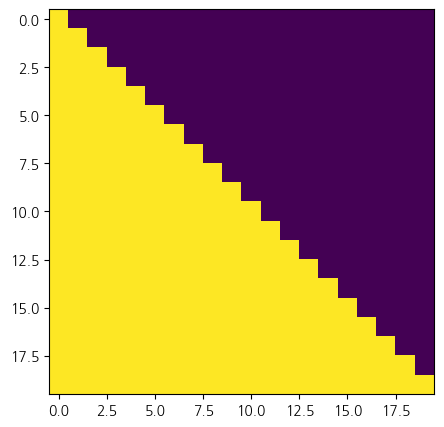

In [ ]:
plt.figure(figsize=(5,5))

sub_mask = subsequent_mask(20)
print(sub_mask.shape)
plt.imshow(sub_mask[0])

### DecoderLayerÏôÄ Decoder

`DecoderLayer`ÏôÄ `Decoder`Ïùò Íµ¨ÏÑ±ÏùÄ Ïù∏ÏΩîÎçîÏôÄ ÎèôÏùºÌï©ÎãàÎã§. ÌïúÍ∞ÄÏßÄ Îã§Î•∏ Ï†êÏùÄ `DecoderLayer`ÏóêÎäî Ïñ¥ÌÖêÏÖòÏù¥ Îëê Í∞ú ÏûàÎã§Îäî Ï†êÏûÖÎãàÎã§. `forward()`Ìï®ÏàòÎ•º Î≥¥Î©¥ Ïïå Ïàò ÏûàÎìØÏù¥ ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖòÍ≥º Ïù∏ÏΩîÎçî, ÎîîÏΩîÎçî Í∞ÑÏùò ÌÅ¨Î°úÏä§ Ïñ¥ÌÖêÏÖòÏûÖÎãàÎã§. 


In [ ]:
class DecoderLayer(nn.Module):
    "Decoder is made of self-attn, src-attn, and feed forward (defined below)"
    def __init__(self, size, self_attn, src_attn, feed_forward, dropout):
        # self_attn: MultiHeadedAttention
        # src_attn: MultiHeadedAttention

        super(DecoderLayer, self).__init__()
        self.size = size
        self.self_attn = self_attn
        self.src_attn = src_attn # cross attention
        self.feed_forward = feed_forward # positional ff
        self.sublayer = clones(SublayerConnection(size, dropout), 3)
 
    def forward(self, x, memory, src_mask, tgt_mask):
        "Follow Figure 1 (right) for connections."
        # Ïó¨Í∏∞ÏÑú momoryÎäî Ïù∏ÏΩîÎçîÎ°ú Î∂ÄÌÑ∞ ÎÑòÏñ¥Ïò® Ïù∏ÏΩîÎî© (nbatche, n_seq, d_model)
        m = memory
        x = self.sublayer[0](x, lambda x: self.self_attn(x, x, x, tgt_mask))
        
        # ÌÅ¨Î°úÏä§ Ïñ¥ÌÖêÏÖò Ìï† Îïå ÎßàÏä§ÌÅ¨Îäî src_mask(key_pad_mask)Î•º Ï†ÑÎã¨Ìï®!
        # Ïù¥Î†áÍ≤å ÌïòÎ©¥ ÏûÖÎ†•Ïóê Ï°¥Ïû¨ÌïòÎäî Ìå®Îî© ÌÜ†ÌÅ∞Ïù¥ ÏøºÎ¶¨Î°úÏç® Ïù∏ÏΩîÎî©ÎêòÏñ¥ Ïò® Í≤ÉÏùÑ 
        # key Ìå®Îî©ÏúºÎ°ú ÎßàÏä§ÌÇπ Ìï† Ïàò ÏûàÍ≤å ÎêúÎã§.
        # (Ïù∏ÏΩîÎçî Ï∂úÎ†•Ïù¥ Ïù¥Ï†úÎäî keyÎ°ú ÏûëÏö©ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê!!!)
        x = self.sublayer[1](x, lambda x: self.src_attn(x, m, m, src_mask))
        
        return self.sublayer[2](x, self.feed_forward)

ÌÅ¨Î°úÏä§ Ïñ¥ÌÖêÏÖòÎ•º Ïã§ÌñâÌïòÎäî ÏΩîÎìúÎ•º Î≥¥Î©¥ 

```python
# x: ÎîîÏΩîÎçîÏóêÏÑú ÎßåÎì† (n_seq, d_mode) ÌÖêÏÑú (Ïó¨Í∏∞ÏÑú n_seqÎäî ÎîîÏΩîÎçîÎ°ú ÏûÖÎ†•ÎêòÎäî ÏãúÌÄÄÏä§Ïùò Í∏∏Ïù¥)
# m: Ïù∏ÏΩîÎçîÏóêÏÑú Ï†ÑÎã¨Î∞õÏùÄ (n_seq, d_model) ÌÖêÏÑú (Ïó¨Í∏∞ÏÑú n_seqÎäî Ïù∏ÏΩîÎçîÎ°ú ÏûÖÎ†•Îêú ÏãúÌÄÄÏä§Ïùò Í∏∏Ïù¥)
x = self.sublayer[1](x, lambda x: self.src_attn(x, m, m, src_mask))
```

ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖòÍ≥º Ï∞®Ïù¥Îäî ÏøºÎ¶¨Î°ú ÎîîÏΩîÎçîÏùò ÏûÖÎ†•Ïù¥ Ïù∏ÏΩîÎî©Îêú Í≤ÉÏùÑ ÎÑòÍ∏∞Í≥† ÌÇ§ÏôÄ Î≤®Î•òÎäî Ïù∏ÏΩîÎçîÏóêÏÑú ÏûÖÎ†•Î∞õÎäî Ïù∏ÏΩîÎî© Ï†ïÎ≥¥Î•º ÎÑòÍ∏¥Îã§Îäî Í≤ÉÏûÖÎãàÎã§. Ïù¥Î†áÍ≤å Ìï¥Ïïº ÌÅ¨Î°úÏä§ Ïñ¥ÌÖêÏÖòÏù¥ Í≥ÑÏÇ∞ÎêòÍ≤†Ï£†. Îòê ÎßàÏä§ÌÅ¨Îäî `src_mask`Î•º ÎÑòÍ∏∞Í≥† ÏûàÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§. 

ÏïÑÎûòÎäî `Decoder` ÏΩîÎìúÏù¥Í≥† ÌäπÎ≥ÑÌûà Ïñ∏Í∏âÌï† Ï†êÏùÄ ÏóÜÏäµÎãàÎã§.

In [ ]:
class Decoder(nn.Module):
    "Generic N layer decoder with masking."
    def __init__(self, layer, N):
        # layer: DecoderLayer

        super(Decoder, self).__init__()
        self.layers = clones(layer, N)
        self.norm = LayerNorm(layer.size)
        
    def forward(self, x, memory, src_mask, tgt_mask):
        for layer in self.layers:
            x = layer(x, memory, src_mask, tgt_mask)
        
        # EncoderÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú norm ÏïàÌï®
        # return self.norm(x)
        return x

### ÎîîÏΩîÎçî ÎÅùÏóê Î∂ôÎäî ÎßàÏßÄÎßâ Linear Î†àÏù¥Ïñ¥

ÎîîÏΩîÎçîÏùò Ï∂úÎ†•ÏùÑ Î∞õÏïÑÏÑú ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú $(n_{\text{seq}}, d_{\text{model}})$ÏùÑ $(n_{\text{seq}}, \text{vocab})$Î°ú Î≥ÄÌôòÌïòÎäî ÌîºÎìú Ìè¨ÏõåÎìú Î†àÏù¥Ïñ¥Î•º Ï∂îÍ∞ÄÌï©ÎãàÎã§.

In [ ]:
class Generator(nn.Module):
    "Define standard linear + softmax generation step."
    def __init__(self, d_model, vocab):
        super(Generator, self).__init__()
        self.proj = nn.Linear(d_model, vocab)

    def forward(self, x):
        return F.log_softmax(self.proj(x), dim=-1)

## Transformer

Ïù¥ÏÉÅÏóêÏÑú ÎßåÎì† Î∂ÄÌíàÎì§Î°ú Ìä∏ÎûúÏä§Ìè¨Î®∏Î•º Ï°∞Î¶ΩÌï©ÎãàÎã§. `Encoder`, `Decoder`Î•º Î∞õÏïÑÏÑú Ï†ÑÏ≤¥ Î™®Îç∏ÏùÑ ÏÉùÏÑ±ÌïòÎäî `EncoderDecoder` ÌÅ¥ÎûòÏä§Î•º Ï†ïÏùòÌïòÍ≥† Ïù¥Í≤ÉÏùÑ Í∞ùÏ≤¥Î°ú ÏÉùÏÑ±ÌïòÎäî `make_model()` Ìï®ÏàòÎ•º Ï†ïÏùòÌï©ÎãàÎã§.

ÏïÑÎûò Í∑∏Î¶ºÏùÄ `make_model()` Ìï®ÏàòÍ∞Ä Ï°∞Î¶ΩÌïòÎäî Ï†ÑÏ≤¥ Íµ¨Ï°∞Î•º Ï£ºÏÑùÍ≥º Ìï®Íªò ÎÇòÌÉÄÎÇ∏ Í≤ÉÏûÖÎãàÎã§.

In [ ]:
class EncoderDecoder(nn.Module):
    """
    A standard Encoder-Decoder architecture. Base for this and many 
    other models.
    """
    def __init__(self, encoder, decoder, src_embed, tgt_embed, generator):
        super(EncoderDecoder, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.src_embed = src_embed # Ïù∏ÏΩîÎçîÏùò ÏûÑÎ≤†Îî©-ÏúÑÏπòÏù∏ÏΩîÎî©
        self.tgt_embed = tgt_embed # ÎîîÏΩîÎçîÏùò ÏûÑÎ≤†Îî©-ÏúÑÏπòÏù∏ÏΩîÎî©
        self.generator = generator

    # Ïù¥ Ìï®ÏàòÍ∞Ä Î™®Îç∏Ïù¥ Ìè¨ÏõåÎìú ÎêòÎäî ÏóîÌä∏Î¶¨ Ìè¨Ïù∏Ìä∏!!!    
    def forward(self, src, tgt, src_mask, tgt_mask):
        "Take in and process masked src and target sequences."
        return self.decode(
            self.encode(src, src_mask), src_mask,
            tgt, tgt_mask
        )
    
    def encode(self, src, src_mask):
        return self.encoder(self.src_embed(src), src_mask)
    
    def decode(self, memory, src_mask, tgt, tgt_mask):
        return self.decoder(self.tgt_embed(tgt), memory, src_mask, tgt_mask)

ÎßàÏßÄÎßâÏúºÎ°ú `Encoder`ÏôÄ `Decoder`Î•º ÌïúÎ≤à Îçî Í∞êÏã∏ÏÑú `EncoderDecoder` ÌÅ¥ÎûòÏä§Î•º ÎßåÎì≠ÎãàÎã§. Ïù¥ ÌÅ¥ÎûòÏä§Ïùò `forward`Ìï®ÏàòÍ∞Ä Î™®Îç∏ÏùÑ Ìè¨ÏõåÎìúÏãúÌÇ§Îäî ÏóîÌä∏Î¶¨ Ìè¨Ïù∏Ìä∏Í∞Ä Îê©ÎãàÎã§.

In [ ]:
def make_model(src_vocab, tgt_vocab, N=6, 
               d_model=512, d_ff=2048, h=8, dropout=0.1):
    """
        Helper: Construct a model from hyperparameters.
        src_vocab: ÏûÖÎ†•ÏùÑ ÏûÑÎ≤†Îî©Ìï† Îïå ÏÇ¨Ïö©ÌïòÎäî Îã®Ïñ¥Ïû• ÏÇ¨Ïù¥Ï¶à
        tgt_vocab: Ï∂úÎ†•ÏùÑ ÏúÑÌïú Ï∂úÎ†•Ï™Ω Îã®Ïñ¥Ïû• ÏÇ¨Ïù¥Ï¶à
        d_mode: Ìä∏ÎûúÏä§Ìè¨Î®∏ Ïù∏ÏΩîÎçî ÎîîÏΩîÎçîÏóêÏÑú ÏÇ¨Ïö©ÎêòÎäî Î≤°ÌÑ∞Ïùò ÌÅ¨Í∏∞
        d_ff: feed fowardÏ∏µÏù¥ Ï∂úÎ†•ÌïòÎäî Î≤°ÌÑ∞Ïùò ÌÅ¨Í∏∞
    """
    c = copy.deepcopy
    attn = MultiHeadedAttention(h, d_model)
    ff = PositionwiseFeedForward(d_model, d_ff, dropout)
    position = PositionalEncoding(d_model, dropout)
    model = EncoderDecoder(
        # Ïù∏ÏΩîÎçîÎ•º ÎßåÎì§Í∏∞ ÏúÑÌï¥ Ïñ¥ÌÖêÏÑ† Î†àÏù¥Ïñ¥ ÌïòÎÇòÏôÄ ÌîºÎìúÌè¨ÏõåÎìú Î†àÏù¥Ïñ¥ ÌïòÎÇòÍ∞Ä ÌïÑÏöîÌï©ÎãàÎã§.
        Encoder(EncoderLayer(d_model, c(attn), c(ff), dropout), N),
        
        # ÎîîÏΩîÎçîÎ•º ÎßåÎì§Í∏∞ ÏúÑÌï¥ Ïñ¥ÌÖêÏÖò Î†àÏù¥Ïñ¥ ÎëêÍ∞úÏôÄ ÌîºÎìúÌè¨ÏõåÎìú Î†àÏù¥Ïñ¥ ÌïòÎÇòÍ∞Ä ÌïÑÏöîÌï©ÎãàÎã§.
        # Îëê Ïñ¥ÌÖêÏÖò Î†àÏù¥Ïñ¥ Ï§ë ÌïòÎÇòÎäî ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖòÏùÑ Îã¥ÎãπÌïòÍ≥† ÌïòÎÇòÎäî ÌÅ¨Î°úÏä§ Ïñ¥ÌÖêÏÖòÏùÑ Îã¥ÎãπÌï©ÎãàÎã§.
        Decoder(DecoderLayer(d_model, c(attn), c(attn), 
                             c(ff), dropout), N),

        # Ïù∏ÏΩîÎçîÏôÄ ÎîîÏΩîÎçî Ï™Ω ÏûÑÎ≤†Îî©ÏúºÎ°ú ÏßÅÏ†ë ÎßåÎì† ÌÜ†ÌÅ∞ ÏûÑÎ≤†Îî©Í≥º
        # Ìè¨ÏßÄÏÖò Ïù∏ÏΩîÎî©ÏùÑ ÏàúÏ∞®Ï†ÅÏúºÎ°ú ÏàòÌñâÌïòÎäî nn.Sequential                   
        nn.Sequential(Embeddings(d_model, src_vocab), c(position)),
        nn.Sequential(Embeddings(d_model, tgt_vocab), c(position)),

        Generator(d_model, tgt_vocab))
    
    # This was important from their code. 
    # Initialize parameters with Glorot / fan_avg.
    for p in model.parameters():
        if p.dim() > 1:
            # nn.init.xavier_uniform(p)
            nn.init.xavier_uniform_(p)
    return model

In [ ]:
# Î¨¥ÏÜåÏãùÏù¥ Ìù¨ÏÜåÏãù! ÏïÑÎ¨¥ ÏóêÎü¨ÏóÜÏù¥ Ïã§ÌñâÎêòÎ©¥ OK
tmp_model = make_model(10, 10, 2)

## Ïã§ÌóòÏö© Îç∞Ïù¥ÌÑ∞ÏôÄ Î≥¥Ï°∞ ÏΩîÎìú Ï§ÄÎπÑ

Ïù¥Î†áÍ≤å Î™®Îç∏Ïóê ÎåÄÌïú ÏΩîÎî©ÏùÑ Î™®Îëê ÎßàÏ≥§Í≥† Ïù¥Ï†ú Í∞ÑÎã®Ìïú Ïã§ÌóòÏùÑ ÏúÑÌïú ÏΩîÎìúÎ•º ÏïåÏïÑÎ≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§. Î®ºÏ†Ä `Batch`ÌÅ¥ÎûòÏä§ÏûÖÎãàÎã§.

In [ ]:
class Batch:
    "Object for holding a batch of data with mask during training."
    def __init__(self, src, trg=None, pad=0):
        # src: (nbatches, n_seq_src)
        self.src = src
        self.src_mask = (src != pad).unsqueeze(-2) # (nbatches, 1, n_seq_src)
        if trg is not None:
            self.trg = trg[:, :-1]
            self.trg_y = trg[:, 1:]
            self.trg_mask = self.make_std_mask(self.trg, pad) # (nbatches, n_seq_trg, n_seq_trg)
            self.ntokens = (self.trg_y != pad).data.sum() # Ìå®Îî© ÌÜ†ÌÅ∞Ïù¥ ÏïÑÎãå ÌÜ†ÌÅ∞ Ïàò
    
    @staticmethod
    def make_std_mask(tgt, pad):
        "Create a mask to hide padding and future words."
        tgt_mask = (tgt != pad).unsqueeze(-2) # (nbatches, 1, n_seq_trg)
        #tgt_mask = tgt_mask & Variable( subsequent_mask(tgt.size(-1)).type_as(tgt_mask.data) )
        tgt_mask = tgt_mask & subsequent_mask(tgt.size(-1)).type_as(tgt_mask.data)
        return tgt_mask

`Batch`ÌÅ¥ÎûòÏä§Îäî ÏûÖÎ†• ÏãúÌÄÄÏä§ÏôÄ ÌÉÄÍ≤ü ÏãúÌÄÄÏä§Î•º Î∞õÏïÑÏÑú ÏûÖÎ†•Í≥º ÌÉÄÍ≤üÏùò ÎßàÏä§ÌÅ¨Î•º ÎßåÎì§Í≥† ÌÉÄÍ≤üÏùÑ ÎîîÏΩîÎçîÏóê ÏûÖÎ†•ÎêòÎäî ÌÉÄÍ≤ü(`self.trg`)Í≥º Ï∂úÎ†• ÌÉÄÍ≤ü(`self.trg_y`)ÏúºÎ°ú Î∂ÑÎ¶¨Ìï©ÎãàÎã§. ÏòàÎ•º Îì§Î©¥ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.

- `src`: `I` `am` `a` `student.`

- `trg`: `ÎÇòÎäî` `ÌïôÏÉù` `ÏûÖÎãàÎã§.`

    - `trg`: `ÎÇòÎäî` `ÌïôÏÉù`
    - `trg_y`: `ÌïôÏÉù` `ÏûÖÎãàÎã§.`

Îã§ÏùåÏúºÎ°ú ÎßàÏä§ÌÅ¨Î•º ÎßåÎì§Í≤å ÎêòÎäîÎç∞ ÎßàÏä§ÌÅ¨Î•º ÎßåÎìúÎäî Í≥ºÏ†ï(`make_std_mask` Ìï®Ïàò)ÏùÄ ÏΩîÎìúÎßå Î¥êÏÑúÎäî Ïù¥Ìï¥Í∞Ä Ïñ¥Î†§Ïö∞ÎØÄÎ°ú Îã§Ïùå ÏòàÎ•º Î≥¥Î©¥ÏÑú ÏïåÏïÑÎ≥¥Í≤†ÏäµÎãàÎã§. 

### Source mask (key pad mask)

Î®ºÏ†Ä source maskÏóê ÎåÄÌï¥ÏÑú ÏïåÏïÑÎ¥ÖÏãúÎã§. ÏïÑÎûò ÏòàÏóêÏÑúÎäî ÏãúÌÄÄÏä§ Í∏∏Ïù¥ 5Ïù∏ ÏÉòÌîå Îëê Í∞úÍ∞Ä (2,5)Ïù∏ ÌñâÎ†¨Ïóê Îì§Ïñ¥ÏûàÎäî ÏÉÅÌô©ÏûÖÎãàÎã§.

ÏòàÎ•º Îì§Ïñ¥ Í∞Å ÏÉòÌîåÏù¥ Îã§ÏùåÍ≥º Í∞ôÎã§Í≥† ÌïòÍ≤†ÏäµÎãàÎã§.

*   `i,     love,  you,   [PAD],  [PAD]`
*   `good,  job,  [PAD],  [PAD],  [PAD]`

Ïù¥Î†áÍ≤å Íµ¨ÏÑ±Îêú ÏÉòÌîåÏóê ÏÖÄÌîÑÏñ¥ÌÖêÏÖòÏùÑ ÌïòÎäî Í≤ΩÏö∞ [PAD] ÌÜ†ÌÅ∞ÏóêÎäî Ïñ¥ÌÖêÏÖòÏù¥ ÎêòÎ©¥ ÏïàÎê† Í≤ÉÏûÖÎãàÎã§. ÏòàÎ•º Îì§Ïñ¥ 'i'ÏôÄ Í¥ÄÍ≥ÑÍ∞Ä ÏûàÎäî ÌÜ†ÌÅ∞ÏùÑ ÏïåÏïÑÎÇ¥Îäî Í≤ÉÏù¥ ÏÖÄÌîÑÏñ¥ÌÖêÏÖòÏù∏Îç∞ Í∑∏ ÌõÑÎ≥¥ ÌÇ§ ÌÜ†ÌÅ∞Ïóê [PAD]Í∞Ä Îì§Ïñ¥Í∞ÄÎäî Í≤ÉÏùÄ Î≥ÑÎ°ú Î∞îÎûåÏßÅÌïòÏßÄ ÏïäÏäµÎãàÎã§. Î¨ºÎ°† [PAD]Í∞Ä ÏøºÎ¶¨Î°ú ÏûëÎèôÌïòÎäî Í≤ÉÎèÑ ÌîºÌï¥Ïïº Ìï©ÎãàÎã§.Îî∞ÎùºÏÑú [PAD] Í∞Ä ÏûàÎäî ÏúÑÏπòÎ•º ÎßàÏä§ÌÇπÌï† Ïàò ÏûàÎäî ÎßàÏä§ÌÅ¨Î•º ÎßåÎì§Ïñ¥Ïïº Ìï©ÎãàÎã§. 

ÎßàÏä§ÌÅ¨Î•º ÎßåÎì§Í≥† Ïù¥Î•º ÏßÅÏ†ë Í∑∏Î¶ºÏúºÎ°ú Î≥¥Ïù¥Îäî Í≤ÉÏùÄ Í≤ÉÏùÄ Ìä∏ÎûúÏä§Ìè¨Î®∏ Î™®Îç∏ÏùÑ Ïã§Ï†úÎ°ú Ìè¨ÏõåÎìú ÏãúÏºúÏïº ÌïòÎäî Í≥ºÏ†ïÏùÑ Í±∞Ï≥êÏïº Ìï¥ÏÑú Îß§Ïö∞ Í∑ÄÏ∞ÆÏùÄ ÏûëÏóÖÏù¥ÏßÄÎßå ÌïòÎÇò ÌïòÎÇò Îî∞Îùº Í∞ÄÎ≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.üòµ

Îã® Î¨∏Ï†úÎ•º Îã®ÏàúÌôî ÌïòÍ≥† Í∑∏Î¶ºÏùÑ Í∑∏Î¶¨Í∏∞ ÏúÑÌï¥ Ìó§Îìú ÌïòÎÇòÎ•º Í∞ÄÏ†ïÌï©ÎãàÎã§. 
Ïö∞ÏÑ† Î™®Îç∏Í≥º Í¥ÄÎ†®Îêú Î≥ÄÏàòÎ•º Ï†ÅÎãπÌûà ÏÑ∏ÌåÖÌï©ÎãàÎã§.

In [ ]:
model_const = {'dv':3, 'dk':3, 'h':1, 'd_model':7, 'src_len':5, 'target_len':6}

In [ ]:
pad = 0
# Í∏∏Ïù¥ 7Ïù∏ ÏÉòÌîå Îëê Í∞ú, src:(2,5)
# 1Î≤à ÏÉòÌîåÏùÄ Í∏∏Ïù¥ 5, Ìå®Îî© 2, ÏòàÎ•º Îì§Ïñ¥ i     love  you   [PAD]  [PAD]  
# 2Î≤à ÏÉòÌîåÏùÄ Í∏∏Ïù¥ 2, Ìå®Îî© 3, ÏòàÎ•º Îì§Ïñ¥ good  job  [PAD]  [PAD]  [PAD]
# ÏûÑÏùò Ïà´ÏûêÎ•º ÌÜ†ÌÅ∞ Î≤àÌò∏Î°ú Í∞ÄÏ†ïÌïòÍ≥† randintÎ•º ÏÇ¨Ïö©
src = torch.from_numpy(np.random.randint(1, 100, size=(2, model_const['src_len'])))
paddings = torch.LongTensor([2, 3]).reshape(-1,1) # Í∞Å ÏÉòÌîåÎãπ Ìå®Îî© Í∞úÏàò
pad_idx = src.shape[1] - paddings
col_idx = torch.arange(src.shape[1]).reshape(1,-1)
# src = src * ~(paddings > col_idx)
src = src * (pad_idx > col_idx)

# ÎßàÏßÄÎßâ ÌÜ†ÌÅ∞Îì§ÏùÄ PADÌÜ†ÌÅ∞Ïù¥ ÎêòÏóàÏùå
print('src', src, '\n')

src tensor([[86, 38, 95,  0,  0],
        [89, 30,  0,  0,  0]]) 



Ïù¥Î†áÍ≤å Í∞ÄÏÉÅÏúºÎ°ú ÎßåÎì§Ïñ¥ÏßÑ srcÏóêÏÑú 0Ïù∏ ÏûêÎ¶¨Î•º `False`, 0Ïù¥ ÏïÑÎãå ÏûêÎ¶¨Î•º `True`Î°ú Í∞ÄÏßÄÎäî ÎßàÏä§ÌÅ¨Î•º ÏÉùÏÑ±Ìï©ÎãàÎã§.

In [ ]:
# (src != pad): (2,5)
# Ìå®Îî© ÌÜ†ÌÅ∞ÏûêÎ¶¨Îßå FalseÏù∏ srcÏôÄ Î™®ÏñëÏù¥ Í∞ôÏùÄ ÎßàÏä§ÌÅ¨
print('\n(src != pad).shape', (src != pad).shape)
print(src != pad, '\n')


(src != pad).shape torch.Size([2, 5])
tensor([[ True,  True,  True, False, False],
        [ True,  True, False, False, False]]) 



Ïù¥Ï†ú Î©ÄÌã∞Ìó§Îìú Ïñ¥ÌÖêÏÖòÏóê ÎßàÏä§ÌÅ¨Î•º Ï†ÅÏö©ÌïòÍ∏∞ ÏúÑÌï¥ Ï§ëÍ∞Ñ Ï∞®ÏõêÏùÑ ÌïòÎÇò Îçî ÎäòÎ¶ΩÎãàÎã§.

In [ ]:
src_mask_enc = (src != pad).unsqueeze(-2)
print('\n(src != pad).unsqueeze(-2).shape:', src_mask_enc.shape)
print(src_mask_enc)


(src != pad).unsqueeze(-2).shape: torch.Size([2, 1, 5])
tensor([[[ True,  True,  True, False, False]],

        [[ True,  True, False, False, False]]])


Í≤∞Í≥ºÎäî (2,5)Ïù∏ ÎßàÏä§ÌÅ¨Í∞Ä (2,1,5)Í∞Ä ÎêòÎäîÎç∞ ÎßàÏä§ÌÅ¨Í∞Ä Ï†ÅÏö©Îê† ÏãúÏ†êÏùò ÏΩîÎìúÎ•º Îã§ÏãúÎ≥¥Î©¥ 

```python
# MultiHeadedAttention.forward()ÏóêÏÑú
    # Same mask applied to all h heads.
    mask = mask.unsqueeze(1)
    ...
    x, self.attn = attention(query, key, value, mask=mask, 
                                 dropout=self.dropout)

# attention()ÏóêÏÑú
    # scores: (nbatches, h, n_seq, n_seq)
    if mask is not None:
        scores = scores.masked_fill(mask == 0, -1e9)
```

ÏúÑ ÏΩîÎìúÏóêÏÑú `MultiHeadedAttention.forward()`Î•º Í±∞ÏπòÎ©¥ÏÑú Ï†ÑÎã¨Îêú `src_mask`Îäî (2,1,5)Í∞Ä (2,1,1,5)Î°ú ÎêòÎ©∞ Ïù¥Î•º `(nbatches, h, n_seq, n_seq)`Ïù∏ `score`Ïóê Ï†ÅÏö©ÌïòÎ©¥ Í≤∞Íµ≠ hÍ∞ú Ìó§ÎìúÏóê Ìñâ Î∞©Ìñ•ÏúºÎ°úÎßå ÎßàÏä§ÌÅ¨Í∞Ä Ï£ºÏñ¥ÏßÄÍ≤å Îê©ÎãàÎã§. 

ÎßàÏä§ÌÇπÏùÑ Ìï¥ÏÑú Í∑∏Î¶ºÏùÑ Í∑∏Î†§Î≥¥Î©¥

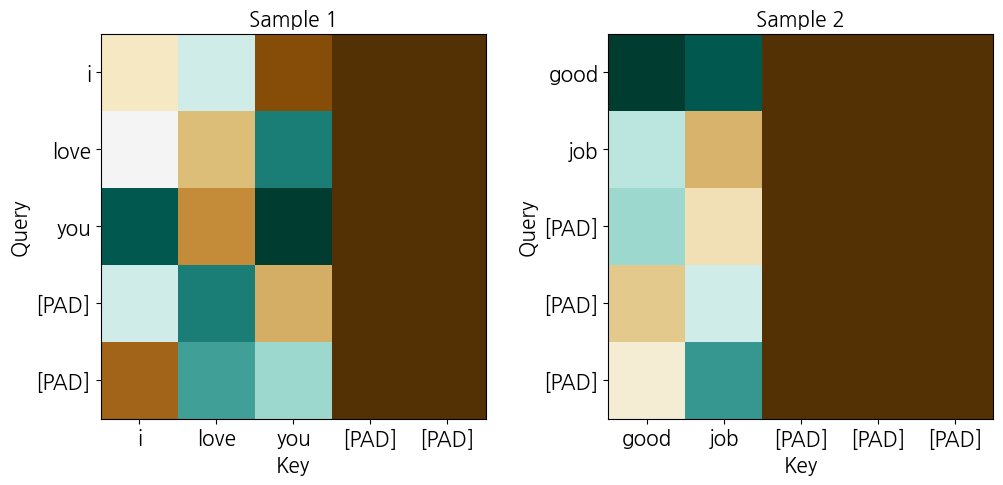

tensor([[[[0.3935, 0.5685, 0.0896, 0.0000, 0.0000],
          [0.4945, 0.2905, 0.8362, 0.0000, 0.0000],
          [0.9139, 0.2138, 0.9821, 0.0000, 0.0000],
          [0.5684, 0.8328, 0.2671, 0.0000, 0.0000],
          [0.1406, 0.7698, 0.6470, 0.0000, 0.0000]]],


        [[[0.8680, 0.8078, 0.0000, 0.0000, 0.0000],
          [0.5331, 0.2438, 0.0000, 0.0000, 0.0000],
          [0.5725, 0.3306, 0.0000, 0.0000, 0.0000],
          [0.2783, 0.5039, 0.0000, 0.0000, 0.0000],
          [0.3772, 0.6935, 0.0000, 0.0000, 0.0000]]]])


In [ ]:
# ÏÉòÌîå ÎëêÍ∞ú Ìó§Îìú ÌïòÎÇòÏßúÎ¶¨ (5,5)Ïù∏ Ïñ¥ÌÖêÏÖò Ïä§ÏΩîÏñ¥
encoder_self_attn_scores = torch.rand((2, 1, model_const['src_len'], 
                                       model_const['src_len']))
src_mask_enc_reshape = src_mask_enc.unsqueeze(1)

# -1e9Î°ú ÎßàÏä§ÌÇπÏùÑ ÌïòÎ©¥ ÎßàÏä§ÌÇπ ÎêòÏßÄ ÏïäÎäî Î∂ÄÎ∂ÑÏù¥ Î™®Îëê Í∞ôÏùÄ ÏÉâÏúºÎ°ú 
# ÎÇòÌÉÄÎÇòÎØÄÎ°ú Ïó¨Í∏∞ÏÑúÎäî Í∑∏ÎÉ• 0ÏúºÎ°ú ÎßàÏä§ÌÇπ
masked_encoder_self_attn_scores = encoder_self_attn_scores.masked_fill(
    src_mask_enc_reshape == 0, 0)

fig, ax = plt.subplots(figsize=(12,5), nrows=1, ncols=2)

ax[0].imshow(masked_encoder_self_attn_scores[0][0], cmap='BrBG')
ax[0].set_xticks([0, 1, 2, 3, 4])
ax[0].set_xticklabels(['i', 'love', 'you', '[PAD]', '[PAD]'], fontsize=15)
ax[0].set_xlabel('Key', fontsize=15)
ax[0].set_yticks([0, 1, 2, 3, 4])
ax[0].set_yticklabels(['i', 'love', 'you', '[PAD]', '[PAD]'], fontsize=15)
ax[0].set_ylabel('Query', fontsize=15)
ax[0].set_title('Sample 1', fontsize=15)

ax[1].imshow(masked_encoder_self_attn_scores[1][0], cmap='BrBG')
ax[1].set_xticks([0, 1, 2, 3, 4])
ax[1].set_xticklabels(['good', 'job', '[PAD]', '[PAD]', '[PAD]'], fontsize=15)
ax[1].set_xlabel('Key', fontsize=15)
ax[1].set_yticks([0, 1, 2, 3, 4])
ax[1].set_yticklabels(['good', 'job', '[PAD]', '[PAD]', '[PAD]'], fontsize=15)
ax[1].set_ylabel('Query', fontsize=15)
ax[1].set_title('Sample 2', fontsize=15)

plt.show()

print(masked_encoder_self_attn_scores)

[PAD]Ïóê Ìï¥ÎãπÌïòÎäî Ïó¥Îßå ÎßàÏä§ÌÇπÎêòÏóàÏäµÎãàÎã§. Ïñ¥ÌÖêÏÖò Ïä§ÏΩîÏñ¥ ÌñâÎ†¨ÏóêÏÑú ÌñâÏùÄ ÏøºÎ¶¨Ïóê, Ïó¥ÏùÄ ÌÇ§Ïóê Ìï¥ÎãπÌïòÎäîÎç∞ Ïù¥Î†áÍ≤å ÎßàÏä§ÌÇπÎêòÎäî Í≤ÉÏùÄ Í≤∞Íµ≠ ÌÇ§Îßå ÎßàÏä§ÌÇπ ÌñàÎã§Îäî ÏùòÎØ∏ÏûÖÎãàÎã§. Îã§ÏãúÎßêÌï¥  i, love, you, [PAD], [PAD]ÎùºÎäî Îã®Ïñ¥ Îã§ÏÑØÍ∞úÎ•º ÏøºÎ¶¨Î°ú ÏöîÏ≤≠ÌïòÏòÄÍ≥† Í∑∏Ïóê ÎåÄÌïú ÏùëÎãµÏúºÎ°ú [PAD] ÎëêÍ∞úÎäî ÎßàÏä§ÌÇπÌïòÍ≥† i, love, youÎßå ÌÇ§Í∞Ä ÎêòÏñ¥ ÏöîÏ≤≠Îêú ÏøºÎ¶¨ÏôÄ Í∞ÄÏ§ëÏπòÍ∞Ä Í≥ÑÏÇ∞Îêú Í≤ÉÏûÖÎãàÎã§.

Ïñ¥Ï∞®Ìîº ÌïÑÏöîÏóÜÎäî [PAD]Î•º Ïôú ÏøºÎ¶¨Î°ú ÏöîÏ≤≠ÌñàÎäîÏßÄ Ïù¥ÏÉÅÌï† Ïàò ÏûàÏäµÎãàÎã§. Í∑∏ Ïù¥Ïú†Îäî Ïù¥Î†áÍ≤å ÌÇ§Îßå ÎßàÏä§ÌÇπÎêú Ïù∏ÏΩîÎî© Ï†ïÎ≥¥Í∞Ä ÎîîÏΩîÎçîÎ°ú ÎÑòÏñ¥Í∞Ä ÌÅ¨Î°úÏä§ Ïñ¥ÌÖêÏÖòÎê† ÎïåÎäî Îã§Ïãú ÌÇ§Î°ú ÏûëÏö©ÌïòÍ≤å ÎêòÎäîÎç∞ Í∑∏Îïå ÌÇ§Í∞Ä $K^T$Î°ú Ï†ÑÏπò ÎêòÎ©¥ÏÑú Îã§Ïãú ÌïúÎ≤à ÎßàÏä§ÌÇπÏùÑ Ï†ÅÏö©ÌïòÎ©¥ ÎßàÏä§ÌÇπ ÎêòÏßÄ ÏïäÏïòÎçò ÏøºÎ¶¨Ïóê ÎåÄÌïú [PAD]ÎèÑ ÎßàÏä§ÌÇπÎêòÏñ¥ ÏÇ¨ÎùºÏßÄÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§. 

Ïù¥Îü∞ Ïù¥Ïú† ÎïåÎ¨∏Ïóê Ïù¥ ÏÜåÏä§ÏΩîÎìúÏóêÏÑú `src_mask`Í∞Ä PyTorchÏóêÏÑúÎäî `key_padding_mask`ÎùºÎäî Ïù¥Î¶ÑÏúºÎ°ú Ï†úÍ≥µÎê©ÎãàÎã§.

> key_padding_mask: If specified, a mask of shape (N,S) indicating which elements within key to ignore for the purpose of attention (i.e. treat as  padding‚Äù). 

### Target mask

Îã§ÏùåÏùÄ ÌÉÄÍ≤üÏ™Ω ÎßàÏä§ÌÅ¨Î•º ÏïåÏïÑÎ≥¥Í≤†ÏäµÎãàÎã§. ÌÉÄÍ≤ü ÎßàÏä§ÌÅ¨ÎèÑ Î®ºÏ†Ä [PAD] ÏúÑÏπòÎ•º ÎßàÏä§ÌÇπ Ìï©ÎãàÎã§. Ïù¥ Í≥ºÏ†ïÏùÄ ÏïûÏÑú ÏïåÏïÑÎ≥∏ `src_mask`ÏôÄ ÎèôÏùºÌï©ÎãàÎã§. ÌÉÄÍ≤ü Îç∞Ïù¥ÌÑ∞Îäî ÏÜåÏä§Í∞Ä Î≤àÏó≠Îêú Îã§Ïùå Î¨∏Ïû•ÏúºÎ°ú Í∞ÄÏ†ïÌï©ÎãàÎã§.


*   `ÎÇòÎäî,  ÎãπÏã†ÏùÑ,  ÏÇ¨Îûë,   Ìï©ÎãàÎã§, [PAD], [PAD], [PAD]`
*   `Ïûò,    ÌñàÏñ¥,    [PAD],  [PAD],  [PAD], [PAD], [PAD]`

In [ ]:
# ÎîîÏΩîÎçîÏóê ÏûÖÎ†•Îê† ÌÉÄÍ≤üÏùÑ Ï§ÄÎπÑÌïúÎã§. 
# shape: (2,6)
# ÏûÑÏùò Ïà´ÏûêÎ•º ÌÜ†ÌÅ∞ Î≤àÌò∏Î°ú Í∞ÄÏ†ïÌïòÍ≥† randintÎ•º ÏÇ¨Ïö©
trg = torch.from_numpy(np.random.randint(1, 100, size=(2, model_const['target_len'])))
paddings = torch.LongTensor([2, 4]).reshape(-1,1) # Í∞Å ÏÉòÌîåÎãπ Ìå®Îî© Í∞úÏàò
pad_idx = trg.shape[1] - paddings
col_idx = torch.arange(trg.shape[1]).reshape(1,-1)
# src = src * ~(paddings > col_idx)
trg = trg * (pad_idx > col_idx)

# ÎßàÏßÄÎßâ ÌÜ†ÌÅ∞Îì§ÏùÄ PADÌÜ†ÌÅ∞Ïù¥ ÎêòÏóàÏùå
print('trg', trg, '\n')

# srcÎïåÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú Ìå®Îî© ÌÜ†ÌÅ∞ÏûêÎ¶¨Îßå FalseÏù∏ trgÏôÄ Î™®ÏñëÏù¥ Í∞ôÏùÄ ÎßàÏä§ÌÅ¨
# shape: (2,6)
print('(trg != pad).shape', (trg != pad).shape)
print(trg != pad, '\n')

# src_maskÎïåÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú Ï∞®ÏõêÏùÑ ÎäòÎ¶∞Îã§.
# subsequent_mask()ÏóêÏÑú Ï∂úÎ†•Îêú ÎßàÏä§ÌÅ¨ÏôÄ Î∏åÎ°úÎìúÏ∫êÏä§ÌåÖÎêúÎã§.
# (2,1,6)
print('(trg != pad).unsqueeze(-2).shape', (trg != pad).unsqueeze(-2).shape)
trg_mask = (trg != pad).unsqueeze(-2)
print(trg_mask, '\n')

trg tensor([[91,  4, 83,  1,  0,  0],
        [62, 92,  0,  0,  0,  0]]) 

(trg != pad).shape torch.Size([2, 6])
tensor([[ True,  True,  True,  True, False, False],
        [ True,  True, False, False, False, False]]) 

(trg != pad).unsqueeze(-2).shape torch.Size([2, 1, 6])
tensor([[[ True,  True,  True,  True, False, False]],

        [[ True,  True, False, False, False, False]]]) 



ÎîîÏΩîÎçî Ï™ΩÏóêÏÑú ÏÇ¨Ïö©ÌïòÎäî ÌÉÄÍ≤ü ÎßàÏä§ÌÅ¨Îäî ÏïûÏÑú ÏÑ§Î™ÖÌïú ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖòÏóê ÎåÄÌïú ÎßàÏä§ÌÇπÎèÑ Ìï®Íªò Ìï¥Ïïº ÌïòÎØÄÎ°ú `subsequnent_mask()`ÏóêÏÑú ÏÉùÏÑ±Îêú ÎßàÏä§ÌÅ¨ ÌñâÎ†¨Í≥º & Ïó∞ÏÇ∞ÏùÑ Ìï¥Ï§çÎãàÎã§.

In [ ]:
# ÏûÖÎ†• ÌÉÄÏºìÏúºÎ°ú subsequent_mask ÎßàÏä§ÌÅ¨ ÌñâÎ†¨ÏùÑ ÎßåÎì†Îã§.
# shape: (1, 6, 6)
self_attn_mask = subsequent_mask(trg.size(-1)).type_as(trg_mask.data)
print('self_attn_mask.shape => ', self_attn_mask.shape)
print( self_attn_mask, '\n')

# Ìå®Îî© ÌÜ†ÌÅ∞ ÏûêÎ¶¨Í∞Ä FalseÏù∏ trg_maskÏôÄ subsequent_mask()Ïùò Í≤∞Í≥ºÎ•º & ÌïúÎã§.
# Îã§Ïùå Î∏åÎ°úÎìúÏ∫êÏä§ÌåÖÎêòÎäî Í≥ºÏ†ïÏù¥ ÏûàÍ≥† ÎäòÏñ¥ÎÇòÎäî Ï∞®ÏõêÏùÄ []Î°ú ÌëúÏãúÌñàÎã§.
# (2,1,6) & (1, 6, 6) => (2, [6], 6) & ([2], 6, 6)
trg_mask_dec = trg_mask & self_attn_mask
print('trg_mask_dec')    
print( trg_mask_dec )

self_attn_mask.shape =>  torch.Size([1, 6, 6])
tensor([[[ True, False, False, False, False, False],
         [ True,  True, False, False, False, False],
         [ True,  True,  True, False, False, False],
         [ True,  True,  True,  True, False, False],
         [ True,  True,  True,  True,  True, False],
         [ True,  True,  True,  True,  True,  True]]]) 

trg_mask_dec
tensor([[[ True, False, False, False, False, False],
         [ True,  True, False, False, False, False],
         [ True,  True,  True, False, False, False],
         [ True,  True,  True,  True, False, False],
         [ True,  True,  True,  True, False, False],
         [ True,  True,  True,  True, False, False]],

        [[ True, False, False, False, False, False],
         [ True,  True, False, False, False, False],
         [ True,  True, False, False, False, False],
         [ True,  True, False, False, False, False],
         [ True,  True, False, False, False, False],
         [ True,  True, False, Fa

ÏúÑ ÏΩîÎìúÏùò Ï£ºÏÑùÏùÑ ÏùΩÍ≥† ÎßàÏßÄÎßâ Ï∂úÎ†• Í≤∞Í≥ºÎ•º Î≥¥Î©¥ Ìå®Îî© ÌÜ†ÌÅ∞Ïù¥ ÏûàÎäî ÌñâÍ≥º Ïó¥ÏùÄ Î™®Îëê FalseÏù¥Í≥† Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎäî ÏûêÎ¶¨Îßå ÏûëÍ≤å ÌïòÏÇºÍ∞Å ÌñâÎ†¨Ïù¥ TrueÏù∏ Î∂ÄÎ∂Ñ ÌñâÎ†¨Ïù¥ ÎßàÏä§ÌÅ¨Î°ú ÎßåÎì§Ïñ¥ÏßêÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

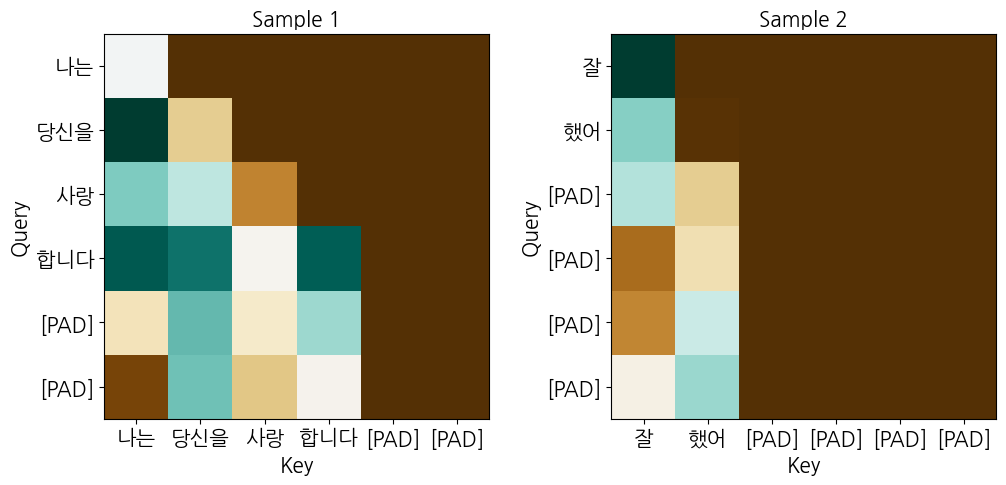

In [ ]:
# ÏÉòÌîå ÎëêÍ∞ú Ìó§Îìú ÌïòÎÇòÏßúÎ¶¨ (6,6)Ïù∏ Ïñ¥ÌÖêÏÖò Ïä§ÏΩîÏñ¥
decoder_self_attn_scores = torch.rand((2, 1, 6, 6))
trg_mask_dec_reshape = trg_mask_dec.unsqueeze(1)

# -1e9Î°ú ÎßàÏä§ÌÇπÏùÑ ÌïòÎ©¥ ÎßàÏä§ÌÇπ ÎêòÏßÄ ÏïäÎäî Î∂ÄÎ∂ÑÏù¥ Î™®Îëê Í∞ôÏùÄ ÏÉâÏúºÎ°ú 
# ÎÇòÌÉÄÎÇòÎØÄÎ°ú Ïó¨Í∏∞ÏÑúÎäî Í∑∏ÎÉ• 0ÏúºÎ°ú ÎßàÏä§ÌÇπ
masked_decoder_self_attn_scores = decoder_self_attn_scores.masked_fill(trg_mask_dec_reshape == 0, 0)

fig, ax = plt.subplots(figsize=(12,5), nrows=1, ncols=2)

ax[0].imshow(masked_decoder_self_attn_scores[0][0], cmap='BrBG')
ax[0].set_xticks([0, 1, 2, 3, 4, 5])
ax[0].set_xticklabels(['ÎÇòÎäî', 'ÎãπÏã†ÏùÑ', 'ÏÇ¨Îûë', 'Ìï©ÎãàÎã§', '[PAD]', '[PAD]'], fontsize=15)
ax[0].set_xlabel('Key', fontsize=15)
ax[0].set_yticks([0, 1, 2, 3, 4, 5])
ax[0].set_yticklabels(['ÎÇòÎäî', 'ÎãπÏã†ÏùÑ', 'ÏÇ¨Îûë', 'Ìï©ÎãàÎã§', '[PAD]', '[PAD]'], fontsize=15)
ax[0].set_ylabel('Query', fontsize=15)
ax[0].set_title('Sample 1', fontsize=15)

ax[1].imshow(masked_decoder_self_attn_scores[1][0], cmap='BrBG')
ax[1].set_xticks([0, 1, 2, 3, 4, 5])
ax[1].set_xticklabels(['Ïûò', 'ÌñàÏñ¥', '[PAD]', '[PAD]', '[PAD]', '[PAD]'], fontsize=15)
ax[1].set_xlabel('Key', fontsize=15)
ax[1].set_yticks([0, 1, 2, 3, 4, 5])
ax[1].set_yticklabels(['Ïûò', 'ÌñàÏñ¥', '[PAD]', '[PAD]', '[PAD]', '[PAD]'], fontsize=15)
ax[1].set_ylabel('Query', fontsize=15)
ax[1].set_title('Sample 2', fontsize=15)

plt.show()

ÎßàÏä§ÌÇπÎêú Í∑∏Î¶ºÏùÑ Î≥¥Î©¥ ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖòÏóê ÎåÄÌïú ÎßàÏä§ÌÇπ ÎïåÎ¨∏Ïóê ÏÉÅÏÇºÍ∞ÅÌñâÎ†¨Ïóê Ìï¥ÎãπÌïòÎäî ÏöîÏÜåÍ∞Ä Î™®Îëê ÎßàÏä§ÌÇπÎêòÏóàÍ≥† ÌÉÄÍ≤üÏóê ÏûàÎäî [PAD]Ïóê ÎåÄÌï¥ÏÑú Ïó¥Î∞©Ìñ•ÏúºÎ°ú ÎßàÏä§ÌÇπ Îêú Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

Ïù¥Ï†ú ÎßàÏßÄÎßâÏúºÎ°ú ÎîîÏΩîÎçîÏóêÏÑú ÏùºÏñ¥ÎÇòÎäî ÌÅ¨Î°úÏä§ Ïñ¥ÌÖêÏÖòÏóê ÎåÄÌïú ÎßàÏä§ÌÅ¨Î•º ÌôïÏù∏ÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§. Ïù¥Î•º ÏúÑÌï¥ Ï†ÅÎãπÌûà (nbatches=2, head=1, dv=5) ÌÅ¨Í∏∞Î•º Í∞ÄÏßÄÎäî Î≤®Î•ò ÌÖêÏÑúÎ•º ÎßåÎì§Í≥† ÏïûÏÑú ÏÜåÏä§ ÎßàÏä§ÌÅ¨ÏóêÏÑú ÎßåÎì§Ïñ¥ ÎÜìÏùÄ `masked_encoder_self_attn_scores` ÌÖêÏÑúÏôÄ Í≥±Ìï¥ Ìó§ÎìúÎ•º ÎßåÎì≠ÎãàÎã§.
Í∑∏ Îã§Ïùå ÏûÑÏùòÎ°ú Ï¥àÍ∏∞Ìôî Îêú $W^o$ÌñâÎ†¨Í≥º Í≥±Ìï¥ÏÑú ÏµúÏ¢Ö Ïù∏ÏΩîÎî©ÏùÑ ÎßåÎì≠ÎãàÎã§.

In [ ]:
V = torch.rand((2, model_const['h'], model_const['src_len'], model_const['dv']))
# headÍ∞Ä ÌïòÎÇò ÎøêÏù¥Îùº concat Ìï† ÌïÑÏöîÏóÜÏù¥ squeeze()Ìï©ÎãàÎã§.
head = torch.matmul(masked_encoder_self_attn_scores, V).squeeze() 
Wo = torch.rand(model_const['dv']*model_const['h'], model_const['d_model'])
encoding_src = torch.matmul(head, Wo)

print(encoding_src.shape)
print(encoding_src)

torch.Size([2, 5, 7])
tensor([[[1.0294, 0.7110, 1.2372, 1.2129, 0.7019, 1.0475, 0.7646],
         [1.2187, 0.8042, 1.3032, 1.3789, 0.7853, 1.1692, 0.8113],
         [1.6975, 1.1283, 1.8728, 1.9523, 1.1103, 1.6466, 1.1651],
         [1.5593, 1.0704, 1.8425, 1.8246, 1.0543, 1.5739, 1.1397],
         [1.1744, 0.7850, 1.2664, 1.3166, 0.7594, 1.1417, 0.7857]],

        [[1.2639, 0.7654, 1.1128, 1.3740, 0.7473, 1.0897, 0.7065],
         [0.5493, 0.3320, 0.4814, 0.5968, 0.3242, 0.4724, 0.3058],
         [0.6518, 0.3942, 0.5721, 0.7083, 0.3849, 0.5610, 0.3633],
         [0.6253, 0.3794, 0.5528, 0.6802, 0.3704, 0.5404, 0.3508],
         [0.8571, 0.5200, 0.7577, 0.9323, 0.5076, 0.7407, 0.4808]]])


Ïù¥Î†áÍ≤å ÎßåÎì§Ïñ¥ÏßÑ Ïù∏ÏΩîÎî©ÏóêÏÑú 4ÌñâÍ≥º 5ÌñâÏùÄ [PAD]Í∞Ä Ïù∏ÏΩîÎî©Îêú Ï†ïÎ≥¥ÏûÑÏùÑ ÏÉÅÍ∏∞ Ìï©ÏãúÎã§. Ïù¥Ï†ú ÎîîÏΩîÎçî Ï™ΩÏóêÏÑú ÌÉÄÍ≤üÏóê ÎåÄÌïú Ïù∏ÏΩîÎî©ÏùÑ ÎèôÏùºÌïú Î∞©ÏãùÏúºÎ°ú ÎßåÎì≠ÎãàÎã§.

In [ ]:
V = torch.rand((2, 1, model_const['target_len'], model_const['dv']))
head = torch.matmul(masked_decoder_self_attn_scores, V).squeeze()
Wo = torch.rand(model_const['dv']*model_const['h'], model_const['d_model'])
encoding_trg = torch.matmul(head, Wo)

print(encoding_trg.shape)
print(encoding_trg)

torch.Size([2, 6, 7])
tensor([[[0.5106, 0.3210, 0.4591, 0.3860, 0.3253, 0.7166, 0.4482],
         [1.2937, 0.8636, 1.0777, 0.9375, 0.7242, 1.7835, 1.1848],
         [1.4511, 1.0323, 1.1461, 0.9932, 0.6888, 1.9955, 1.3849],
         [2.9764, 2.2205, 2.0240, 1.9759, 1.1960, 3.9099, 2.9628],
         [2.0235, 1.5486, 1.3221, 1.3098, 0.7362, 2.6430, 2.0507],
         [1.4241, 1.1268, 0.8691, 0.8917, 0.4447, 1.8378, 1.4792]],

        [[1.1514, 0.8615, 1.0295, 0.7258, 0.4767, 1.7057, 1.1136],
         [0.7984, 0.5966, 0.7133, 0.5041, 0.3319, 1.1818, 0.7717],
         [0.9076, 0.6549, 0.7960, 0.5999, 0.4196, 1.3159, 0.8620],
         [0.3926, 0.2661, 0.3333, 0.2794, 0.2128, 0.5489, 0.3617],
         [0.5759, 0.3875, 0.4871, 0.4131, 0.3173, 0.8018, 0.5287],
         [0.9116, 0.6335, 0.7839, 0.6305, 0.4656, 1.2929, 0.8499]]])


Ïù¥Ï†ú `encoding_src`Î•º ÌÇ§ÏôÄ Î≤®Î•òÎ°ú ÏÇ¨Ïö©ÌïòÍ≥† `encoding_trg`Î•º ÏøºÎ¶¨Î°ú ÏÇ¨Ïö©Ìï¥ÏÑú Ïñ¥ÌÖêÏÖòÌï©ÎãàÎã§. Ïù¥Îïå Ïñ¥ÌÖêÏÖò ÎßàÏä§ÌÅ¨Îäî ÏÜåÏä§ ÎßàÏä§ÌÅ¨Ïù∏ `src_mask_enc_reshape`Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.

`encoding_src`ÏôÄ `encoding_trg`Í∞Ä `MultiHeadedAttention.forward()`Î°ú ÏûÖÎ†•ÎêòÎ©¥ ÏïûÏÑú ÏïåÏïÑÎ≥∏Í≥ºÏ†ïÏùÑ ÌÜµÌï¥ Ïù¥ Ïù∏ÏΩîÎî©Îì§ÎèÑ Î©ÄÌã∞Ìó§Îìú ÏøºÎ¶¨, ÌÇ§, Î≤®Î•òÎ°ú Î∞îÎÄåÍ≤å Îê©ÎãàÎã§. Ïó¨Í∏∞ÏÑúÎäî Ïù¥ Í≥ºÏ†ïÏùÑ Í±∞Ï≥§Îã§Í≥† Í∞ÄÏ†ïÌïòÍ≥† Î∞îÎ°ú ÌÖêÏÑúÎ•º (nbatches, h, n_seq, d_k)Î°ú Î≥ÄÌôòÌïòÏó¨ ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.

Î≥ÄÌôòÎêú Îëê Ïù∏ÏΩîÎî© ÌÖêÏÑúÎ•º Ïñ¥ÌÖêÏÖò Ïó∞ÏÇ∞ÌïòÍ≥† ÎßàÏä§ÌÅ¨Î•º Ï†ÅÏö©Ìï©ÎãàÎã§.

In [ ]:
multiheaded_encoding_src = encoding_src.unsqueeze(1)
multiheaded_encoding_trg = encoding_trg.unsqueeze(1)

cross_QKt = torch.matmul(multiheaded_encoding_trg, 
                         multiheaded_encoding_src.transpose(3,2))

print('cross_QKt shape =>', cross_QKt.shape)
print(cross_QKt)

masked_cross_QKt = cross_QKt.masked_fill(src_mask_enc_reshape == 0, 0)
print(masked_cross_QKt)

cross_QKt shape => torch.Size([2, 1, 6, 5])
tensor([[[[ 3.1116,  3.4679,  4.9056,  4.6715,  3.3585],
          [ 7.6987,  8.5836, 12.1403, 11.5588,  8.3135],
          [ 8.4830,  9.4594, 13.3774, 12.7368,  9.1630],
          [16.7439, 18.6899, 26.4238, 25.1438, 18.1033],
          [11.2617, 12.5726, 17.7739, 16.9118, 12.1787],
          [ 7.7921,  8.7019, 12.3004, 11.7021,  8.4297]]],


        [[[ 7.2592,  3.1482,  3.7382,  3.5987,  4.9323],
          [ 5.0332,  2.1828,  2.5919,  2.4952,  3.4198],
          [ 5.7148,  2.4784,  2.9429,  2.8330,  3.8828],
          [ 2.4674,  1.0701,  1.2707,  1.2231,  1.6764],
          [ 3.6185,  1.5694,  1.8635,  1.7937,  2.4584],
          [ 5.7328,  2.4863,  2.9523,  2.8419,  3.8950]]]])
tensor([[[[ 3.1116,  3.4679,  4.9056,  0.0000,  0.0000],
          [ 7.6987,  8.5836, 12.1403,  0.0000,  0.0000],
          [ 8.4830,  9.4594, 13.3774,  0.0000,  0.0000],
          [16.7439, 18.6899, 26.4238,  0.0000,  0.0000],
          [11.2617, 12.5726, 17.7739,

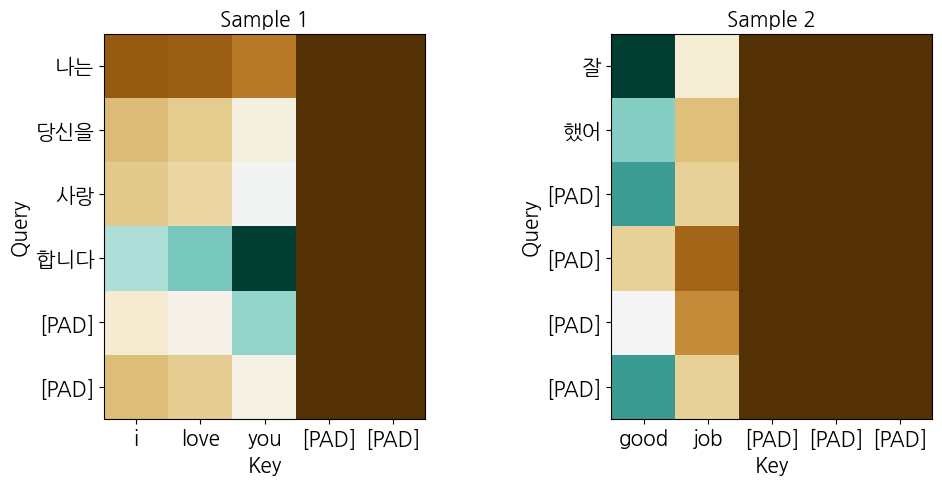

In [ ]:
fig, ax = plt.subplots(figsize=(12,5), nrows=1, ncols=2)

ax[0].imshow(masked_cross_QKt[0][0], cmap='BrBG')
ax[0].set_xticks([0, 1, 2, 3, 4])
ax[0].set_xticklabels(['i', 'love', 'you', '[PAD]', '[PAD]'], fontsize=15)
ax[0].set_xlabel('Key', fontsize=15)
ax[0].set_yticks([0, 1, 2, 3, 4, 5])
ax[0].set_yticklabels(['ÎÇòÎäî', 'ÎãπÏã†ÏùÑ', 'ÏÇ¨Îûë', 'Ìï©ÎãàÎã§', '[PAD]', '[PAD]'], fontsize=15)
ax[0].set_ylabel('Query', fontsize=15)
ax[0].set_title('Sample 1', fontsize=15)

ax[1].imshow(masked_cross_QKt[1][0], cmap='BrBG')
ax[1].set_xticks([0, 1, 2, 3, 4])
ax[1].set_xticklabels(['good', 'job',  '[PAD]', '[PAD]', '[PAD]'], fontsize=15)
ax[1].set_xlabel('Key', fontsize=15)
ax[1].set_yticks([0, 1, 2, 3, 4, 5])
ax[1].set_yticklabels(['Ïûò', 'ÌñàÏñ¥', '[PAD]', '[PAD]', '[PAD]', '[PAD]'], fontsize=15)
ax[1].set_ylabel('Query', fontsize=15)
ax[1].set_title('Sample 2', fontsize=15)

plt.show()


ÎìúÎîîÏñ¥ üò≤ ÌÉÄÍ≤üÏùò ÏøºÎ¶¨ 'ÎÇòÎäî', 'ÎãπÏã†ÏùÑ', 'ÏÇ¨Îûë', 'Ìï©ÎãàÎã§', '[PAD]', '[PAD]'Í∞Ä ÏÜåÏä§Ï™Ω ÌÇ§ 'i', 'love', 'you'ÏôÄ Ïñ¥ÌÖêÏÖòÎêòÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§! Ïù∏ÏΩîÎçîÏóêÏÑú [PAD]Í∞Ä Ïù∏ÏΩîÎî©ÎêòÏñ¥ Ïò® Ï†ïÎ≥¥Îäî ÎîîÏΩîÎçîÏ™Ω ÌÅ¨Î°úÏä§ Ïñ¥ÌÖêÏÖòÏóêÏÑú ÎπÑÎ°úÏÜå Ìå®Îî©ÎêòÏñ¥ ÏÇ¨ÎùºÏßÄÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

Í∑∏Îüº ÏøºÎ¶¨Î°ú Ïì∞Ïù¥Îäî ÌÉÄÍ≤üÏóê Ìè¨Ìï®Îêú [PAD]Îäî Ïñ∏Ï†ú ÎßàÏä§ÌÇπ Îê†ÍπåÏöî? Ïù¥ [PAD]Îäî Î°úÏä§Î•º Í≥ÑÏÇ∞Ìï† Îïå ÎßàÏä§ÌÇπÎêòÍ≤å Îê©ÎãàÎã§. Í∑∏ Í≥ºÏ†ïÏù¥ ÏïÑÎûòÏ™Ω Label Smoothin Ï†àÏóê ÎÇòÏôÄ ÏûàÏäµÎãàÎã§.

## Ïû•ÎÇúÍ∞ê Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±Ìï®Ïàò

ÏõêÎ¨∏ÏóêÏÑúÎäî ÏïÑÎûò Ìï®ÏàòÏ≤òÎüº ÏûÖÎ†•Í≥º Ï∂úÎ†•Ïù¥ ÎèôÏùºÌïú Î¨¥ÏûëÏúÑ Ïà´ÏûêÎ•º Ïó¥Í∞ú ÏÉùÏÑ±ÌïòÏó¨ ÏûÖÎ†•Ïù¥ Îì§Ïñ¥Í∞îÏùÑ Îïå Ï†úÎåÄÎ°ú Ï∂úÎ†•Ïù¥ ÎÇòÏò§ÎäîÏßÄ Ï≤¥ÌÅ¨Ìï©ÎãàÎã§.

In [ ]:
def data_gen(V, batch, nbatches):
    "Generate random data for a src-tgt copy task."
    for i in range(nbatches):
        data = torch.from_numpy(np.random.randint(1, V, size=(batch, 10)))
        data[:, 0] = 1
        src = data; src.requires_grad=False
        tgt = data; tgt.requires_grad=False
        yield Batch(src, tgt, 0)

ÏûÖÎ†•Í≥º ÎèôÏùºÌïú Ï∂úÎ†•Ïù¥ ÎÇòÏò§Îäî ÏòàÏ†úÎäî ÎÑàÎ¨¥ Ïû¨ÎØ∏Í∞Ä ÏóÜÏúºÎãà Ïó¨Í∏∞ÏÑúÎäî Ïù¥ ÏòàÏ†úÎ•º ÏÇ¥Ïßù Î∞îÍøîÏÑú Í∏∏Ïù¥ 10ÏßúÎ¶¨ Î¨¥ÏûëÏúÑ Ïà´ÏûêÎ•º ÏûÖÎ†•ÏúºÎ°ú ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏùÄ ÎòëÍ∞ôÏúºÎÇò Ï∂úÎ†•ÏùÄ 5Î≤àÎ∂ÄÌÑ∞ 10Î≤à Ïà´Ïûê Ï¶â Îí§Ï™Ω Ï†àÎ∞òÏóê +1ÏùÑ Ìïú Í≤ÉÏùÑ Ï∂úÎ†•ÏúºÎ°ú ÏÑ§Ï†ïÌïòÍ≤†ÏäµÎãàÎã§.

ÏòàÎ•º Îì§Î©¥ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.

```
- ÏûÖÎ†•: 1 2 3 4 5 6 7 8  9 10
- Ï∂úÎ†•: 1 2 3 4 5 7 8 9 10 11

In [ ]:
def data_gen2(V, batch, nbatches):
    """
    Î¨¥ÏûëÏúÑ Îç∞Ïù¥ÌÑ∞Î•º ÏÉùÏÑ±ÌïòÎäîÎç∞
    Îç∞Ïù¥ÌÑ∞ Í∏∏Ïù¥Ïùò Îí∑ Ï†àÎ∞òÏóê +1 Ìïú Í≤ÉÏù¥ Ï†ïÎãµ Î≤°ÌÑ∞Ïù∏ Îç∞Ïù¥ÌÑ∞Î•º ÏÉùÏÑ±ÌïúÎã§.
    V: Îã®Ïñ¥Ïû•Ïóê Îã®Ïñ¥Ïàò
    batch: Ìïú ÎØ∏ÎãàÎ∞∞ÏπòÏóê ÏÉòÌîå Ïàò
    nbatches: Ìïú ÏóêÌè≠Ïóê ÏûàÎäî ÎØ∏ÎãàÎ∞∞Ïπò Ïàò
    """
    for i in range(nbatches):
        # ÏÉòÌîåÌïòÎÇòÎãπ ÏãúÌÄÄÏä§ Í∏∏Ïù¥Îäî 10ÏúºÎ°ú Í≥†Ï†ï
        data = torch.from_numpy(np.random.randint(1, V-1, size=(batch, 10)))
        data.requires_grad = False
        data[:, 0] = 1
        
        src = data.clone() 
        tgt = data.clone()
        # Îí§Ïóê Îã§ÏÑØÍ∞úÎäî +1
        tgt[:, V//2:] +=1 
        
        yield Batch(src, tgt, 0)

In [ ]:
# data_gen2Í∞Ä Ï†úÎåÄÎ°ú ÏûëÎèôÌïòÎäîÏßÄ ÌôïÏù∏
# Îã®Ïñ¥Ïàò: 11, ÎØ∏ÎãàÎ∞∞ÏπòÏÇ¨Ïù¥Ï¶à:1, ÏóêÌè≠Îãπ ÎØ∏ÎãàÎ∞∞Ïπò:10
for data in data_gen2(11, 1, 10) :
    # ÏûÖÎ†•, teach_forcingÏùò ÏûÖÎ†•, teach_forcingÏùò Ï∂úÎ†•
    print('data.src: ', data.src)
    print('data.src_mask: ', data.src_mask)
    print('data.trg: ', data.trg)
    print('data.trg_y: ', data.trg_y)
    print('data.trg_mask\n', data.trg_mask)

data.src:  tensor([[1, 9, 2, 7, 6, 7, 7, 8, 2, 5]])
data.src_mask:  tensor([[[True, True, True, True, True, True, True, True, True, True]]])
data.trg:  tensor([[1, 9, 2, 7, 6, 8, 8, 9, 3]])
data.trg_y:  tensor([[9, 2, 7, 6, 8, 8, 9, 3, 6]])
data.trg_mask
 tensor([[[ True, False, False, False, False, False, False, False, False],
         [ True,  True, False, False, False, False, False, False, False],
         [ True,  True,  True, False, False, False, False, False, False],
         [ True,  True,  True,  True, False, False, False, False, False],
         [ True,  True,  True,  True,  True, False, False, False, False],
         [ True,  True,  True,  True,  True,  True, False, False, False],
         [ True,  True,  True,  True,  True,  True,  True, False, False],
         [ True,  True,  True,  True,  True,  True,  True,  True, False],
         [ True,  True,  True,  True,  True,  True,  True,  True,  True]]])
data.src:  tensor([[1, 4, 2, 2, 6, 2, 3, 9, 9, 8]])
data.src_mask:  tensor([

ÎØ∏ÎãàÎ∞∞Ïπò ÎÇ¥ ÏÉòÌîåÎì§ÏùÑ ÏµúÎåÄ Í∏∏Ïù¥Î°ú ÏûòÎùºÏ£ºÎäî Ìï®ÏàòÏûÖÎãàÎã§.

In [ ]:
global max_src_in_batch, max_tgt_in_batch
def batch_size_fn(new, count, sofar):
    "Keep augmenting batch and calculate total number of tokens + padding."
    global max_src_in_batch, max_tgt_in_batch
    if count == 1:
        max_src_in_batch = 0
        max_tgt_in_batch = 0
    max_src_in_batch = max(max_src_in_batch,  len(new.src))
    max_tgt_in_batch = max(max_tgt_in_batch,  len(new.trg) + 2)
    src_elements = count * max_src_in_batch
    tgt_elements = count * max_tgt_in_batch
    return max(src_elements, tgt_elements)

## Learning Rate Warm Up

$$
lrate = d^{-0.5}_{\text{model}}\cdot \min \left({step\_num}^{-0.5}, {step\_num} \cdot  {warmup\_steps}^{-1.5} \right)
$$

ÌïôÏäµÏ§ë ÌïôÏäµÎ•†ÏùÑ ÏúÑ ÏãùÏ≤òÎüº Î≥ÄÍ≤ΩÌï©ÎãàÎã§. ÏãùÏóêÏÑú $step\_num$ÏùÄ ÏòµÌã∞ÎßàÏù¥Ï†ÄÍ∞Ä ÌååÎùºÎØ∏ÌÑ∞Î•º ÌïúÎ≤à ÏóÖÎç∞Ïù¥Ìä∏Ìï† ÎïåÎßàÎã§ 1 Ï¶ùÍ∞ÄÌïòÎäî ÏßÑÌñâ Ïä§ÌÉ≠ÏàòÎ•º ÎÇòÌÉÄÎÉÖÎãàÎã§. ÌïôÏäµ Ï¥àÍ∏∞ÏóêÎäî $step\_num$Ïù¥ ÏûëÍ∏∞ ÎïåÎ¨∏Ïóê Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.

$$
{step\_num} \cdot  {warmup\_steps}^{-1.5} = \min \left({step\_num}^{-0.5}, {step\_num} \cdot  {warmup\_steps}^{-1.5} \right)
$$

Ï¶â $step\_num$Ïù¥ Ï¶ùÍ∞ÄÌï®Ïóê Îî∞Îùº ÏÑ†ÌòïÏ†ÅÏúºÎ°ú ÌïôÏäµÎ•†Ïù¥ Ï¶ùÍ∞ÄÌï©ÎãàÎã§. $step\_num$Ïù¥ Í≥ÑÏÜç Ï¶ùÍ∞ÄÌïòÎã§Í∞Ä $step\_num =  warmup\_steps$Í∞Ä ÎêòÎ©¥ $\min$ ÏïàÏóê Îëê Ìï≠ÏùÄ Í∞ôÏïÑÏßÄÍ≤å ÎêòÍ≥† Í∑∏ Îã§Ïùå Ïä§ÌÉ≠Î∂ÄÌÑ∞ 

$$
{step\_num}^{-0.5} = \min \left({step\_num}^{-0.5}, {step\_num} \cdot  {warmup\_steps}^{-1.5} \right)
$$

Í∞Ä ÎêòÏñ¥ $step\_num$Ïùò Ï†úÍ≥±Ïóê Î∞òÎπÑÎ°ÄÌïòÍ≤å ÌïôÏäµÎ•†Ïù¥ Ï≤úÏ≤úÌûà Ï§ÑÏñ¥Îì§Í≤å Îê©ÎãàÎã§. ÏΩîÎìúÎ•º Î≥¥Î©¥ Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú ÌïôÏäµÎ•†Ïùò ÌÅ¨Í∏∞Î•º Ï°∞Ï†ïÌïòÍ∏∞ ÏúÑÌï¥ Î™®Îç∏ ÏÇ¨Ïù¥Ï¶àÏôÄ Î≥ÑÎèÑÏùò factorÎ•º Í≥±ÌïòÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.


In [ ]:
class NoamOpt:
    "Optim wrapper that implements rate."
    def __init__(self, model_size, factor, warmup, optimizer):
        self.optimizer = optimizer
        self._step = 0
        self.warmup = warmup
        self.factor = factor
        self.model_size = model_size
        self._rate = 0
        
    def step(self):
        "Update parameters and rate"
        self._step += 1
        rate = self.rate()
        for p in self.optimizer.param_groups:
            p['lr'] = rate
        self._rate = rate
        self.optimizer.step()
        
    def rate(self, step = None):
        "Implement `lrate` above"
        if step is None:
            step = self._step
        # Ï¥àÍ∏∞ÏóêÎäî min( , )ÏóêÏÑú Îí∑Î∂ÄÎ∂ÑÏù¥ ÏûëÎèôÌïòÏó¨ stepÏóê ÏÑ†ÌòïÏ†ÅÏúºÎ°ú lrÏù¥ Ï¶ùÍ∞Ä
        # Í∑∏Î†áÍ≤å Îí∑ Î∂ÄÎ∂ÑÏù¥ ÏûêÍæ∏ Ïª§ÏßÄÎã§ stepÏóê self.warmupÍ≥º Í∞ôÏïÑÏßÄÎ©¥
        # Îí∑Î∂ÄÎ∂ÑÏù¥ step*step**(-1.5)=step**(-0.5)Í∞Ä ÎêòÍ≥† 
        # step = self.warmup+1Î∂ÄÌÑ∞Îäî ÏïûÎ∂ÄÎ∂ÑÏù¥ ÏûëÏïÑÏ†∏ÏÑú
        # Ïñ¥Îäê ÏàúÍ∞Ñ stepÏùò Ï†úÍ≥±Í∑ºÏóê Î∞òÎπÑÎ°ÄÌïòÍ≤å lrÏù¥ Ï§ÑÏñ¥Îì¨
        return self.factor * \
            (self.model_size ** (-0.5) * 
             min(step ** (-0.5), step * self.warmup ** (-1.5)))
        
def get_std_opt(model):
    return NoamOpt(model.src_embed[0].d_model, 2, 4000,
            torch.optim.Adam(model.parameters(), lr=0, betas=(0.9, 0.98), eps=1e-9))

Î™®Îç∏ ÏÇ¨Ïù¥Ï¶à 512, 256, ÏõúÏóÖÏä§ÌÉ≠ 4000, 8000Ïù∏ Í≤ΩÏö∞Ïóê ÎåÄÌï¥ÏÑú ÌïôÏäµÎ•†Ïù¥ Ïñ¥ÎñªÍ≤å Î≥ÄÌôîÌïòÎäîÏßÄ Í∑∏ÎûòÌîÑÎ°ú Í∑∏Î¶¨Î©¥ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.

<matplotlib.legend.Legend>

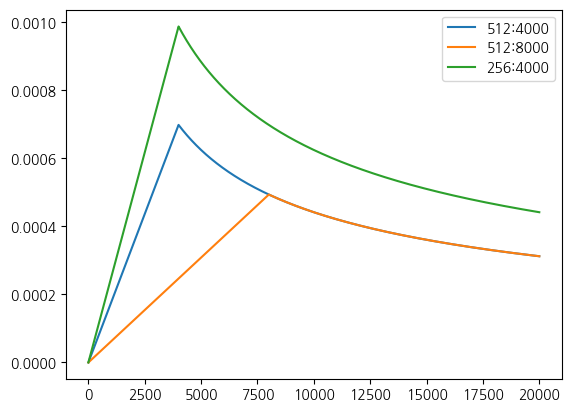

In [ ]:
opts = [NoamOpt(512, 1, 4000, None), 
        NoamOpt(512, 1, 8000, None),
        NoamOpt(256, 1, 4000, None)]
plt.plot(np.arange(1, 20000), [[opt.rate(i) for opt in opts] for i in range(1, 20000)])
plt.legend(["512:4000", "512:8000", "256:4000"])

## Label Smoothing

ÏòàÏ∏°ÏùÑ Ìï† Îïå Ï†ïÎãµÏù¥ÎùºÍ≥† ÏòàÏ∏°Îêú ÌÜ†ÌÅ∞Ïóê Í±∞Ïùò ÌôïÎ•† 1Î°ú ÏòàÏ∏°ÌïòÎäî Í≤ÉÏùÑ ÎßâÍ∏∞ÏúÑÌï¥ Î†àÏù¥Î∏îÏùÑ ÍπçÏïÑÏ£ºÎäî ÏûëÏóÖÏùÑ ÌïòÎ©¥ ÏòàÏ∏° ÏÑ±Îä•Ïù¥ Îçî Ï¢ãÏïÑÏßÄÎäî Í≤ÉÏúºÎ°ú ÏïåÎ†§Ï†∏ ÏûàÏäµÎãàÎã§.

ÏïÑÎûò ÏõêÎ¨∏Ï≤òÎüº 0, 1Î°ú Íµ¨ÏÑ±Îêú ÌôïÎ•† Î∂ÑÌè¨Î•º Ï†ïÎãµ Î∂ÑÌè¨Î°ú Ïì∞ÏßÄ ÏïäÍ≥† Ï†ïÎãµÏûêÎ¶¨ ÌôïÎ•†ÏùÑ 0.8Ï†ïÎèÑÎ°ú ÍπçÏïÑÎÇ¥Î¶¨Í≥† ÍπçÏïÑÎÇ∏ 0.2Î•º ÎÇòÎ®∏ÏßÄ Ïò§Îãµ ÏûêÎ¶¨Ïóê Í≥†Î£® Î∂ÑÎ∞∞ÌïòÏó¨ Ï†ïÎãµ Î∂ÑÌè¨Î•º ÎßàÏπò 'Ïã†Î¢∞ÎèÑ'Ï†ïÎèÑÎ°ú Ìï¥ÏÑùÌï† Ïàò ÏûàÍ≤å ÌïòÎäî Î∞©ÏãùÏûÖÎãàÎã§.

> We implement label smoothing using the KL div loss. Instead of using a one-hot target distribution, we create a distribution that has `confidence` of the correct word and the rest of the `smoothing` mass distributed throughout the vocabulary.

In [ ]:
class LabelSmoothing(nn.Module):
    "Implement label smoothing."
    def __init__(self, size, padding_idx, smoothing=0.0):
        super(LabelSmoothing, self).__init__()
        
        # size_average and reduce are in the process of being deprecated, 
        # and in the meantime, specifying either of those two args will override reduction.
        # self.criterion = nn.KLDivLoss(size_average=False)
        
        # smoothingÏùÑ Ï†ÅÏö©Ìïú ÌÉÄÍ≤üÍ≥º Î°úÏä§Î•º Íµ¨ÌïòÎØÄÎ°ú NLLLoss ÎåÄÏã† KLDivLoss ÏÇ¨Ïö©
        self.criterion = nn.KLDivLoss(reduction='sum') # input: log-probabilities 
        self.padding_idx = padding_idx
        self.confidence = 1.0 - smoothing
        self.smoothing = smoothing
        self.size = size
        self.true_dist = None
        
    def forward(self, x, target):
        # x: model.generatorÏóêÏÑú Ï∂úÎ†•Ìïú log_softmax Í∞í

        assert x.size(1) == self.size
        true_dist = x.data.clone()
        true_dist.fill_(self.smoothing / (self.size - 2)) # Ï†ïÎãµÏûêÎ¶¨ÏôÄ Ìå®Îî©ÏûêÎ¶¨ ÎëêÏûêÎ¶¨ ÎπºÍ≥†
        true_dist.scatter_(1, target.data.unsqueeze(1), self.confidence)
        # Ïó¨Í∏∞ÍπåÏßÄ Ïä§Î¨¥Îî© ÏãúÏº∞Í≥†...
        
        # Ìå®Îî© ÌÜ†ÌÅ∞ ÏúÑÏπòÎäî ÌôïÎ•†ÏùÑ 0ÏúºÎ°ú ÏßÄÏ†ï
        true_dist[:, self.padding_idx] = 0
        
        # targetÏù¥ Ìå®ÌåÖÌÜ†ÌÅ∞ Î≤àÌò∏ÎùºÎ©¥ Í∑∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ÏÑúÎäî Î°úÏä§Î•º Íµ¨Ìï† ÌïÑÏöî
        # ÏóÜÏúºÎØÄÎ°ú Î™®Îì† ÌôïÎ•†Î∂ÑÌè¨ÏûêÎ¶¨Î•º 0ÏúºÎ°ú ÎßåÎì§Ïñ¥ Î≤ÑÎ¶º
        mask = torch.nonzero(target.data == self.padding_idx)
        if mask.dim() > 0:
            # index_fill_(dim, index, val): dimÏ∞®ÏõêÏùÑ Îî∞Îùº indexÍ∞Ä ÏßÄÏ†ïÎêú ÏúÑÏπòÏóê valÏùÑ Ï±ÑÏõÄ
            true_dist.index_fill_(0, mask.squeeze(), 0.0)
        self.true_dist = true_dist

        # loss Í≥ÑÏÇ∞
        return self.criterion(x, true_dist)

Îäò Í∑∏Î†áÎìØÏù¥ ÏúÑ ÏΩîÎìúÎ•º Î≥¥Î©¥ Îòê Ïù¥Ìï¥Í∞Ä ÏâΩÏßÄ ÏïäÏäµÎãàÎã§. Í∑∏ÎûòÏÑú ÌïòÎÇòÏî© ÎúØÏñ¥ÏÑú ÏïåÏïÑÎ≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§. Í∞ÑÎã®Ìïú ÏòàÏ†úÎ•º ÏúÑÌï¥ Îã®Ïñ¥Ïû• ÌÅ¨Í∏∞Í∞Ä 5ÎùºÍ≥† Í∞ÄÏ†ïÌïòÍ≤†ÏäµÎãàÎã§. `smoothing=0.4`Î°ú ÎëêÎ©¥ Îã§ÏùåÏ≤òÎüº ÏãúÏûëÌï† Ïàò ÏûàÏäµÎãàÎã§.

In [ ]:
size = 5
smoothing = 0.4
# Ï†ïÎãµÏûêÎ¶¨Í∞Ä Í∞ÄÏ†∏Í∞à ÌôïÎ•† ÏõêÎûòÎäî 1Ïù∏Îç∞ (1-smoothing)ÏúºÎ°ú ÍπçÏïÑÎ≤ÑÎ¶¨Í≥†
# ÍπçÏùÄ ÎßåÌÅº(smoothing)ÏùÑ Ïò§ÎãµÏûêÎ¶¨Ïóê ÎèôÏùºÌïòÍ≤å ÎÇòÎà† Ï£ºÎäî ÏûëÏóÖÏùÑ ÏãúÏûë
confidence = 1- smoothing 
padding_idx = 0

Ï¥ù ÏÑ∏ Í∞ú ÏÉòÌîåÏóê ÎåÄÌï¥ÏÑú Îã§ÏùåÏ≤òÎüº ÏòàÏ∏°Ïù¥ ÎÇòÏôîÎã§Í≥† ÌïòÍ≤†ÏäµÎãàÎã§.

In [ ]:
# ÏòàÏ∏°ÏùÄ 2Î≤à, 2Î≤à, 2Î≤à ÌÜ†ÌÅ∞ÏúºÎ°ú ÏòàÏ∏°
# Ï¥ù Îã§ÏÑØÍ∞úÏùò ÌÜ†ÌÅ∞Ïù¥ ÏûàÍ≥† 0Î≤à ÌÜ†ÌÅ∞ÏùÄ [PAD], 1~4Î≤à ÌÜ†ÌÅ∞ÏùÄ ÏùºÎ∞ò ÌÜ†ÌÅ∞
#              ÌÜ†ÌÅ∞ÏúÑÏπò 0    1    2    3   4  
x = torch.FloatTensor([[0, 0.2, 0.7, 0.1,  0],
                       [0, 0.2, 0.7, 0.1,  0], 
                       [0, 0.2, 0.7, 0.1,  0]])

ÏÑ∏ Í∞ú ÏÉòÌîåÏóê ÎåÄÌï¥ÏÑú Î™®Îëê 2Î≤à Îã®Ïñ¥Í∞Ä Ï†ïÎãµÏù¥ÎùºÍ≥† ÏòàÏ∏°Ìïú ÏÉÅÌô©ÏûÖÎãàÎã§. Í∑∏Î¶¨Í≥† Ï†ïÎãµ ÌÉÄÍ≤üÏùÄ (2, 0, 0)Ïù¥ÎùºÍ≥† Í∞ÄÏ†ïÌïòÍ≤†ÏäµÎãàÎã§. Ï∏° Ï≤´ ÏÉòÌîåÎßå 2Î≤à Îã®Ïñ¥Í∞Ä Ï†ïÎãµÏù¥Í≥† ÎÇòÎ®∏ÏßÄ Îí§ ÎëêÍ∞úÎäî Ìå®Îî© ÌÜ†ÌÅ∞Ïù∏ ÏÉÅÌô©ÏûÖÎãàÎã§. Í∞Å ÏÉòÌîåÏóê ÎåÄÌïú Ï†ïÎãµ Î∂ÑÌè¨Î•¥ ÎßåÎì≠ÎãàÎã§. ÏõêÎûò Ï†ïÎãµÎ∂ÑÌè¨Îäî Îã§ÏùåÍ≥º Í∞ôÏïÑÏïº ÌïòÏßÄÎßå

$$
\begin{bmatrix}
0 & 0& 1& 0& 0 \\
1& 0& 0& 0& 0 \\
1& 0& 0& 0& 0 \\
\end{bmatrix}
$$

smoothingÏùÑ ÌÜµÌï¥ Ïñ¥ÎñªÍ≤å Î≥ÄÌïòÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥¥Í∏∞Î°ú Ìï©ÏãúÎã§.

In [ ]:
# ÌÉÄÍ≤üÏùÄ 2, 0, 0
target  = torch.LongTensor([2,0,0])
true_dist = x.clone()

# Ï†ïÎãµ1Í∞ú, Ìå®Îî©1Í∞ú Ìï¥ÏÑú -2
# Ïó¨Í∏∞ÏÑú smoothingÏùÑ Ï†ïÎãµÍ≥º Ìå®Îî© ÌÜ†ÌÅ∞ ÏúÑÏπòÎ•º Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ ÌÜ†ÌÅ∞Îì§ÏóêÍ≤å
# ÎÇòÎà†Ï§ÄÎã§.
true_dist.fill_(smoothing / (size-2)) 

# Ï†ïÎãµÏûêÎ¶¨ÏóêÎäî confidence, Ïó¨Í∏∞ÏÑ† 0.6ÏùÑ ÎåÄÏûÖ
#                  1Î≤àÏ∂ïÏùÑ Îî∞Îùº
#                     Ïù¥ Ïù∏Îç±Ïä§Ïóê Ìï¥ÎãπÌïòÎäî ÏúÑÏπòÏóê
#                                               confidenceÍ∞íÏùÑ ÎåÄÏûÖ
true_dist.scatter_(1, target.data.unsqueeze(1), confidence)
print(true_dist)

tensor([[0.1333, 0.1333, 0.6000, 0.1333, 0.1333],
        [0.6000, 0.1333, 0.1333, 0.1333, 0.1333],
        [0.6000, 0.1333, 0.1333, 0.1333, 0.1333]])


Í≥ÑÏÇ∞Îêú `true_dist`Îäî ÏõêÎûò Ï†ïÎãµÎ∂ÑÌè¨Í∞Ä 0Ïù∏ ÏûêÎ¶¨Ïóê `(1-smoothing) / 3`Í∞íÏù¥ Îì§Ïñ¥Í∞ÄÍ≥† 1Ïù∏ ÏûêÎ¶¨Ïóê `smoothing`Í∞íÏù¥ Îì§Ïñ¥Í∞ÑÍ≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

Ïù¥Ï†ú ÎÇòÎ®∏ÏßÄ ÏûëÏóÖÏùÑ ÏàòÌñâÌï©ÎãàÎã§. Ìå®Îî© ÌÜ†ÌÅ∞Ïóê 0.6Ïù¥ÎùºÎäî ÌôïÎ•†Ïù¥ Î∂ÄÏó¨ ÎêòÏñ¥ ÏûàÎäîÎç∞ Ìå®Îî© ÌÜ†ÌÅ∞ÏùÄ ÏòàÏ∏°Ìï† ÏùºÏù¥ ÏóÜÏúºÎãà 0ÏúºÎ°ú ÎßåÎì≠ÎãàÎã§. Í∑∏Î¶¨Í≥† Ï†ïÎãµÏù¥ Ìå®Îî©ÌÜ†ÌÅ∞Ïù∏ ÏÉòÌîåÏùÄ Î™®Îì† ÏûêÎ¶¨Î•º 0ÏúºÎ°ú ÎßåÎì§Ïñ¥ Î≤ÑÎ¶ΩÎãàÎã§. 

Target mask Ï†àÏóêÏÑú ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú ÎßàÏä§ÌÇπÎêú Í≤∞Í≥ºÏóê ÎîîÏΩîÎçîÏóêÏÑú ÏûÖÎ†•Îêú [PAD] ÌÜ†ÌÅ∞ ÏúÑÏπòÎäî ÎßàÏä§ÌÇπÌïòÏßÄ ÏïäÍ≥† Í∑∏ÎåÄÎ°ú Îëî Í≤ÉÏù¥ Í∏∞Ïñµ ÎÇòÏãúÎÇòÏöî?

In [ ]:
# ÏòàÏ∏° Î≤°ÌÑ∞Ïùò Í∏∏Ïù¥Îäî Îã®Ïñ¥Ïû• Îã®Ïñ¥ Í∞úÏàòÏôÄ Í∞ôÏùÄÎç∞ 
# Ìå®Îî© ÌÜ†ÌÅ∞ÏùÄ ÏòàÏ∏°Ìï† ÏùºÏù¥ ÏóÜÏúºÎãà Ìå®Îî© ÌÜ†ÌÅ∞ ÏûêÎ¶¨Îäî ÌôïÎ•†ÏùÑ 0ÏúºÎ°ú ÏßÄÏ†ï
true_dist[:, padding_idx] = 0 
print(true_dist)

# targetÏù¥ Ìå®Îî©ÎêòÏñ¥ ÏûàÏñ¥ÏÑú (ÌÉÄÍ≤üÎèÑ ÏãúÌÄÄÏä§ÎãàÍπå ÎØ∏ÎãàÎ∞∞Ïπò ÏïàÏóêÏÑú Ìå®Îî©Îê† Ïàò ÏûàÏùå)
# [2, padding_idx, padding_idx]Ï≤òÎüº targetÏù¥ ÏÉùÍ≤ºÎäîÎç∞
# targetÏóêÏÑú padding_idxÍ∞Ä ÎÇòÌÉÄÎÇòÎäî ÏúÑÏπòÏóê ÏòàÏ∏° Î≤°ÌÑ∞Îäî Î™®Ï°∞Î¶¨ 0ÏúºÎ°ú Ï±ÑÏõÄ
# Ïù¥Î†áÍ≤å ÌïòÎ©¥ 2Î≤à, 3Î≤à Îç∞Ïù¥ÌÑ∞Îäî Î°úÏä§ Í≥ÑÏÇ∞ÏóêÏÑú Îπ†Ïßê
# torch.nonzero(..., as_tuple=False) 
# (default) returns a 2-D tensor where each row is the index for a nonzero value.
print(target.data == padding_idx)
mask = torch.nonzero(target.data == padding_idx) # Ï†ïÎãµÏù¥ Ìå®Îî©Ïù∏Îç±Ïä§ÏôÄ Í∞ôÏùÄ Îç∞Ïù¥ÌÑ∞ Î≤àÌò∏
print(mask)
print(mask.squeeze())

# index_fill_(dim, index, val): dimÏ∞®ÏõêÏùÑ Îî∞Îùº indexÍ∞Ä ÏßÄÏ†ïÎêú ÏúÑÏπòÏóê valÏùÑ Ï±ÑÏõÄ
true_dist.index_fill_(0, mask.squeeze(), 0.0)
print(true_dist)

tensor([[0.0000, 0.1333, 0.6000, 0.1333, 0.1333],
        [0.0000, 0.1333, 0.1333, 0.1333, 0.1333],
        [0.0000, 0.1333, 0.1333, 0.1333, 0.1333]])
tensor([False,  True,  True])
tensor([[1],
        [2]])
tensor([1, 2])
tensor([[0.0000, 0.1333, 0.6000, 0.1333, 0.1333],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])


ÎßàÏßÄÎßâÏóê Ï∂úÎ†•Îêú Í≤∞Í≥º ÌÖêÏÑúÎ•º Î≥¥Î©¥ 1ÌñâÎßå smoothingÎêú ÌôïÎ•†Î∂ÑÌè¨Í∞Ä Îì§Ïñ¥ÏûàÍ≥† [PAD] ÌÜ†ÌÅ∞Ïóê Ìï¥ÎãπÌïòÎäî 2, 3ÌñâÏùÄ Î™®Îëê 0ÏúºÎ°ú Ï±ÑÏõåÏßÑ Í≤ÉÏùÑ Î≥º Ïàò ÏûàÏäµÎãàÎã§. Ïù¥Î†áÍ≤å Ìï¥ÏÑú ÎßàÏä§ÌÇπÏóê ÎåÄÌïú ÏÑ∏Î∂Ä ÏÇ¨Ìï≠Ïù¥ Î™®Îëê Ï†ïÎ¶¨Í∞Ä ÎêòÏóàÏäµÎãàÎã§. ü•≥

ÏúÑ `LabelSmoothing` ÌÅ¥ÎûòÏä§Îäî Ïù¥ ÏΩîÎìúÎì§ÏùÑ ÌïòÎÇòÎ°ú Î¨∂Ïóê ÎÜìÏùÄ Í≤ÉÏûÖÎãàÎã§.  `LabelSmoothing`ÌÅ¥ÎûòÏä§Î•º Ïù¥Ïö©Ìï¥ÏÑú Ïã§Ï†úÎ°ú smoothingÌïòÎäî ÏòàÏ†úÍ∞Ä ÏïÑÎûò ÏûàÏäµÎãàÎã§.

In [ ]:
plt.rcParams['axes.unicode_minus'] = False

tensor([[0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
tensor([[0.0000, 0.1333, 0.6000, 0.1333, 0.1333],
        [0.0000, 0.6000, 0.1333, 0.1333, 0.1333],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])


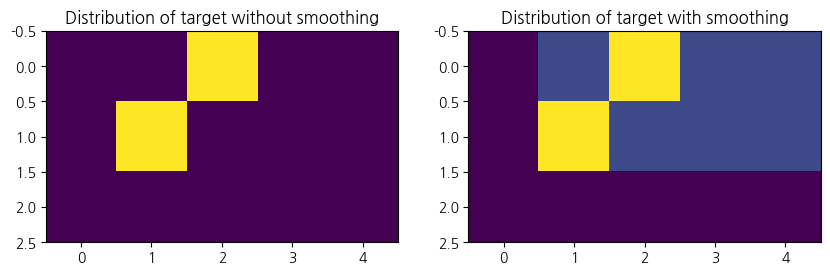

In [ ]:
# Example of label smoothing.
# Îã®Ïñ¥Ïû• ÌÅ¨Í∏∞Í∞Ä 5Ïù∏Îç∞ 0Î≤à Îã®Ïñ¥Îäî Ìå®Îî©ÌÜ†ÌÅ∞
crit1 = LabelSmoothing(5, 0, 0.0)
crit2 = LabelSmoothing(5, 0, 0.4)

# ÏòàÏ∏°ÏùÄ 2Î≤à, 2Î≤à, 2Î≤à ÌÜ†ÌÅ∞ÏúºÎ°ú ÏòàÏ∏°
# Ï¥ù Îã§ÏÑØÍ∞úÏùò ÌÜ†ÌÅ∞Ïù¥ ÏûàÍ≥† 0Î≤à ÌÜ†ÌÅ∞ÏùÄ [PAD], 1~4Î≤à ÌÜ†ÌÅ∞ÏùÄ ÏùºÎ∞ò ÌÜ†ÌÅ∞
#                    ÌÜ†ÌÅ∞ÏúÑÏπò 0    1    2    3   4  
predict = torch.FloatTensor([[0, 0.2, 0.7, 0.1,  0],
                             [0, 0.2, 0.7, 0.1,  0], 
                             [0, 0.2, 0.7, 0.1,  0]])
# Ï†ïÎãµÏùÄ 2Î≤à, 1Î≤à, 0Î≤à, Ï¶â ÎßàÏßÄÎßâ Îã®Ïñ¥Îäî Ìå®Îî©ÌÜ†ÌÅ∞Ïù¥ Ï†ïÎãµÏù¥ÎùºÎ©¥
v1 = crit1(predict.log(), torch.LongTensor([2, 1, 0]))
v2 = crit2(predict.log(), torch.LongTensor([2, 1, 0]))

# Show the target distributions expected by the system.
# Í≤∞Í≥ºÎ•º Î≥¥Î©¥ Ìå®Îî©ÌÜ†ÌÅ∞ ÏûêÎ¶¨Îäî Î™®Îëê 0 (1Î≤à Ïó¥)
# targetÏóêÏÑú Ìå®Îî©Îêú Îã®Ïñ¥Ïóê Ìï¥ÎãπÌïòÎäî ÏòàÏ∏° 3ÌñâÏùÄ Î™®Îì† ÏûêÎ¶¨Í∞Ä 0
fig, ax = plt.subplots(figsize=(10,5), nrows=1, ncols=2)

ax[0].set_title("Distribution of target without smoothing")
print(crit1.true_dist)
ax[0].imshow(crit1.true_dist)

ax[1].set_title("Distribution of target with smoothing")
print(crit2.true_dist)
ax[1].imshow(crit2.true_dist)
plt.show()

`LabelSmoothing` ÌÅ¥ÎûòÏä§ÏóêÏÑú Ï†ïÎãµ Î∂ÑÌè¨Î•º smoothingÌïòÍ≥† ÎÇòÏÑú Î°úÏä§ ÍπåÏßÄ Í≥ÑÏÇ∞ÌïòÎØÄÎ°ú Ï†ïÎãµÏûêÎ¶¨Ïóê ÎåÄÌïú ÌôïÏã†Ïù¥ Ï†êÏ†ê 1Ïóê Í∞ÄÍπåÏõåÏßÄÎ©¥ Î°úÏä§Í∞Ä Ïñ¥ÎñªÍ≤å Í≥ÑÏÇ∞ÎêòÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥º Ïàò ÏûàÏäµÎãàÎã§.

>Label smoothing actually starts to penalize the model if it gets very confident about a given choice.

ÏïÑÎûò ÏΩîÎìúÏÖÄÏóêÏÑú `x`Í∞Ä Ïª§ÏßÄÎ©¥ `x/d`Í∞Ä Ï†êÏ†ê 1Ïóê Í∞ÄÍπùÍ≤å ÎêòÍ≥† Í∑∏Î†áÍ≤å ÎêòÎ©¥ Î°úÏä§ Í∞íÏù¥ Ï°∞Í∏àÏî© Ï¶ùÍ∞ÄÌïòÎäî Í≤ÉÏùÑ Î≥º Ïàò ÏûàÏäµÎãàÎã§.

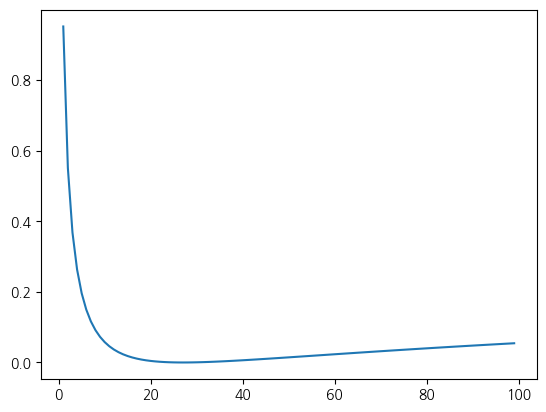

In [ ]:
crit = LabelSmoothing(5, 0, 0.1)
def loss(x):
    d = x + 3 * 1

    predict = torch.FloatTensor([[1e-3, x/d, 1/d, 1/d, 1/d]])
    
    return crit(predict.log(), torch.LongTensor([1]))#.data[0]

plt.plot(np.arange(1, 100), [loss(x) for x in range(1, 100)])
plt.show()

## Loss Í≥ÑÏÇ∞

`LabelSmoothing`ÏóêÏÑú smoothing ÎøêÎßå ÏïÑÎãàÎùº `nn.KLDivLoss`Î•º ÏÇ¨Ïö©Ìï¥ÏÑú Î°úÏä§Í∞íÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§. ÏõêÎûò Ï†ïÎãµÎ∂ÑÌè¨Îäî Ï†ïÎãµÏûêÎ¶¨Îßå 1Ïù¥Í≥† ÎÇòÎ®∏ÏßÄÎäî Î™®Îëê 0ÏûÖÎãàÎã§. Ïù¥Îü¥ Îïå Ï£ºÎ°ú ÏÇ¨Ïö©ÌïòÎäî ÏÜêÏã§Ìï®ÏàòÎäî `nn.NLLLoss`ÏûÖÎãàÎã§. ÌïòÏßÄÎßå `LabelSmoothing`Ïù¥ Ï†ïÎãµÎ∂ÑÌè¨Î•º Î∂ÄÎìúÎüΩÍ≤å ÍπçÏïòÏúºÎØÄÎ°ú Î™®Îì† Ïò§ÎãµÏûêÎ¶¨ÏóêÎèÑ ÌôïÎ•†Ïù¥ Ìï†ÎãπÎêòÏñ¥ ÏûàÏäµÎãàÎã§. Ïù¥Îü¥Îïå Ï∂úÎ†•Î∂ÑÌè¨ÏôÄ Ï†ïÎãµÎ∂ÑÌè¨Ïùò Ï∞®Ïù¥Î•º Í≥ÑÏÇ∞ÌïòÍ∏∞ ÏúÑÌï¥ Kullback‚ÄìLeibler divergence[[7](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence)]Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§. `SimpleLossCompute`Îäî `model.generator`Î•º Ìò∏Ï∂úÌï¥ÏÑú Î™®Îç∏Ïùò Ï∂úÎ†•Í∞íÏùÑ Í≥ÑÏÇ∞ÌïúÎã§Ïùå Í∑∏ Í∞íÏùÑ `LabelSmoothing`Ïóê ÎÑòÍ≤® Î°úÏä§Í∞íÏùÑ Î∞õÏïÑÏò§Í≥† Î∞±ÏõåÎìúÍπåÏßÄ ÏàòÌñâÌï©ÎãàÎã§.

In [ ]:
class SimpleLossCompute:
    "A simple loss compute and train function."
    def __init__(self, generator, criterion, opt=None):
        # Ïó¨Í∏∞ÏÑú generatorÎäî model.generator
        self.generator = generator
        
        # Ïó¨Í∏∞ÏÑú criterionÏùÄ LabelSmoothing 
        self.criterion = criterion

        self.opt = opt
        
    def __call__(self, x, y, norm):
        # normÏùÄ batchÏóêÏÑú ÌÜ†ÌÅ∞ Ïàò
        # self.ntokens = (self.trg_y != pad).data.sum() # Ìå®Îî© ÌÜ†ÌÅ∞Ïù¥ ÏïÑÎãå ÌÜ†ÌÅ∞ Ïàò
        
        x = self.generator(x)
        
        loss = self.criterion(x.contiguous().view(-1, x.size(-1)), 
                              y.contiguous().view(-1)) / norm
        loss.backward()
        if self.opt is not None:
            self.opt.step()
            self.opt.optimizer.zero_grad()
        # return loss.data[0] * norm
        return loss * norm

## ÌïôÏäµ

Î™®Îì† ÏÑ§Î™ÖÏù¥ ÎÅùÏù¥ ÎÇ¨ÏäµÎãàÎã§! Ïù¥Ï†ú Ï†ÅÎãπÌûà ÌïôÏäµ Ìï®ÏàòÎ•º Ï†ïÏùòÌïòÍ≥† ÌïôÏäµÏùÑ ÌïòÎ©¥ Îê©ÎãàÎã§.

In [ ]:
def run_epoch(data_iter, model, loss_compute):
    "Standard Training and Logging Function"
    start = time.time()
    total_tokens = 0
    total_loss = 0
    tokens = 0
    # data_iterÎ•º ÎßåÎì§ Îïå ÏÑ§Ï†ïÌïú nbatches ÎßåÌÅº Î£®ÌîÑÎ•º ÎèàÎã§. Ï¶â 1ÏóêÌè≠
    for i, batch in enumerate(data_iter):
        out = model.forward(batch.src, batch.trg, 
                            batch.src_mask, batch.trg_mask)
        
        # Ïó¨Í∏∞ÏÑú loss_compute()Îäî SimpleLossCompute ÏûÑ
        loss = loss_compute(out, batch.trg_y, batch.ntokens)
        total_loss += loss
        total_tokens += batch.ntokens
        tokens += batch.ntokens
        
        if i % 50 == 1:
            elapsed = time.time() - start
            print("Epoch Step: %d, Loss: %f, Tokens per Sec: %f" %
                    (i, loss / batch.ntokens, tokens / elapsed))
            start = time.time()
            tokens = 0
    return total_loss / total_tokens

In [ ]:
# Train the simple copy task.
V = 11
criterion = LabelSmoothing(size=V, padding_idx=0, smoothing=0.0)
model = make_model(V, V, N=2)
#                   model_size, factor, warmup, optimizer
model_opt = NoamOpt(model.src_embed[0].d_model, 1, 1200,
        torch.optim.Adam(model.parameters(), lr=0, betas=(0.9, 0.98), eps=1e-9))

for epoch in range(18):
    model.train()
    print(f'{epoch} epoch train')
    run_epoch(data_gen2(V, 30, 20), model, # ÎØ∏ÎãàÎ∞∞ÏπòÏóê ÏÉòÌîå 30Í∞úÏî© 20Î∞∞ÏπòÍ∞Ä ÌïúÏóêÌè≠ 
              SimpleLossCompute(model.generator, criterion, model_opt))
    print('eval')
    model.eval()
    eval_loss = run_epoch(data_gen2(V, 30, 5), model, # ÎØ∏ÎãàÎ∞∞ÏπòÏóê ÏÉòÌîå 30Í∞úÏî© 5Î∞∞ÏπòÍ∞Ä Ìïú ÏóêÌè≠
                    SimpleLossCompute(model.generator, criterion, None))
    print('eval_loss:', eval_loss,'\n')

0 epoch train
Epoch Step: 1, Loss: 2.864457, Tokens per Sec: 1365.069214
eval
Epoch Step: 1, Loss: 2.250437, Tokens per Sec: 3094.530762
eval_loss: tensor(2.2787, grad_fn=<DivBackward0>) 

1 epoch train
Epoch Step: 1, Loss: 2.296071, Tokens per Sec: 2362.211914
eval
Epoch Step: 1, Loss: 2.070618, Tokens per Sec: 2959.632812
eval_loss: tensor(2.0574, grad_fn=<DivBackward0>) 

2 epoch train
Epoch Step: 1, Loss: 2.134651, Tokens per Sec: 2355.073975
eval
Epoch Step: 1, Loss: 1.978136, Tokens per Sec: 3230.137695
eval_loss: tensor(1.9951, grad_fn=<DivBackward0>) 

3 epoch train
Epoch Step: 1, Loss: 2.134798, Tokens per Sec: 2720.479248
eval
Epoch Step: 1, Loss: 1.913502, Tokens per Sec: 3056.487061
eval_loss: tensor(1.9023, grad_fn=<DivBackward0>) 

4 epoch train
Epoch Step: 1, Loss: 2.119583, Tokens per Sec: 2349.845215
eval
Epoch Step: 1, Loss: 1.844935, Tokens per Sec: 3030.367676
eval_loss: tensor(1.8870, grad_fn=<DivBackward0>) 

5 epoch train
Epoch Step: 1, Loss: 2.004549, Tokens per

## ÏòàÏ∏°

Ìä∏ÎûúÏä§Ìè¨Î®∏Î•º ÌïôÏäµ ÏãúÌÇ¨ Îïå ÎîîÏΩîÎçîÏóê Ï†ïÎãµÏù¥ Î™®Îëê ÏûÖÎ†•ÎêòÍ≥† Ï∂úÎ†•ÎèÑ ÌïúÎ≤àÏóê ÎÇòÏò§Í≤å Îê©ÎãàÎã§. ÌïòÏßÄÎßå ÌïôÏäµÏù¥ ÎÅùÎÇòÍ≥† ÏòàÏ∏°ÏùÑ Ìï† ÎïåÎäî Í∑∏Î†áÍ≤å ÌïòÏßÄ ÏïäÍ≥† Îã§ÏùåÍ≥º Í∞ôÏùÄ ÏàúÏÑúÎ°ú ÌïòÍ≤å Îê©ÎãàÎã§.

1. ÎîîÏΩîÎçîÏóê [START] ÌÜ†ÌÅ∞ÏùÑ ÏûÖÎ†•ÌïúÎã§.

2. [START] ÌÜ†ÌÅ∞ Îã§ÏùåÏóê ÎÇòÏò¨ ÌÜ†ÌÅ∞ÏùÑ Ìä∏ÎûúÏä§Ìè¨Î®∏Í∞Ä ÏòàÏ∏°ÌïúÎã§.

3. ÏòàÏ∏°Îêú [TKN1]ÏùÑ Î∂ôÏó¨ÏÑú [START], [TKN1]ÏùÑ ÎîîÏΩîÎçîÏóê ÏûÖÎ†•ÌïúÎã§.

4. Ïù¥Îü∞ ÏãùÏúºÎ°ú Í≥ÑÏÜç ÏßÑÌñâÌïúÎã§.

Ïù¥ Í≥ºÏ†ïÏóêÏÑú Ìä∏ÎûúÏä§Ìè¨Î®∏Ïùò ÏòàÏ∏°ÏùÄ (nbatches, n_seq, vocab) ÏÇ¨Ïù¥Ï¶àÎ°ú ÎÇòÏò§Í≤å ÎêòÎäîÎç∞ ÌòÑÏû¨ Ïä§ÌÖùÏùò ÏòàÏ∏°ÏùÑ Í≤∞Ï†ïÌïòÍ∏∞ ÏúÑÌï¥ (nbatches, -1, vocab)ÏóêÏÑú ÌôïÎ•†Í∞íÏù¥ Í∞ÄÏû• ÌÅ∞Í≤ÉÏùÑ Í≥†Î•¥Í≤å Îê©ÎãàÎã§. Ïù¥Î†áÍ≤å Í∞Å ÌÉÄÏûÑ Ïä§ÌÉ≠ÏóêÏÑú Ï†ÅÌï©Ìïú Îã®Ïñ¥Î•º Í≥†Î•¥Îäî Ï†ÑÎûµÏùÑ ÌÉêÏöï ÌÉêÏÉâgreedy searchÎùºÍ≥† Ìï©ÎãàÎã§. ÌïòÏßÄÎßå Ïù¥Îü∞ Ï†ÑÎûµÏù¥ Ï†ÑÏ≤¥ ÏãúÌÄÄÏä§Ïóê ÎåÄÌï¥ÏÑú Íº≠ Ï¢ãÏùÄ Í≤ÉÏùÄ ÏïÑÎãàÎùº ÎπîÏÑúÏπòÍ∞ôÏùÄ Îçî Î≥µÏû°Ìïú Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÍ∏∞ÎèÑ Ìï©ÎãàÎã§. Ïó¨Í∏∞ÏÑúÎäî Í∞ÄÏû• Í∞ÑÎã®Ìïú Î∞©Î≤ïÏù∏ ÌÉêÏöï ÌÉêÏÉâÏùÑ ÏÇ¨Ïö©ÌïòÏòÄÏäµÎãàÎã§.

In [ ]:
def greedy_decode(model, src, src_mask, max_len, start_symbol):
    memory = model.encode(src, src_mask)

    # ÏãúÏûëÏùÄ [START]Î°ú ÏãúÏûëÌïúÎã§.
    ys = torch.ones(1, 1).fill_(start_symbol).type_as(src.data)
    
    # ÏÉùÏÑ±Ìï† ÏãúÌÄÄÏä§Ïùò ÏµúÎåÄ Í∏∏Ïù¥ÎßåÌÅ∞ ÏàúÌôòÌïòÎ©¥ÏÑú
    for i in range(max_len-1):
        print('ys.shape:', ys.shape)
        out = model.decode(
                    memory, src_mask, ys, 
                    subsequent_mask(ys.size(1)).type_as(src.data)
                )
        print('out.shape:', out.shape)
        print('out[:, -1].shape:', out[:, -1].shape)
        
        # ÎßàÏßÄÎßâ ÌÉÄÏûÑÏä§ÌÉ≠Ïùò Í≤∞Í≥ºÎ•º Îã®Ïñ¥Îì§Î°ú Î∞îÍæºÎã§.
        prob = model.generator(out[:, -1])
        print('prob.shape:', prob.shape)
        
        # Í∞ÄÏû• ÌôïÎ•†Ïù¥ ÎÜíÏùÄ Îã®Ïñ¥Î•º ÏÑ†ÌÉùÌïúÎã§.

        _, next_word = torch.max(prob, dim = 1)
        next_word = next_word.data[0]

        # ÏòàÏ∏°Îêú Îã®Ïñ¥Î•º Ï∂îÍ∞ÄÌïòÍ≥† Î£®ÌîÑ Ï≤òÏùåÏúºÎ°ú ÎèåÏïÑÍ∞Ä Îã§Ïãú ysÎ•º ÎîîÏΩîÎçîÎ°ú ÏûÖÎ†•ÌïúÎã§.
        ys = torch.cat([ys, 
                        torch.ones(1, 1).type_as(src.data).fill_(next_word)], dim=1)
        print('\n')
    return ys

In [ ]:
model.eval()

EncoderDecoder(
  (encoder): Encoder(
    (layers): ModuleList(
      (0-1): 2 x EncoderLayer(
        (self_attn): MultiHeadedAttention(
          (linears): ModuleList(
            (0-3): 4 x Linear(in_features=512, out_features=512, bias=True)
          )
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (feed_forward): PositionwiseFeedForward(
          (w_1): Linear(in_features=512, out_features=2048, bias=True)
          (w_2): Linear(in_features=2048, out_features=512, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (sublayer): ModuleList(
          (0-1): 2 x SublayerConnection(
            (norm): LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
      )
    )
    (norm): LayerNorm()
  )
  (decoder): Decoder(
    (layers): ModuleList(
      (0-1): 2 x DecoderLayer(
        (self_attn): MultiHeadedAttention(
          (linears): ModuleList(
            (0-3): 4 x Linear(in_features=512, out_

ÏïÑÎ¨¥ ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ÎÇò Î¨¥ÏûëÏúÑÎ°ú ÎßåÎì§Ïñ¥ Î™®Îç∏Ïóê ÏûÖÎ†•ÌïòÍ≥† ÏûÖÎ†• Ïà´ÏûêÎì§ Ï§ë Îí§ Îã§ÏÑØÍ∞úÍ∞Ä 1ÌÅ∞ Ïà´ÏûêÎ°ú Ï∂úÎ†•ÎêòÎäîÏßÄ ÌôïÏù∏Ìï¥Î¥ÖÏãúÎã§.

In [ ]:
src = torch.LongTensor([[1, 3, 4, 5, 6,   8, 7, 2, 9,  7]])
# Ï†ïÎãµ                   1, 3, 4, 5, 6,   9, 8, 3, 10, 8
                         

src_mask = torch.ones(1, 1, 10)
print(greedy_decode(model, src, src_mask, max_len=10, start_symbol=1))

ys.shape: torch.Size([1, 1])
out.shape: torch.Size([1, 1, 512])
out[:, -1].shape: torch.Size([1, 512])
prob.shape: torch.Size([1, 11])


ys.shape: torch.Size([1, 2])
out.shape: torch.Size([1, 2, 512])
out[:, -1].shape: torch.Size([1, 512])
prob.shape: torch.Size([1, 11])


ys.shape: torch.Size([1, 3])
out.shape: torch.Size([1, 3, 512])
out[:, -1].shape: torch.Size([1, 512])
prob.shape: torch.Size([1, 11])


ys.shape: torch.Size([1, 4])
out.shape: torch.Size([1, 4, 512])
out[:, -1].shape: torch.Size([1, 512])
prob.shape: torch.Size([1, 11])


ys.shape: torch.Size([1, 5])
out.shape: torch.Size([1, 5, 512])
out[:, -1].shape: torch.Size([1, 512])
prob.shape: torch.Size([1, 11])


ys.shape: torch.Size([1, 6])
out.shape: torch.Size([1, 6, 512])
out[:, -1].shape: torch.Size([1, 512])
prob.shape: torch.Size([1, 11])


ys.shape: torch.Size([1, 7])
out.shape: torch.Size([1, 7, 512])
out[:, -1].shape: torch.Size([1, 512])
prob.shape: torch.Size([1, 11])


ys.shape: torch.Size([1, 8])
out.shape: t

ÏòàÏÉÅÏ≤òÎüº Ïûò Ï∂úÎ†•ÎêòÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.